## Descriptive Exploratory Analysis ( DEA )

>> Run correlation on overall improvement scores (Spearman Correlation)

>> Run the correlations per subgroup - to see if the picture changes there.

>> Examining the distribution of each metrics using histogram and normality test 




In [1]:
# retrive variables stored in other Jupyter notebooks

%store -r overall_loc_scores_final
%store -r overall_loc_scores

In [2]:
improve_d3 = overall_loc_scores_final[['d3-add-12', 'd3-delete-12', 'improve-vis-12', 'improve-novel-12','d3-add-23', 'd3-delete-23', 'improve-vis-23', 'improve-novel-23', 'd3-add-34', 'd3-delete-34', 'improve-vis-34', 'improve-novel-34','d3-add-45', 'd3-delete-45', 'improve-vis-45', 'improve-novel-45', 'd3-add-15', 'd3-delete-15', 'improve-vis-15', 'improve-novel-15']]

In [3]:
survey = overall_loc_scores_final[['Q2_Q2_1', 'Q2_Q2_2', 'Q2_Q2_3', 
                                   'Q2_Q2_4', 'Q2_Q2_5', 'Q2_Q2_6', 
                                   'Q2_Q2_7', 'Q2_Q2_8', 'Q2_Q2_9', 
                                   'Q2_Q2_10', 'Q2_Q2_11', 'Q2_Q2_12', 
                                   'Q2_Q2_13', 'Q3_Q3_1', 'Q3_Q3_2', 'Q3_Q3_3', 'Q3_Q3_4', 'Q3_Q3_5','Q4_Q4_1', 'Q4_Q4_2', 'Q4_Q4_3', 'Q4_Q4_4', 'Q4_Q4_5', 'Q5_Q5_1', 'Q5_Q5_2', 'Q5_Q5_3', 'Q5_Q5_4', 'Q5_Q5_5', 'Q7_Q7_1',
                                   'Q7_Q7_2', 'Q7_Q7_3', 'Q7_Q7_4', 'Q8_Q8_1', 'Q8_Q8_2','Q10','improve-tech-15','improve-ur-15','improve-vis-15', 'improve-novel-15', 'improve-total-15', 'improve-tech-45','improve-ur-45','improve-vis-45', 'improve-novel-45', 'improve-total-45'
                                ]]


survey.head(5)





Q2_Q2_1  Q2_Q2_2  Q2_Q2_3  Q2_Q2_4  Q2_Q2_5  Q2_Q2_6  Q2_Q2_7  Q2_Q2_8  \
0      6.0      4.0      5.0      1.0      2.0      5.0      6.0      4.0   
1      1.0      3.0      5.0      2.0      2.0      3.0      5.0      4.0   
2      4.0      6.0      4.0      3.0      5.0      6.0      5.0      5.0   
3      4.0      5.0      6.0      4.0      5.0      6.0      6.0      4.0   
4      3.0      5.0      4.0      4.0      2.0      5.0      4.0      0.0   

   Q2_Q2_9  Q2_Q2_10  ...  improve-tech-15  improve-ur-15  improve-vis-15  \
0      5.0       3.0  ...             50.0            0.0            0.00   
1      1.0       2.0  ...              0.0           60.0           75.00   
2      6.0       6.0  ...             25.0          100.0           54.17   
3      4.0       6.0  ...             62.5           20.0           37.50   
4      2.0       5.0  ...             50.0           60.0           58.33   

   improve-novel-15  improve-total-15  improve-tech-45  improve-ur-45  \
0             50.00            100.00              0.0            0.0   
1             67.50            202.50              0.0           40.0   
2             25.00            204.17             12.5            0.0   
3             16.67            136.67             25.0            0.0   
4             87.50            255.83             12.5           20.0   

   improve-vis-45  improve-novel-45  improve-total-45  
0            0.00              6.25              6.25  
1           37.50            -32.50             45.00  
2           -4.16             25.00             33.34  
3           -8.33             -8.33              8.34  
4            4.16             87.50            124.16  

[5 rows x 45 columns]

In [4]:
bogota_0_survey = overall_loc_scores_final[overall_loc_scores_final['Group'].isin([0])]
survey0 = bogota_0_survey[['Q2_Q2_1', 'Q2_Q2_2', 'Q2_Q2_3', 
                                   'Q2_Q2_4', 'Q2_Q2_5', 'Q2_Q2_6', 
                                   'Q2_Q2_7', 'Q2_Q2_8', 'Q2_Q2_9', 
                                   'Q2_Q2_10', 'Q2_Q2_11', 'Q2_Q2_12', 
                                   'Q2_Q2_13', 'Q3_Q3_1', 'Q3_Q3_2', 'Q3_Q3_3', 'Q3_Q3_4', 'Q3_Q3_5','Q4_Q4_1', 'Q4_Q4_2', 'Q4_Q4_3', 'Q4_Q4_4', 'Q4_Q4_5', 'Q5_Q5_1', 'Q5_Q5_2', 'Q5_Q5_3', 'Q5_Q5_4', 'Q5_Q5_5', 'Q7_Q7_1',
                                   'Q7_Q7_2', 'Q7_Q7_3', 'Q7_Q7_4', 'Q8_Q8_1', 'Q8_Q8_2','Q10','improve-tech-15','improve-ur-15','improve-vis-15', 'improve-novel-15', 'improve-total-15', 'improve-tech-45','improve-ur-45','improve-vis-45', 'improve-novel-45', 'improve-total-45'
                                ]]




In [5]:
bogota_1_survey = overall_loc_scores_final[overall_loc_scores_final['Group'].isin([1])]
survey1 = bogota_1_survey[['Q2_Q2_1', 'Q2_Q2_2', 'Q2_Q2_3', 
                                   'Q2_Q2_4', 'Q2_Q2_5', 'Q2_Q2_6', 
                                   'Q2_Q2_7', 'Q2_Q2_8', 'Q2_Q2_9', 
                                   'Q2_Q2_10', 'Q2_Q2_11', 'Q2_Q2_12', 
                                   'Q2_Q2_13', 'Q3_Q3_1', 'Q3_Q3_2', 'Q3_Q3_3', 'Q3_Q3_4', 'Q3_Q3_5','Q4_Q4_1', 'Q4_Q4_2', 'Q4_Q4_3', 'Q4_Q4_4', 'Q4_Q4_5', 'Q5_Q5_1', 'Q5_Q5_2', 'Q5_Q5_3', 'Q5_Q5_4', 'Q5_Q5_5', 'Q7_Q7_1',
                                   'Q7_Q7_2', 'Q7_Q7_3', 'Q7_Q7_4', 'Q8_Q8_1', 'Q8_Q8_2','Q10','improve-tech-15','improve-ur-15','improve-vis-15', 'improve-novel-15', 'improve-total-15', 'improve-tech-45','improve-ur-45','improve-vis-45', 'improve-novel-45', 'improve-total-45'
                                ]]

In [6]:
bogota_2_survey = overall_loc_scores_final[overall_loc_scores_final['Group'].isin([2])]
survey2 = bogota_2_survey[['Q2_Q2_1', 'Q2_Q2_2', 'Q2_Q2_3', 
                                   'Q2_Q2_4', 'Q2_Q2_5', 'Q2_Q2_6', 
                                   'Q2_Q2_7', 'Q2_Q2_8', 'Q2_Q2_9', 
                                   'Q2_Q2_10', 'Q2_Q2_11', 'Q2_Q2_12', 
                                   'Q2_Q2_13', 'Q3_Q3_1', 'Q3_Q3_2', 'Q3_Q3_3', 'Q3_Q3_4', 'Q3_Q3_5','Q4_Q4_1', 'Q4_Q4_2', 'Q4_Q4_3', 'Q4_Q4_4', 'Q4_Q4_5', 'Q5_Q5_1', 'Q5_Q5_2', 'Q5_Q5_3', 'Q5_Q5_4', 'Q5_Q5_5', 'Q7_Q7_1',
                                   'Q7_Q7_2', 'Q7_Q7_3', 'Q7_Q7_4', 'Q8_Q8_1', 'Q8_Q8_2','Q10','improve-tech-15','improve-ur-15','improve-vis-15', 'improve-novel-15', 'improve-total-15', 'improve-tech-45','improve-ur-45','improve-vis-45', 'improve-novel-45', 'improve-total-45'
                                ]]

In [7]:
bogota_3_survey = overall_loc_scores_final[overall_loc_scores_final['Group'].isin([3])]
survey3 = bogota_3_survey[['Q2_Q2_1', 'Q2_Q2_2', 'Q2_Q2_3', 
                                   'Q2_Q2_4', 'Q2_Q2_5', 'Q2_Q2_6', 
                                   'Q2_Q2_7', 'Q2_Q2_8', 'Q2_Q2_9', 
                                   'Q2_Q2_10', 'Q2_Q2_11', 'Q2_Q2_12', 
                                   'Q2_Q2_13', 'Q3_Q3_1', 'Q3_Q3_2', 'Q3_Q3_3', 'Q3_Q3_4', 'Q3_Q3_5','Q4_Q4_1', 'Q4_Q4_2', 'Q4_Q4_3', 'Q4_Q4_4', 'Q4_Q4_5', 'Q5_Q5_1', 'Q5_Q5_2', 'Q5_Q5_3', 'Q5_Q5_4', 'Q5_Q5_5', 'Q7_Q7_1',
                                   'Q7_Q7_2', 'Q7_Q7_3', 'Q7_Q7_4', 'Q8_Q8_1', 'Q8_Q8_2','Q10','improve-tech-15','improve-ur-15','improve-vis-15', 'improve-novel-15', 'improve-total-15', 'improve-tech-45','improve-ur-45','improve-vis-45', 'improve-novel-45', 'improve-total-45'
                                ]]

In [8]:
bogota_0_d3 = overall_loc_scores_final[overall_loc_scores_final['Group'].isin([0])]
improve_d3_bogota0 = bogota_0_d3[['d3-add-12', 'd3-delete-12', 'improve-vis-12', 'improve-novel-12','d3-add-23', 'd3-delete-23', 'improve-vis-23', 'improve-novel-23', 'd3-add-34', 'd3-delete-34', 'improve-vis-34', 'improve-novel-34','d3-add-45', 'd3-delete-45', 'improve-vis-45', 'improve-novel-45', 'd3-add-15', 'd3-delete-15', 'improve-vis-15', 'improve-novel-15']]


In [9]:
bogota_1_d3 = overall_loc_scores_final[overall_loc_scores_final['Group'].isin([1])]
improve_d3_bogota1 = bogota_1_d3[['d3-add-12', 'd3-delete-12', 'improve-vis-12', 'improve-novel-12','d3-add-23', 'd3-delete-23', 'improve-vis-23', 'improve-novel-23', 'd3-add-34', 'd3-delete-34', 'improve-vis-34', 'improve-novel-34','d3-add-45', 'd3-delete-45', 'improve-vis-45', 'improve-novel-45', 'd3-add-15', 'd3-delete-15', 'improve-vis-15', 'improve-novel-15']]

In [10]:
bogota_2_d3 = overall_loc_scores_final[overall_loc_scores_final['Group'].isin([2])]
improve_d3_bogota2 = bogota_2_d3[['d3-add-12', 'd3-delete-12', 'improve-vis-12', 'improve-novel-12','d3-add-23', 'd3-delete-23', 'improve-vis-23', 'improve-novel-23', 'd3-add-34', 'd3-delete-34', 'improve-vis-34', 'improve-novel-34','d3-add-45', 'd3-delete-45', 'improve-vis-45', 'improve-novel-45', 'd3-add-15', 'd3-delete-15', 'improve-vis-15', 'improve-novel-15']]

In [11]:
bogota_3_d3 = overall_loc_scores_final[overall_loc_scores_final['Group'].isin([3])]
improve_d3_bogota3 = bogota_3_d3[['d3-add-12', 'd3-delete-12', 'improve-vis-12', 'improve-novel-12','d3-add-23', 'd3-delete-23', 'improve-vis-23', 'improve-novel-23', 'd3-add-34', 'd3-delete-34', 'improve-vis-34', 'improve-novel-34','d3-add-45', 'd3-delete-45', 'improve-vis-45', 'improve-novel-45', 'd3-add-15', 'd3-delete-15', 'improve-vis-15', 'improve-novel-15']]

In [12]:
improve_scores = overall_loc_scores_final[['improve-tech-12', 'improve-tech-23', 'improve-tech-34', 'improve-tech-45',
                             'improve-tech-15', 'improve-novel-12', 'improve-novel-23', 'improve-novel-34', 
                             'improve-novel-45', 'improve-novel-15', 'improve-vis-12', 'improve-vis-23', 
                             'improve-vis-34', 'improve-vis-45', 'improve-vis-15', 'improve-ur-12', 
                            'improve-ur-23', 'improve-ur-34', 'improve-ur-45', 'improve-ur-15', 
                            'improve-total-12', 'improve-total-23', 'improve-total-34', 'improve-total-45', 
                            'improve-total-15']]

In [13]:
bogota_0 = overall_loc_scores_final[overall_loc_scores_final['Group'].isin([0])]
improve_scores_bogota0 = bogota_0[['improve-tech-12', 'improve-tech-23', 'improve-tech-34', 'improve-tech-45', 'improve-tech-15',
                           'improve-novel-12', 'improve-novel-23', 'improve-novel-34', 
                            'improve-novel-45', 'improve-novel-15', 'improve-vis-12', 'improve-vis-23', 
                            'improve-vis-34', 'improve-vis-45', 'improve-vis-15', 'improve-ur-12', 
                            'improve-ur-23', 'improve-ur-34', 'improve-ur-45', 'improve-ur-15', 
                            'improve-total-12', 'improve-total-23', 'improve-total-34', 'improve-total-45', 
                            'improve-total-15']]


In [14]:
bogota_1 = overall_loc_scores_final[overall_loc_scores_final['Group'].isin([1])]
improve_scores_bogota1 = bogota_1[['improve-tech-12', 'improve-tech-23', 'improve-tech-34', 'improve-tech-45', 'improve-tech-15',
                           'improve-novel-12', 'improve-novel-23', 'improve-novel-34', 
                            'improve-novel-45', 'improve-novel-15', 'improve-vis-12', 'improve-vis-23', 
                            'improve-vis-34', 'improve-vis-45', 'improve-vis-15', 'improve-ur-12', 
                            'improve-ur-23', 'improve-ur-34', 'improve-ur-45', 'improve-ur-15', 
                            'improve-total-12', 'improve-total-23', 'improve-total-34', 'improve-total-45', 
                            'improve-total-15']]


In [15]:
bogota_2 = overall_loc_scores_final[overall_loc_scores_final['Group'].isin([2])]
improve_scores_bogota2 = bogota_2[['improve-tech-12', 'improve-tech-23', 'improve-tech-34', 'improve-tech-45', 'improve-tech-15',
                           'improve-novel-12', 'improve-novel-23', 'improve-novel-34', 
                            'improve-novel-45', 'improve-novel-15', 'improve-vis-12', 'improve-vis-23', 
                            'improve-vis-34', 'improve-vis-45', 'improve-vis-15', 'improve-ur-12', 
                            'improve-ur-23', 'improve-ur-34', 'improve-ur-45', 'improve-ur-15', 
                            'improve-total-12', 'improve-total-23', 'improve-total-34', 'improve-total-45', 
                            'improve-total-15']]

In [16]:
bogota_3 = overall_loc_scores_final[overall_loc_scores_final['Group'].isin([3])]
improve_scores_bogota3 = bogota_3[['improve-tech-12', 'improve-tech-23', 'improve-tech-34', 'improve-tech-45', 'improve-tech-15',
                           'improve-novel-12', 'improve-novel-23', 'improve-novel-34', 
                            'improve-novel-45', 'improve-novel-15', 'improve-vis-12', 'improve-vis-23', 
                            'improve-vis-34', 'improve-vis-45', 'improve-vis-15', 'improve-ur-12', 
                            'improve-ur-23', 'improve-ur-34', 'improve-ur-45', 'improve-ur-15', 
                            'improve-total-12', 'improve-total-23', 'improve-total-34', 'improve-total-45', 
                            'improve-total-15']]

In [17]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


def corr_sig(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            _ , p = stats.pearsonr(df[col],df[col2])
            p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = p
    return p_matrix


def plot_cor_matrix(corr, mask=None):
    f, ax = plt.subplots(figsize=(18, 16))
    sns.heatmap(corr, ax=ax,
                mask=mask,
                # cosmetics
                annot=True, vmin=-1, vmax=1, center=0,
                cmap='coolwarm', linewidths=2, linecolor='black', cbar_kws={'orientation': 'horizontal'})

## Correlation between Overall Survey Results and Overall Scores

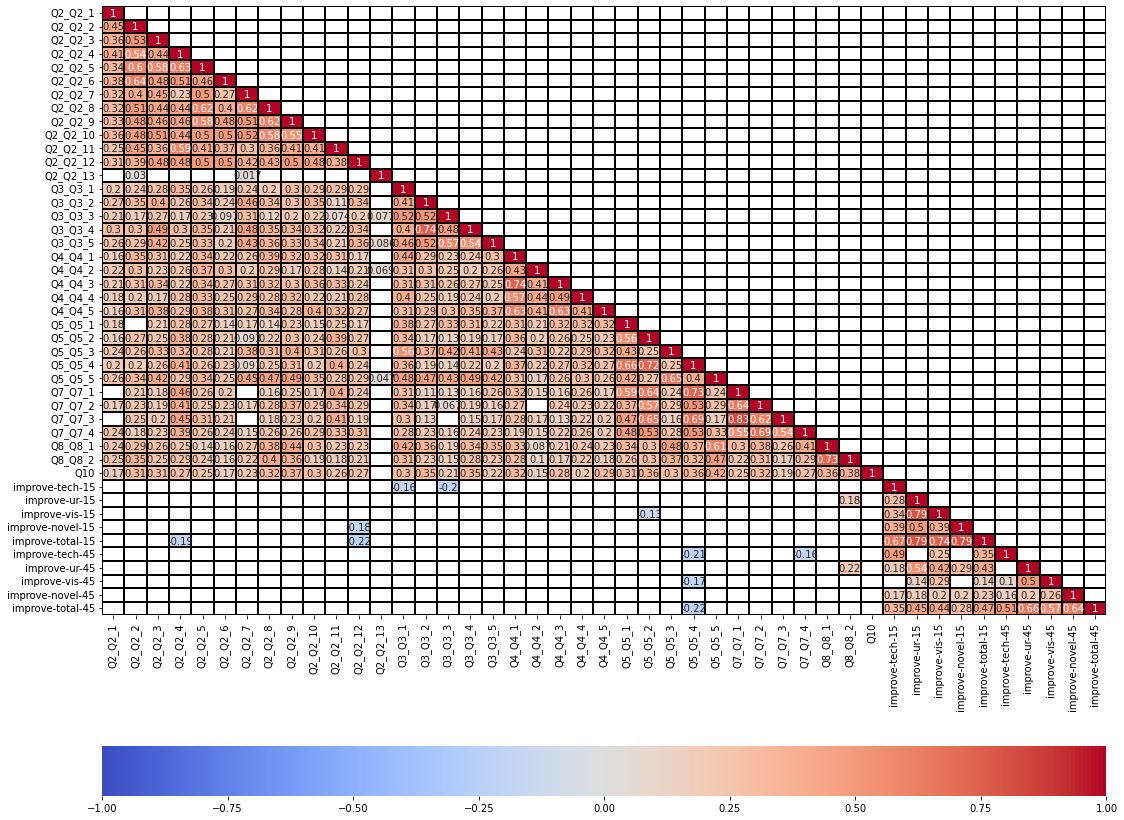

In [18]:
corr = survey.corr(method='spearman')                            # get correlation
p_values = corr_sig(survey)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)

## Correlation between Bogota 0 Survey Results and Bogota 0 Scores

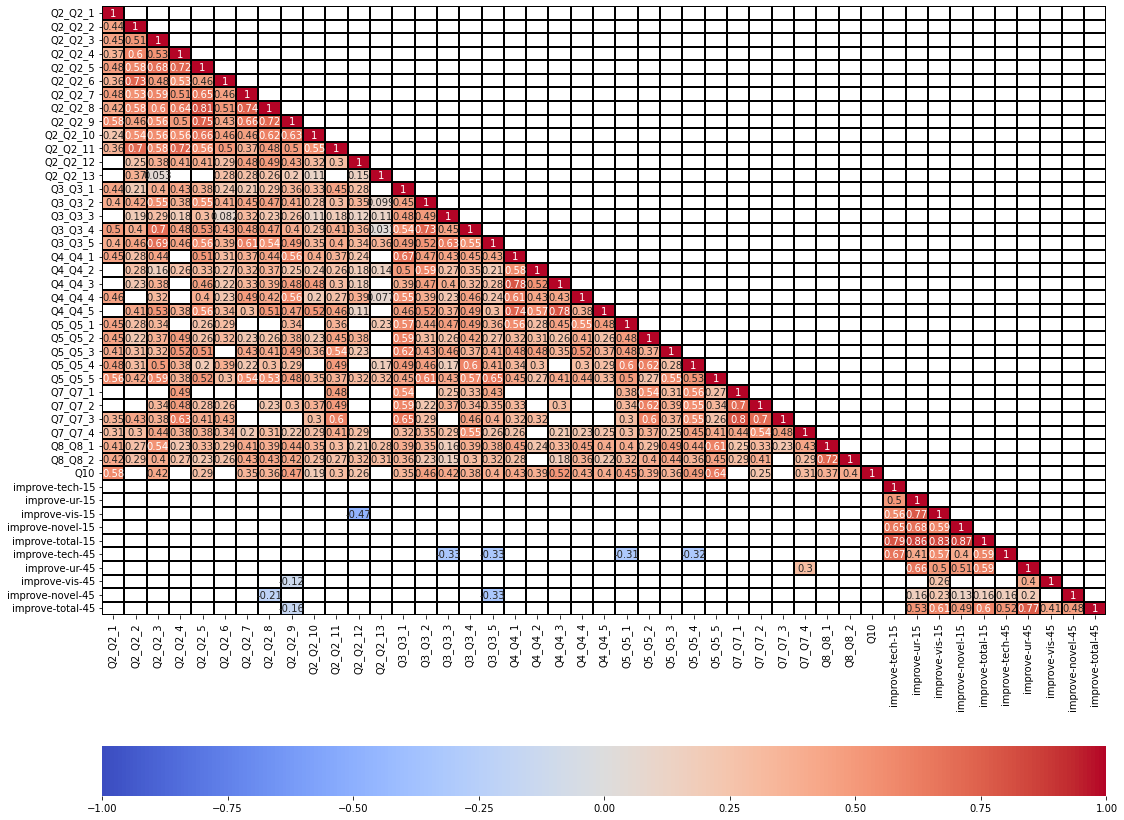

In [19]:
corr = survey0.corr(method='spearman')                            # get correlation
p_values = corr_sig(survey0)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)

## Correlation between Bogota 1 Survey Results and Bogota 1 Scores

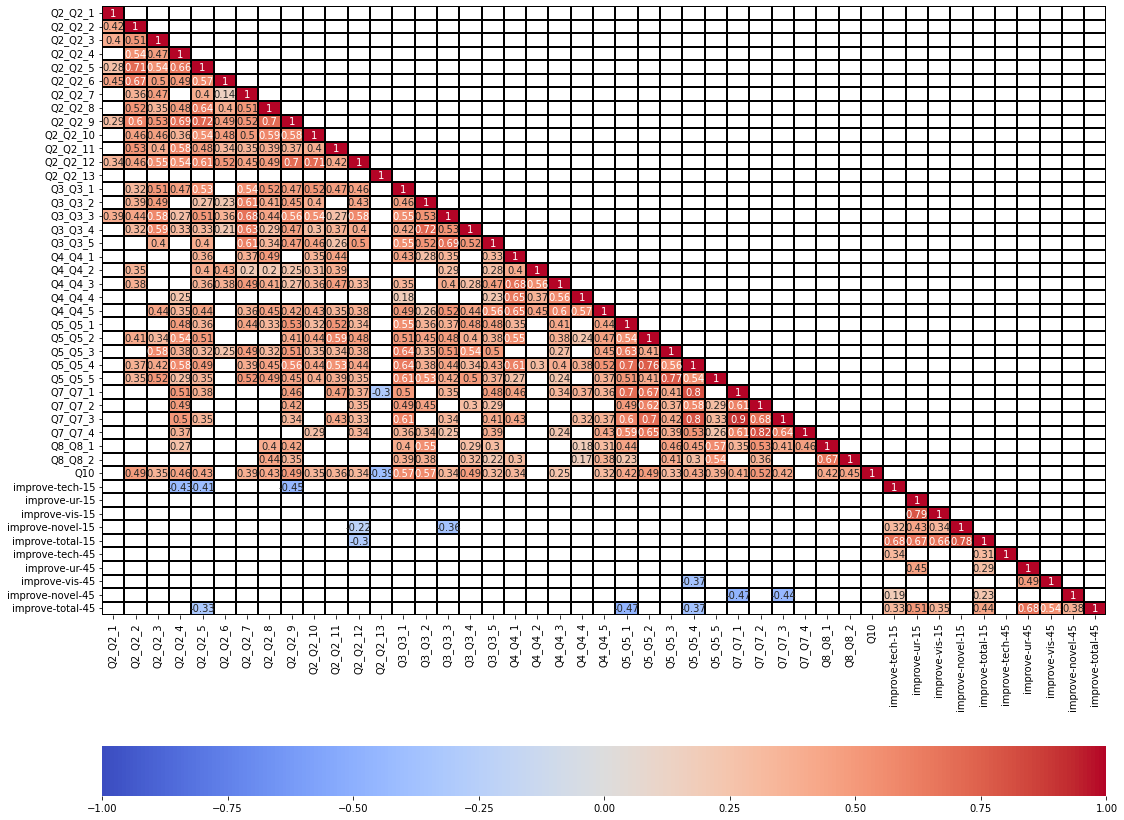

In [20]:
corr = survey1.corr(method='spearman')                            # get correlation
p_values = corr_sig(survey1)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)

## Correlation between Bogota 2 Survey Results and Bogota 2 Scores

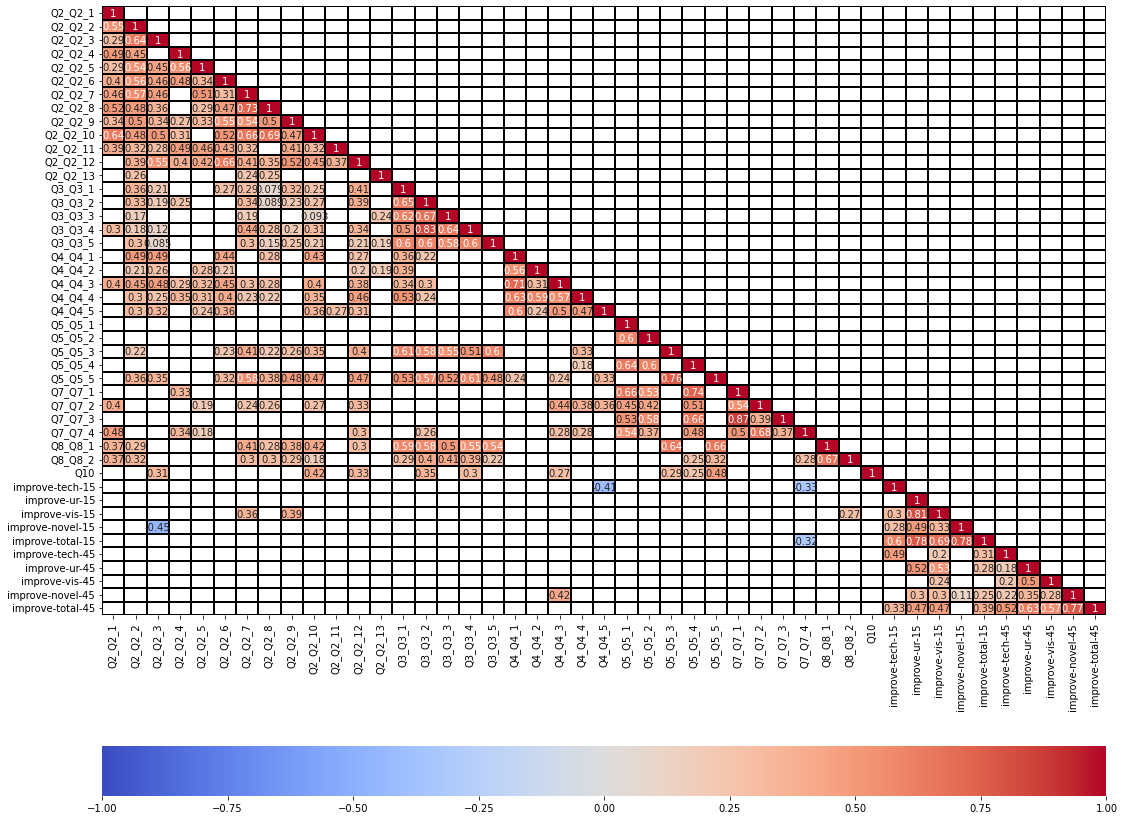

In [21]:
corr = survey2.corr(method='spearman')                            # get correlation
p_values = corr_sig(survey2)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)

## Correlation between Bogota 3 Survey Results and Bogota 3 Scores

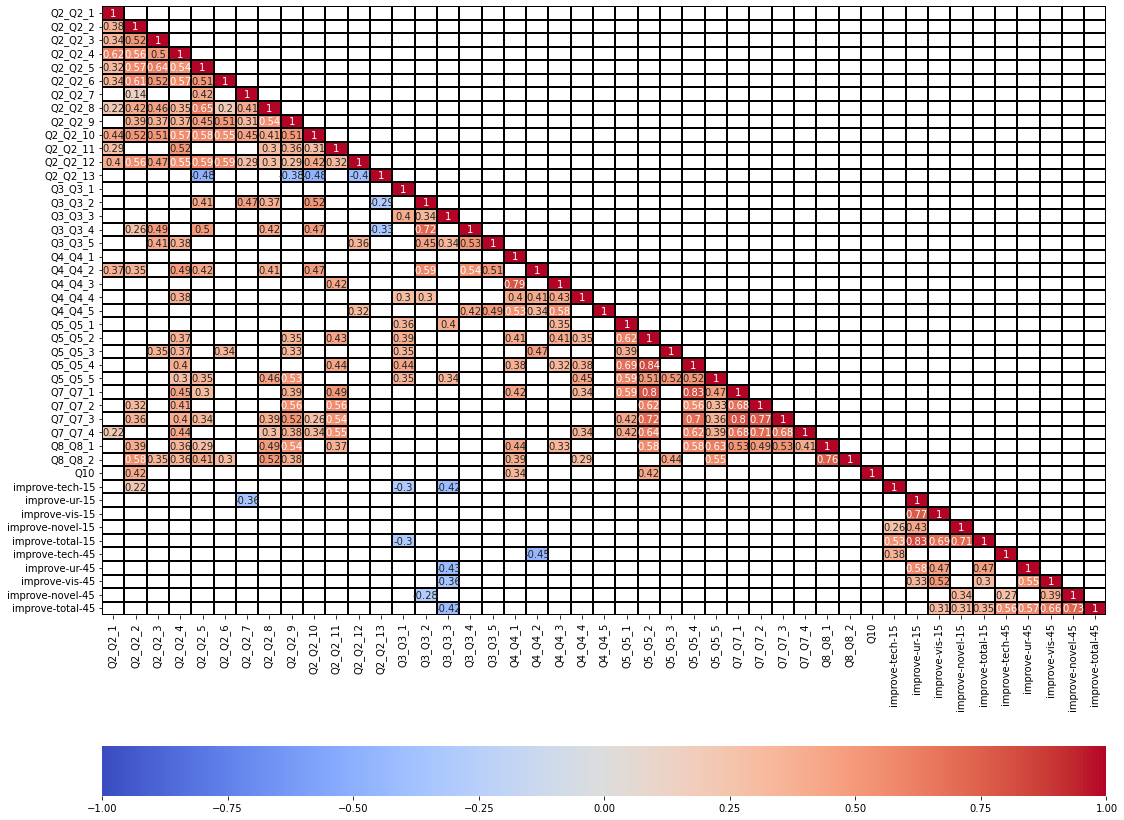

In [22]:
corr = survey3.corr(method='spearman')                            # get correlation
p_values = corr_sig(survey3)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)

## Correlation between Overall Scores and Overall D3 Components

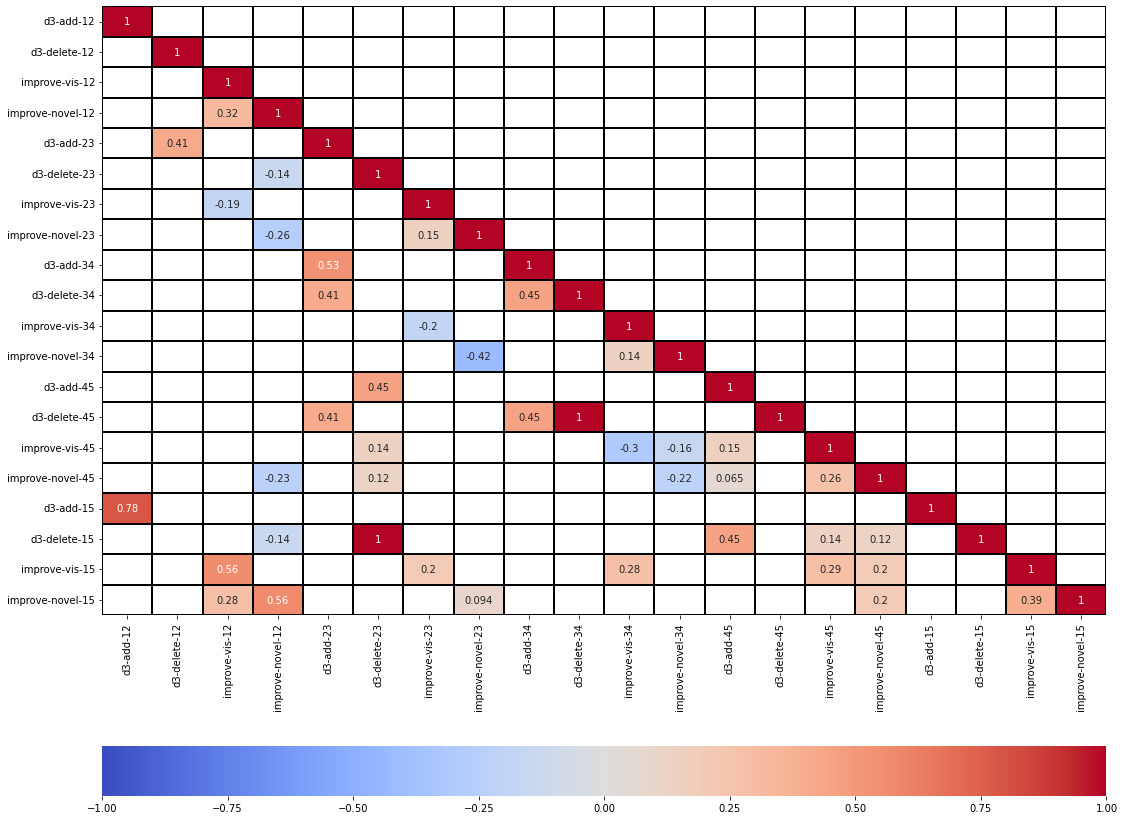

In [23]:
corr = improve_d3.corr(method='spearman')                            # get correlation
p_values = corr_sig(improve_d3)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)

## Correlation between Bogota 0 Scores and Bogota 0 D3 Components 

/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Users/jialincheoh/Libra

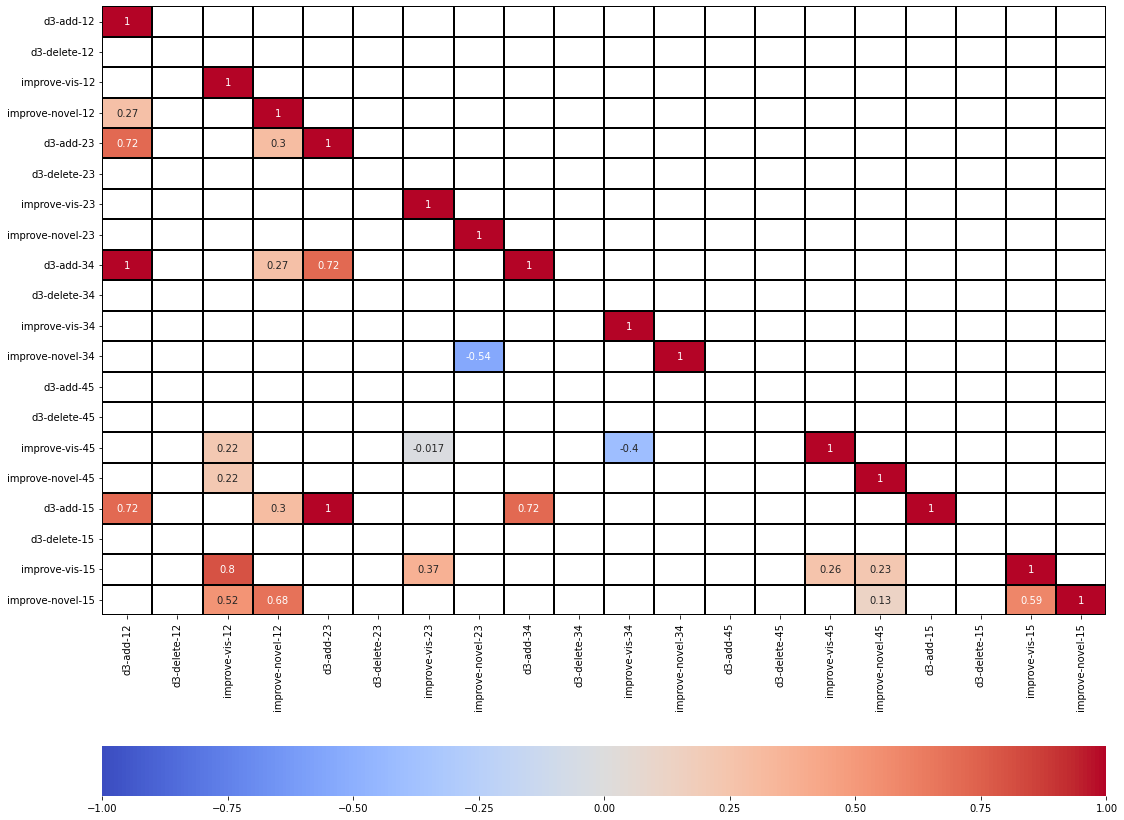

In [24]:
corr = improve_d3_bogota0.corr(method='spearman')                            # get correlation
p_values = corr_sig(improve_d3_bogota0)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)

## Correlation between Bogota 1 Scores and Bogota 1 D3 Components

/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Users/jialincheoh/Libra

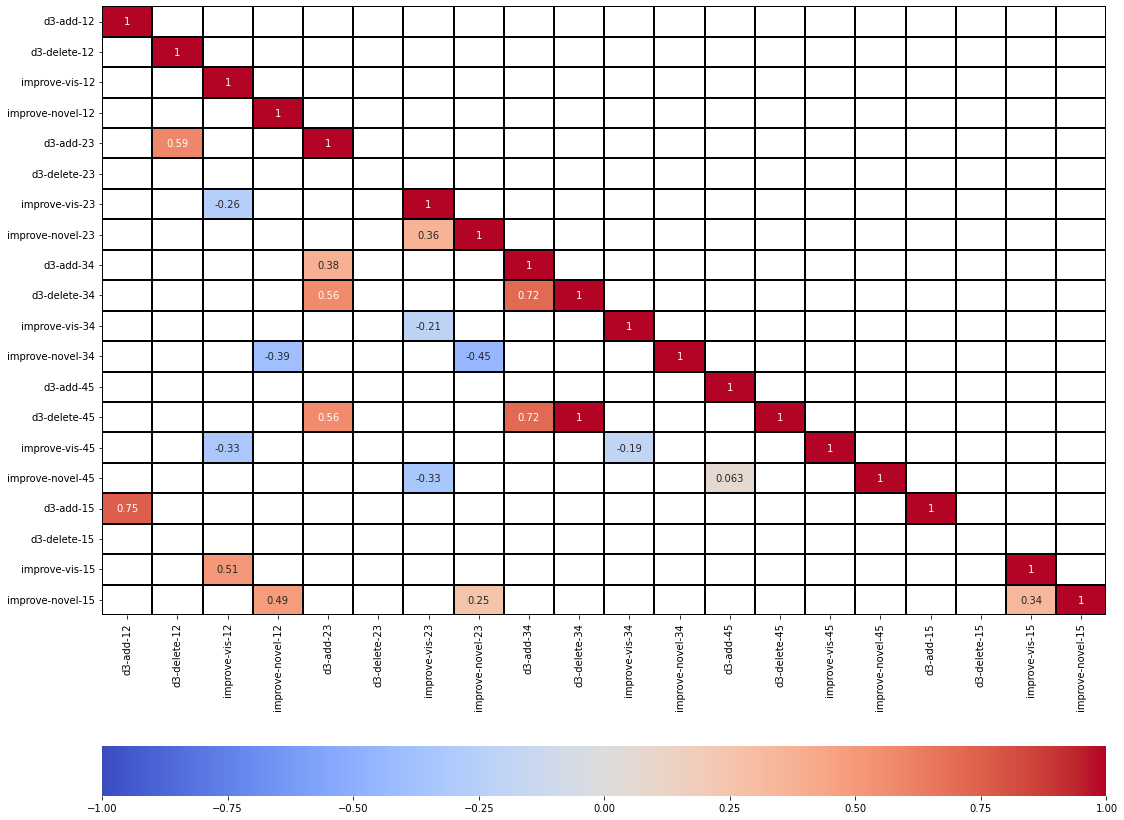

In [25]:
corr = improve_d3_bogota1.corr(method='spearman')                            # get correlation
p_values = corr_sig(improve_d3_bogota1)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)

## Correlation between Bogota 2 Scores and Bogota 2 D3 Components

/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Users/jialincheoh/Libra

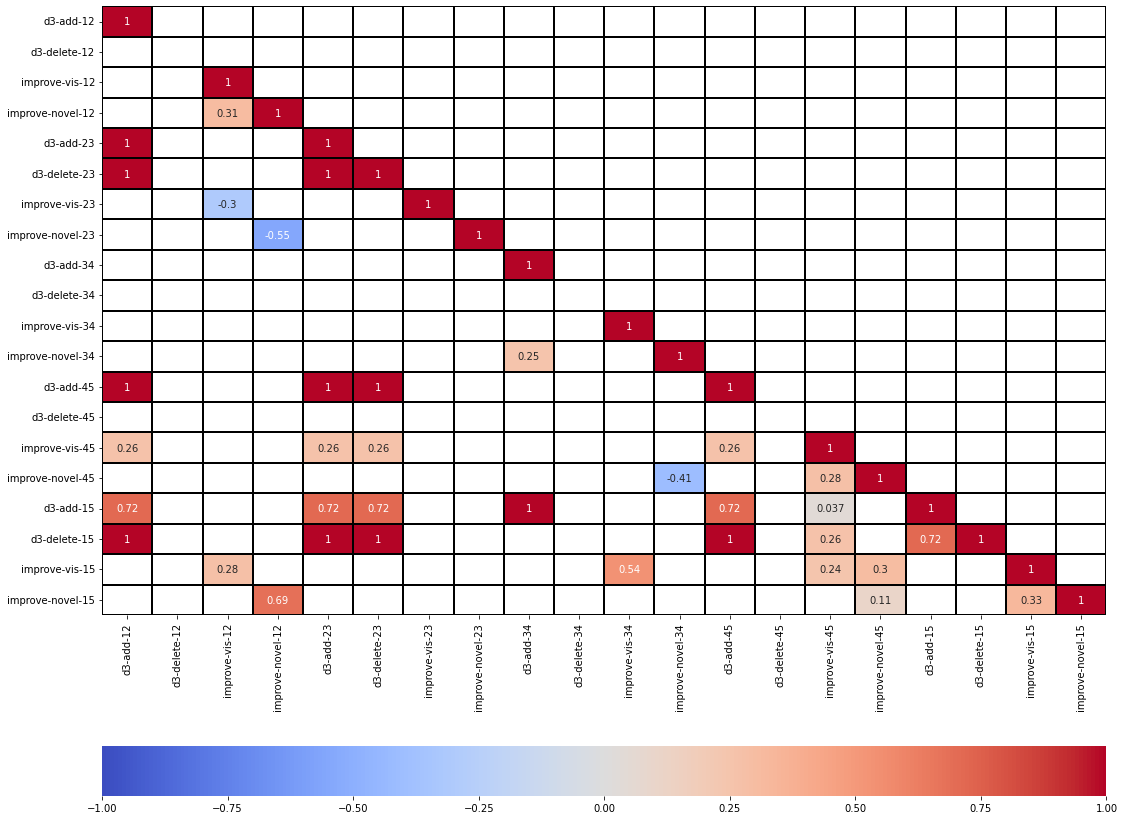

In [26]:
corr = improve_d3_bogota2.corr(method='spearman')                            # get correlation
p_values = corr_sig(improve_d3_bogota2)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)

## Correlation between Bogota 3 Scores and Bogota 3 D3 Components

/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Users/jialincheoh/Libra

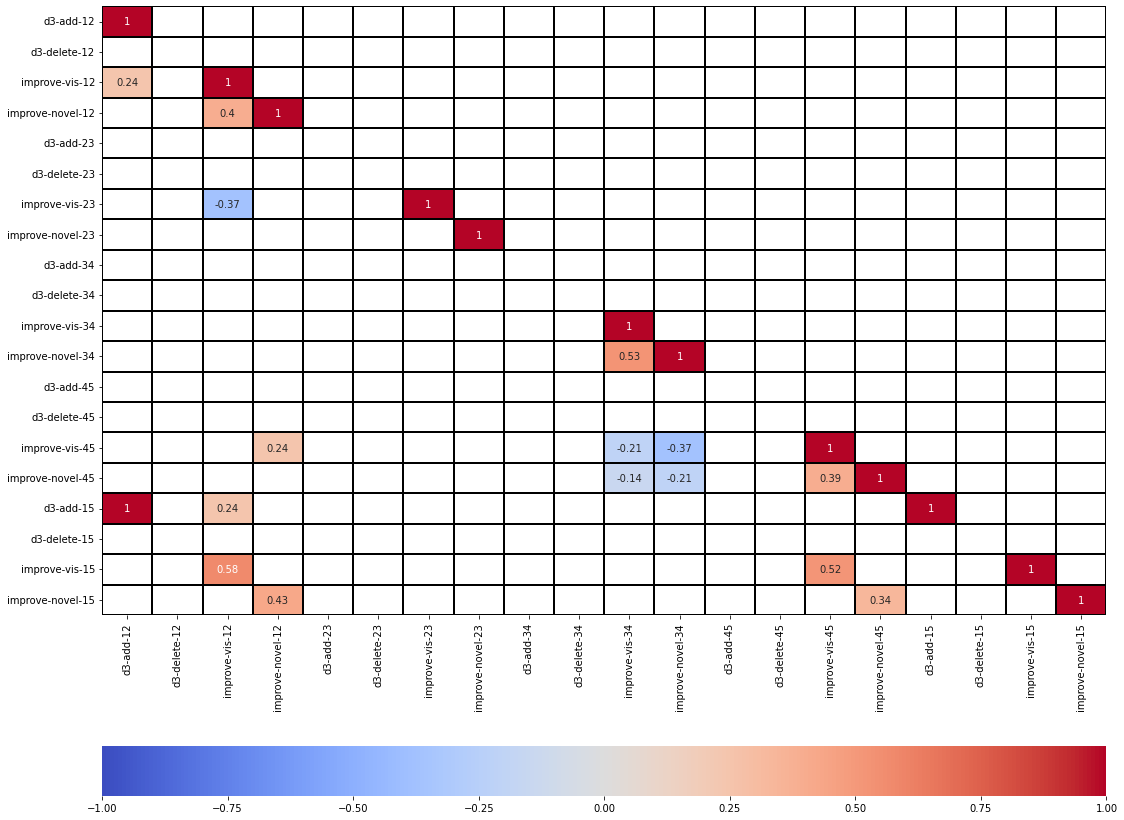

In [27]:
corr = improve_d3_bogota3.corr(method='spearman')                            # get correlation
p_values = corr_sig(improve_d3_bogota3)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)

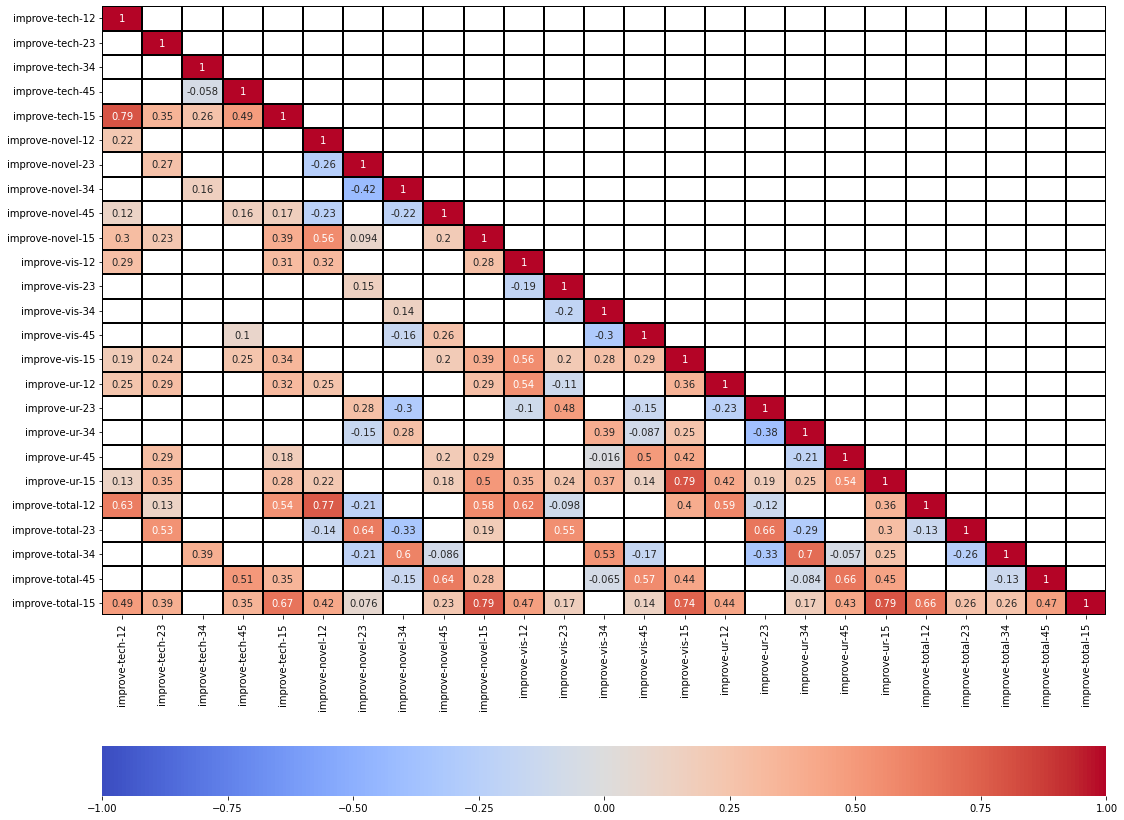

In [28]:
corr = improve_scores.corr(method='spearman')                            # get correlation
p_values = corr_sig(improve_scores)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)

## Overall Correlation between Different Score Dimensions

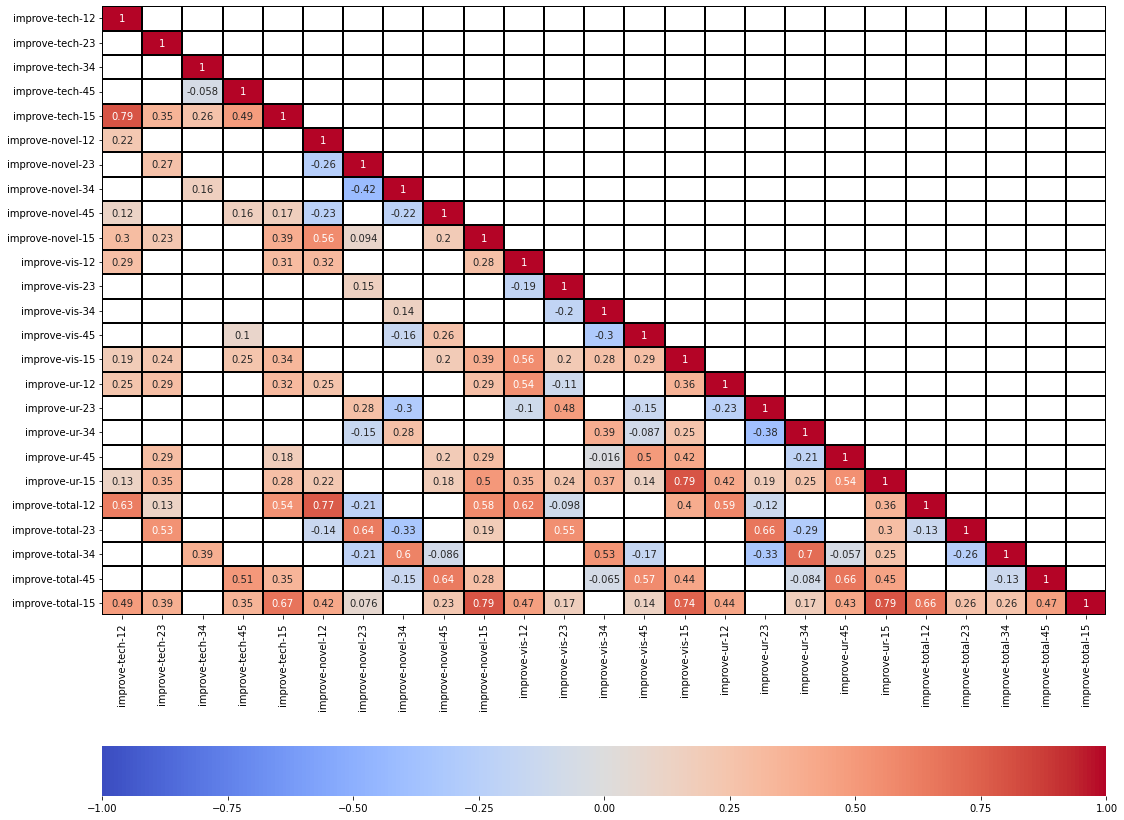

In [29]:
corr = improve_scores.corr(method='spearman')                            # get correlation
p_values = corr_sig(improve_scores)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)

## Interpretation Overall Sample

>> **The goal is to see whether the different subscores are correlated with each other in the overall sample.**

>> * improve-tech-15 with improve-ur-15 ( 0.28 ) - low correlate 

>> * improve-tech-15 with improve-vis-15 ( 0.33 ) - moderate correlation 

>> * improve-tech-15 with improve-novelty-15 ( 0.38 ) - moderate correlation 

>> **We only see low and moderate correlations, so using improve-total-15 is maybe not appropriate.**

>> * improve-total-15 with improve-tech-15 ( 0.66 ) - high correlation 

>> * improve-total-15 with improve-novel-15 ( 0.79 ) - high correlation 

>> * improve-total-15 with improve-vis-15 ( 0.74 ) - high correlation

>> * improve-total-15 with improve-ur-15 ( 0.8 ) - high correlation 

>> **All of the other score dimensions have high correlations with improve-total-15.**



## Bogota 0 Correlation between Different Score Dimensions

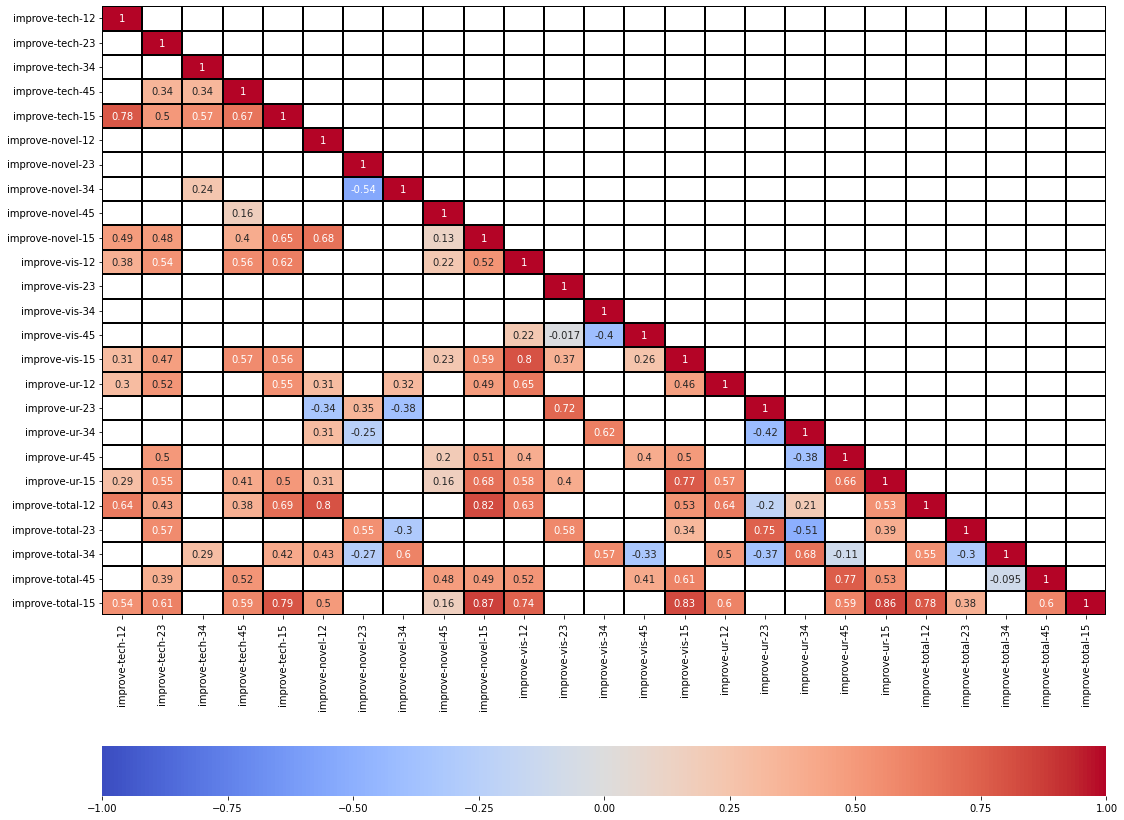

In [30]:
corr = improve_scores_bogota0.corr(method='spearman')                            # get correlation
p_values = corr_sig(improve_scores_bogota0)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)

## Interpretation Bogota 0 ( No Transparency ) 

>> **The goal is to see whether the different subscores are correlated with each other in the overall sample.** 

>> * improve-tech-15 with improve-ur-15 ( 0.48 ) - moderate correlate 

>> * improve-tech-15 with improve-vis-15 ( 0.55 ) - high correlation 

>> * improve-tech-15 with improve-novelty-15 ( 0.63 ) - high correlation 

>> **We only see moderate and high correlations among the subscores.**

>> * improve-total-15 with improve-tech-15 ( 0.75 ) - high correlation

>> * improve-total-15 with improve-novel-15 ( 0.84 ) - high correlation

>> * improve-total-15 with improve-vis-15 ( 0.82 ) - high correlation

>> * improve-total-15 with improve-ur-15 ( 0.86 ) - high correlation

>> **All of the other score dimensions have high correlations with improve-total-15.**


## Bogota 1 Correlation between Different Score Dimensions

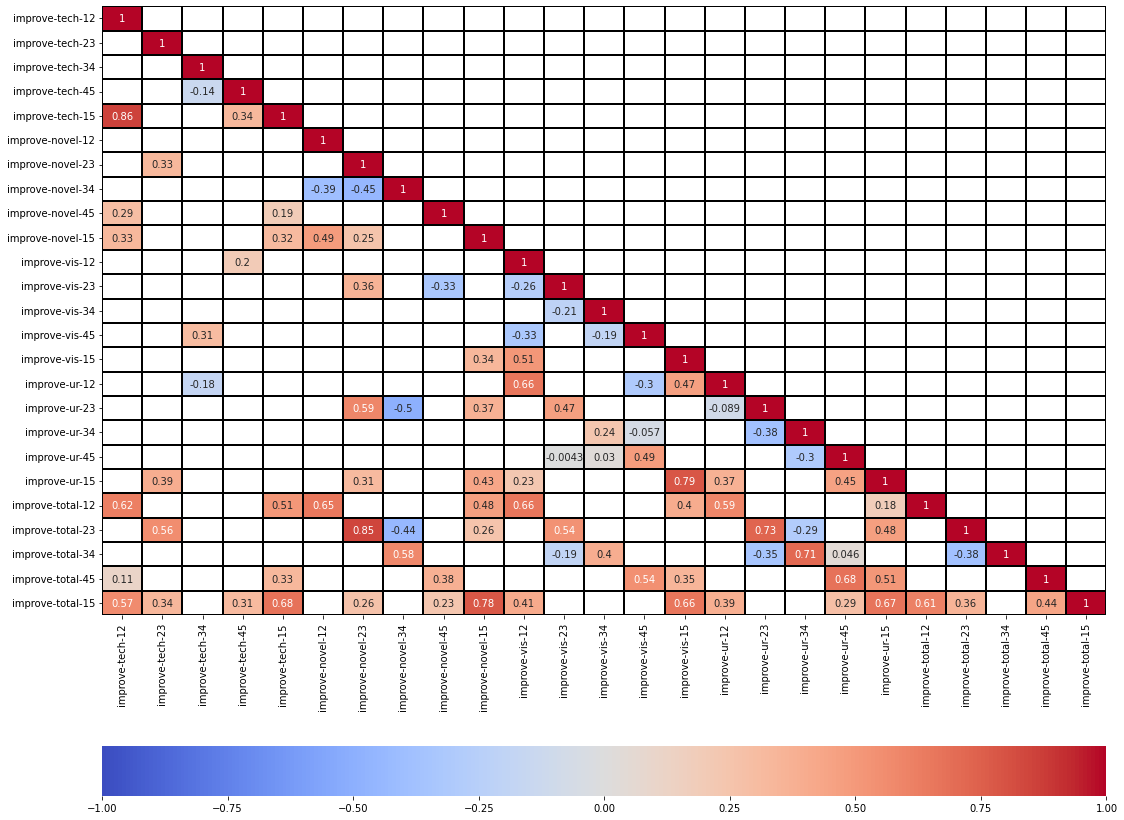

In [31]:
corr = improve_scores_bogota1.corr(method='spearman')                            # get correlation
p_values = corr_sig(improve_scores_bogota1)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)

## Interpretation Bogota 1 ( Performance Transparency ) 

>> **The goal is to see whether the different subscores are correlated with each other in the overall sample.**

>> * improve-tech-15 with improve-ur-15 - not even significant 

>> * improve-tech-15 with improve-vis-15 ( 0.24 ) - low correlation

>> * improve-tech-15 with improve-novelty-15 ( 0.32 ) - moderate correlation 

>> **We only see low and moderate correlations among the subscores, not sure if improve-total-15 is appropriate.**

>> * improve-total-15 with improve-tech-15 ( 0.69 ) - high correlation

>> * improve-total-15 with improve-novel-15 ( 0.77 ) - high correlation

>> * improve-total-15 with improve-vis-15 ( 0.65 ) - high correlation

>> * improve-total-15 with improve-ur-15 ( 0.68 ) - high correlation

>> **All of the other score dimensions have high correlations with improve-total-15.**

## Bogota 2 Correlation between Different Score Dimensions

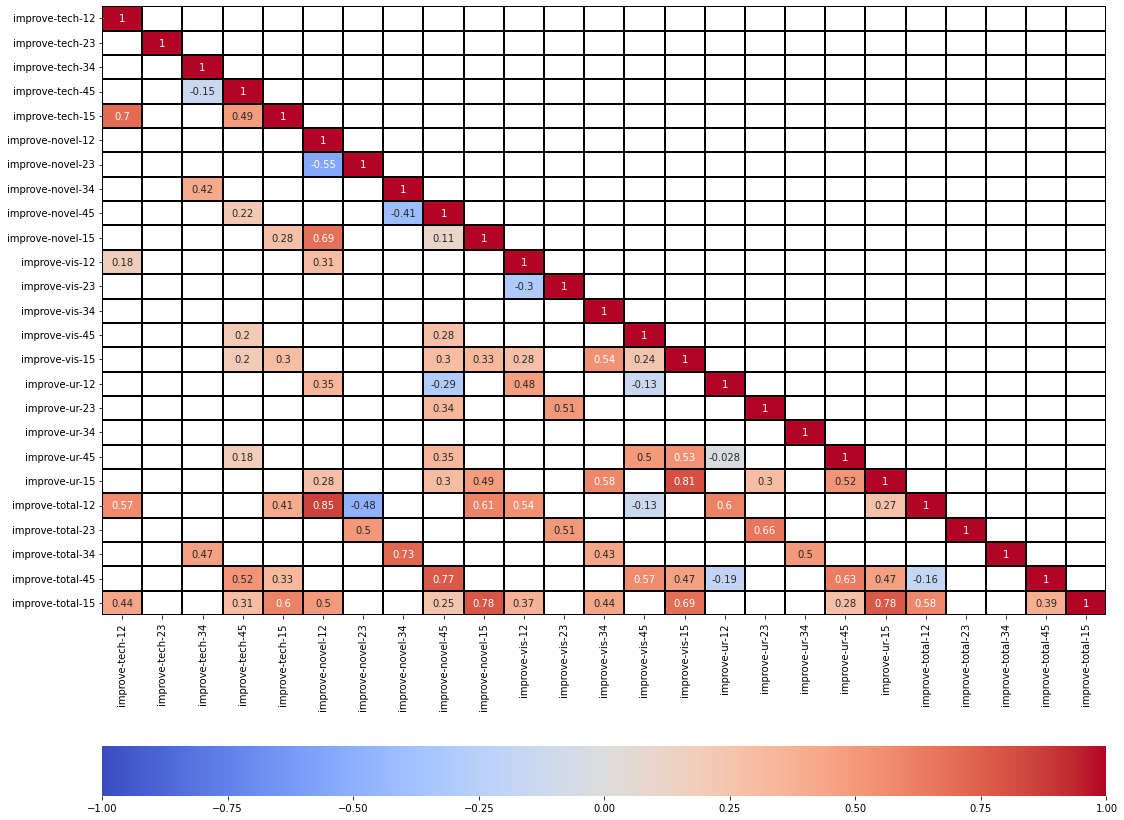

In [32]:
corr = improve_scores_bogota2.corr(method='spearman')                            # get correlation
p_values = corr_sig(improve_scores_bogota2)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)

## Interpretation Bogota 2 ( Solution Transparency )

>> **The goal is to see whether the different subscores are correlated with each other in the overall sample.** 

>> * improve-tech-15 with improve-ur-15 - not even significant 

>> * improve-tech-15 with improve-vis-15 ( 0.28 ) - low correlation

>> * improve-tech-15 with improve-novelty-15 - not even significant 

>> **We only see low correlation among the subscores, not sure if improve-total-15 is appropriate.**

>> * improve-total-15 with improve-tech-15 ( 0.6 ) - high correlation

>> * improve-total-15 with improve-novel-15 ( 0.78 ) - high correlation

>> * improve-total-15 with improve-vis-15 ( 0.69 ) - high correlation

>> * improve-total-15 with improve-ur-15 ( 0.78 ) - high correlation

>> **All of the other score dimensions have high correlations with improve-total-15.**

## Bogota 3 Correlation between Different Score Dimensions

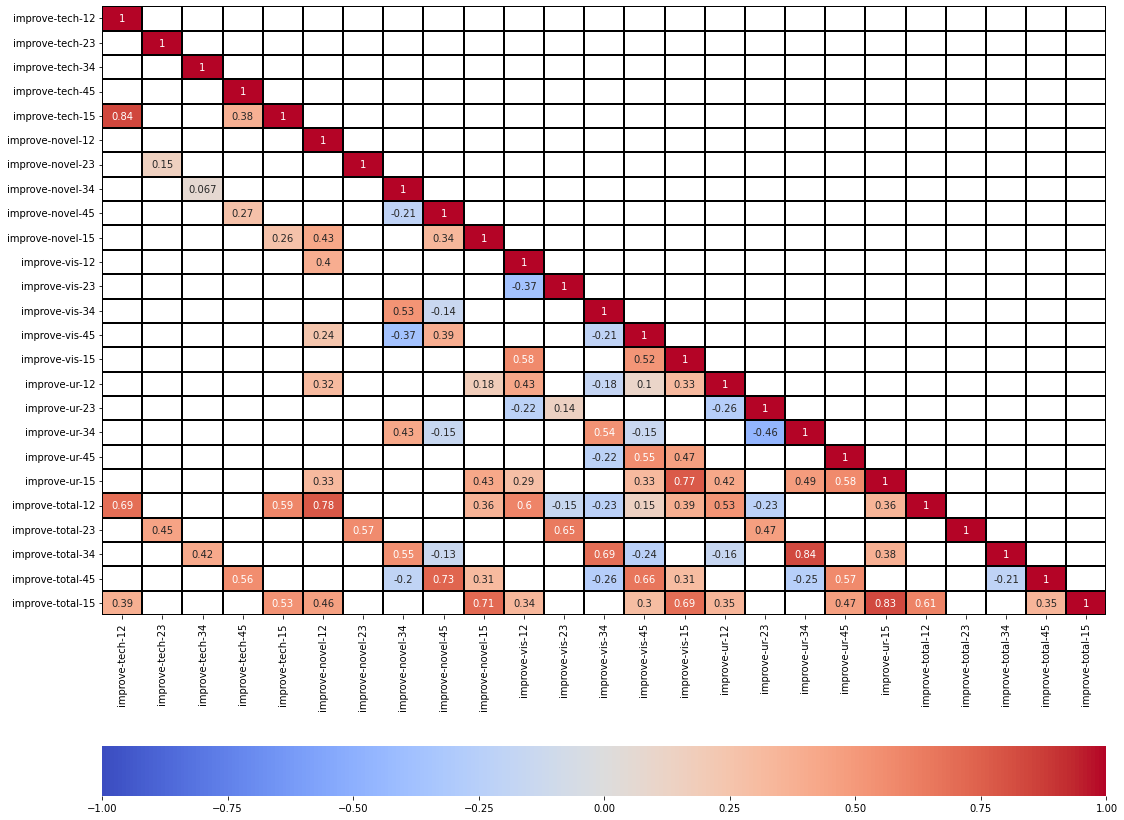

In [33]:
corr = improve_scores_bogota3.corr(method='spearman')                            # get correlation
p_values = corr_sig(improve_scores_bogota3)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)

## Interpretation Bogota 3 ( Full Transparency )

>> **The goal is to see whether the different subscores are correlated with each other in the overall sample.** 

>> * improve-tech-15 with improve-ur-15 - not even significant 

>> * improve-tech-15 with improve-vis-15  - not even significant 

>> * improve-tech-15 with improve-novelty-15 - 0.26 (low correlation)

>> **We only see low correlation among the subscores, not sure if improve-total-15 is appropriate.**

>> * improve-total-15 with improve-tech-15 ( 0.53 ) - high correlation

>> * improve-total-15 with improve-novel-15 ( 0.71 ) - high correlation

>> * improve-total-15 with improve-vis-15 ( 0.69 ) - high correlation

>> * improve-total-15 with improve-ur-15 ( 0.83 ) - high correlation

>> **All of the other score dimensions have high correlations with improve-total-15.**

## Inference

>> The overall sample is not representative of the subgroups in terms of the innovation performance score. For example, we see correlations that are not significant in the Bogota 3, which is the full transparency group. However, we see low and moderate correlations on the overall sample. For the case of Bogota 0 ( No Transparency ), however, we see moderate to high correlations. 

In [34]:
improve_scores = overall_loc_scores_final[['improve-effort-12', 
                            'improve-effort-23', 'improve-effort-34', 'improve-effort-45', 'improve-effort-15', 'improve-effort-25','add-loc-12', 'delete-loc-12', 'change-files-12', 
                            'add-loc-23', 'delete-loc-23', 'change-files-23', 
                            'add-loc-34', 'delete-loc-34', 'change-files-34', 
                            'add-loc-45', 'delete-loc-45', 'change-files-45', 
                            'add-loc-15', 'delete-loc-15', 'change-files-15', 
                            'add-loc-25', 'delete-loc-25', 'change-files-25',
                            'improve-tech-12', 'improve-tech-23', 'improve-tech-34', 'improve-tech-45', 'improve-tech-15',
                           'improve-novel-12', 'improve-novel-23', 'improve-novel-34', 
                            'improve-novel-45', 'improve-novel-15', 'improve-vis-12', 'improve-vis-23', 
                            'improve-vis-34', 'improve-vis-45', 'improve-vis-15', 'improve-ur-12', 
                            'improve-ur-23', 'improve-ur-34', 'improve-ur-45', 'improve-ur-15', 
                            'improve-total-12', 'improve-total-23', 'improve-total-34', 'improve-total-45', 
                            'improve-total-15']]

In [35]:
bogota_0 = overall_loc_scores_final[overall_loc_scores_final['Group'].isin([0])]
improve_scores_bogota0 = bogota_0[[ 'improve-effort-12', 
                            'improve-effort-23', 'improve-effort-34', 'improve-effort-45', 'improve-effort-25','improve-effort-15','add-loc-12', 'delete-loc-12', 'change-files-12', 
                            'add-loc-23', 'delete-loc-23', 'change-files-23', 
                            'add-loc-34', 'delete-loc-34', 'change-files-34', 
                            'add-loc-45', 'delete-loc-45', 'change-files-45', 
                            'add-loc-15', 'delete-loc-15', 'change-files-15',
                            'add-loc-25', 'delete-loc-25', 'change-files-25',
                            'improve-tech-12', 'improve-tech-23', 'improve-tech-34', 'improve-tech-45', 'improve-tech-15',
                           'improve-novel-12', 'improve-novel-23', 'improve-novel-34', 
                            'improve-novel-45', 'improve-novel-15', 'improve-vis-12', 'improve-vis-23', 
                            'improve-vis-34', 'improve-vis-45', 'improve-vis-15', 'improve-ur-12', 
                            'improve-ur-23', 'improve-ur-34', 'improve-ur-45', 'improve-ur-15', 
                            'improve-total-12', 'improve-total-23', 'improve-total-34', 'improve-total-45', 
                            'improve-total-15']]

In [36]:
bogota_1 = overall_loc_scores_final[overall_loc_scores_final['Group'].isin([1])]
improve_scores_bogota1 = bogota_1[['improve-effort-12', 
                            'improve-effort-23', 'improve-effort-34', 'improve-effort-45', 'improve-effort-25','improve-effort-15','add-loc-12', 'delete-loc-12', 'change-files-12', 
                            'add-loc-23', 'delete-loc-23', 'change-files-23', 
                            'add-loc-34', 'delete-loc-34', 'change-files-34', 
                            'add-loc-45', 'delete-loc-45', 'change-files-45', 
                            'add-loc-15', 'delete-loc-15', 'change-files-15',
                            'add-loc-25', 'delete-loc-25', 'change-files-25',
                            'improve-tech-12', 'improve-tech-23', 'improve-tech-34', 'improve-tech-45', 'improve-tech-15',
                           'improve-novel-12', 'improve-novel-23', 'improve-novel-34', 
                            'improve-novel-45', 'improve-novel-15', 'improve-vis-12', 'improve-vis-23', 
                            'improve-vis-34', 'improve-vis-45', 'improve-vis-15', 'improve-ur-12', 
                            'improve-ur-23', 'improve-ur-34', 'improve-ur-45', 'improve-ur-15', 
                            'improve-total-12', 'improve-total-23', 'improve-total-34', 'improve-total-45', 
                            'improve-total-15']]

In [37]:
bogota_2 = overall_loc_scores_final[overall_loc_scores_final['Group'].isin([2])]
improve_scores_bogota2 = bogota_2[['improve-effort-12', 
                            'improve-effort-23', 'improve-effort-34', 'improve-effort-45', 'improve-effort-25','improve-effort-15','add-loc-12', 'delete-loc-12', 'change-files-12', 
                            'add-loc-23', 'delete-loc-23', 'change-files-23', 
                            'add-loc-34', 'delete-loc-34', 'change-files-34', 
                            'add-loc-45', 'delete-loc-45', 'change-files-45', 
                            'add-loc-15', 'delete-loc-15', 'change-files-15',
                            'add-loc-25', 'delete-loc-25', 'change-files-25',
                            'improve-tech-12', 'improve-tech-23', 'improve-tech-34', 'improve-tech-45', 'improve-tech-15',
                           'improve-novel-12', 'improve-novel-23', 'improve-novel-34', 
                            'improve-novel-45', 'improve-novel-15', 'improve-vis-12', 'improve-vis-23', 
                            'improve-vis-34', 'improve-vis-45', 'improve-vis-15', 'improve-ur-12', 
                            'improve-ur-23', 'improve-ur-34', 'improve-ur-45', 'improve-ur-15', 
                            'improve-total-12', 'improve-total-23', 'improve-total-34', 'improve-total-45', 
                            'improve-total-15']]

In [38]:
bogota_3 = overall_loc_scores_final[overall_loc_scores_final['Group'].isin([3])]
improve_scores_bogota3 = bogota_3[['improve-effort-12', 
                            'improve-effort-23', 'improve-effort-34', 'improve-effort-45', 'improve-effort-25', 'improve-effort-15','add-loc-12', 'delete-loc-12', 'change-files-12', 
                            'add-loc-23', 'delete-loc-23', 'change-files-23', 
                            'add-loc-34', 'delete-loc-34', 'change-files-34', 
                            'add-loc-45', 'delete-loc-45', 'change-files-45', 
                            'add-loc-15', 'delete-loc-15', 'change-files-15', 
                            'add-loc-25', 'delete-loc-25', 'change-files-25',
                            'improve-tech-12', 'improve-tech-23', 'improve-tech-34', 'improve-tech-45', 'improve-tech-15',
                           'improve-novel-12', 'improve-novel-23', 'improve-novel-34', 
                            'improve-novel-45', 'improve-novel-15', 'improve-vis-12', 'improve-vis-23', 
                            'improve-vis-34', 'improve-vis-45', 'improve-vis-15', 'improve-ur-12', 
                            'improve-ur-23', 'improve-ur-34', 'improve-ur-45', 'improve-ur-15', 
                            'improve-total-12', 'improve-total-23', 'improve-total-34', 'improve-total-45', 
                            'improve-total-15']]

In [39]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


def corr_sig(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            _ , p = stats.pearsonr(df[col],df[col2])
            p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = p
    return p_matrix


def plot_cor_matrix(corr, mask=None):
    f, ax = plt.subplots(figsize=(26, 24))
    sns.heatmap(corr, ax=ax,
                mask=mask,
                # cosmetics
                annot=True, vmin=-1, vmax=1, center=0,
                cmap='coolwarm', linewidths=2, linecolor='black', cbar_kws={'orientation': 'horizontal'})

## Overall Correlation between Different Score Dimensions and Lines of Codes 

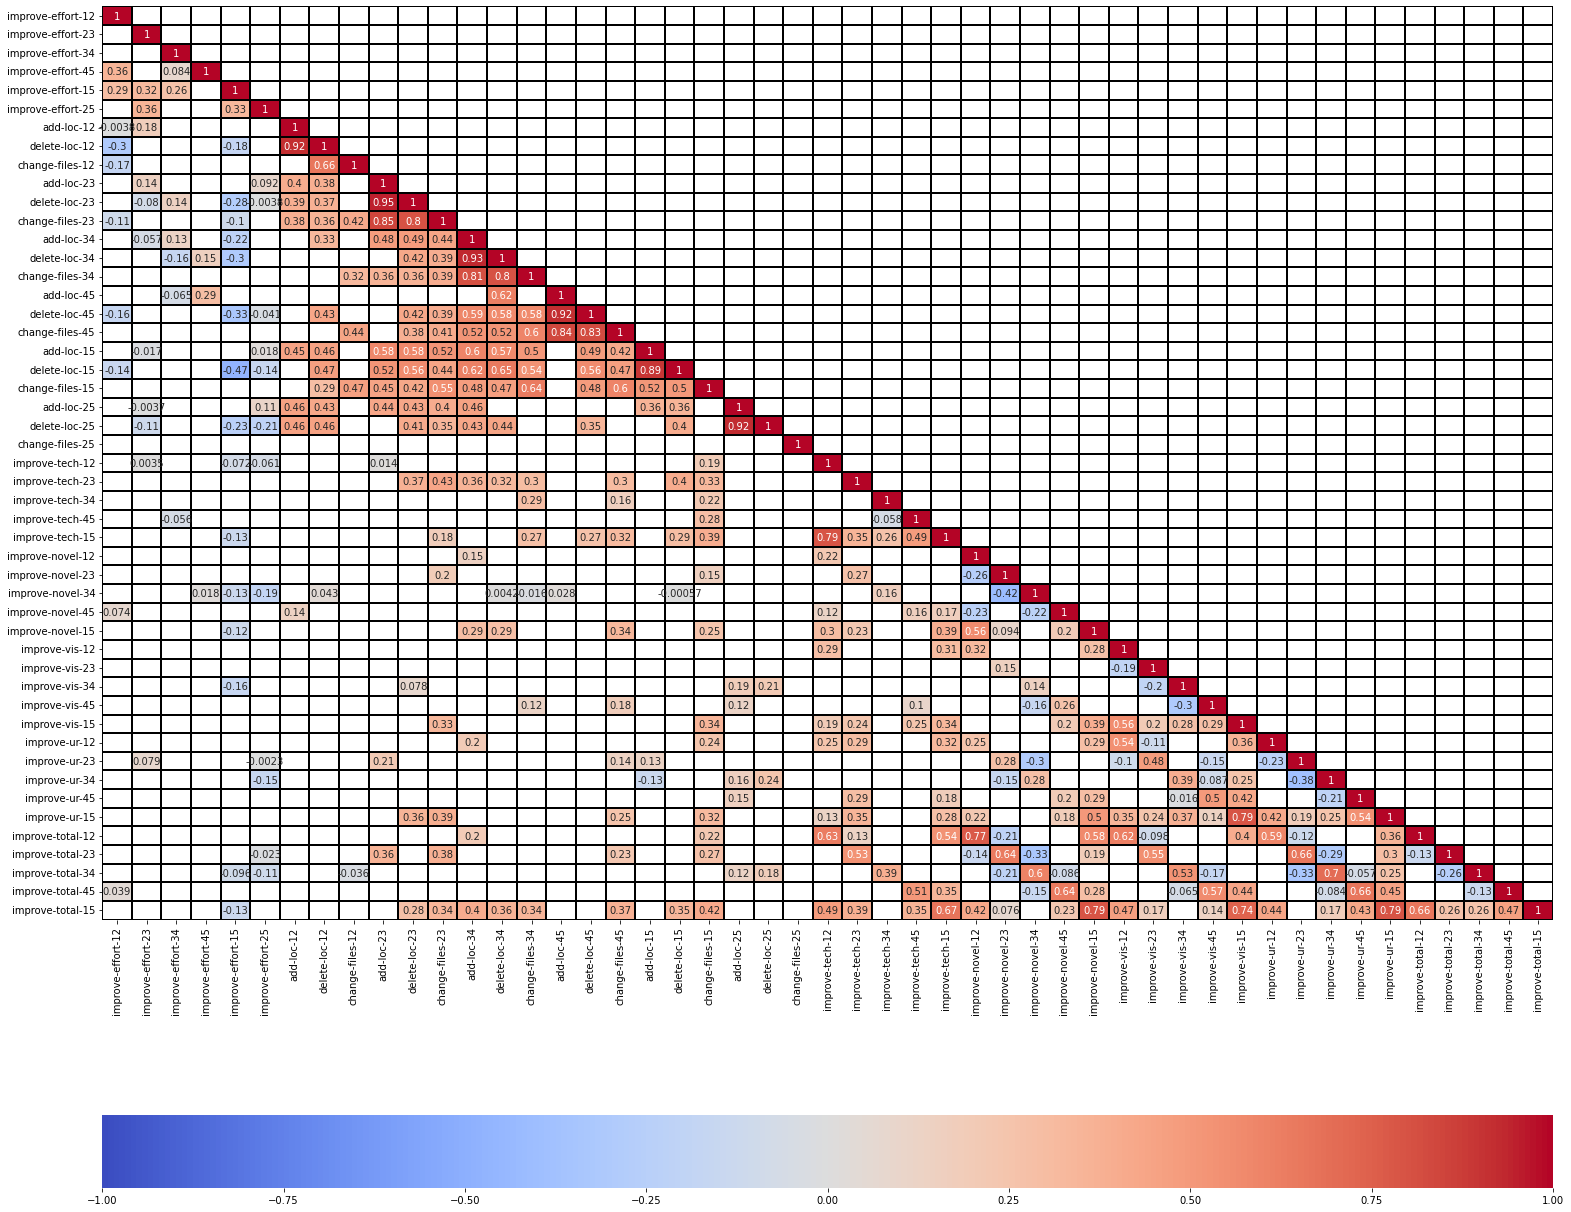

In [40]:
corr = improve_scores.corr(method='spearman')                            # get correlation
p_values = corr_sig(improve_scores)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)

## Interpretation Overall Sample

• The goal is to see whether the different subscores are correlated with each other in the overall sample. 

>> **The goal is to see whether the different types of loc are correlated with each other in the overall sample.**

>> * add-loc-15 with delete-loc-15 - ( 0.89 ) - high correlation

>> * add-loc-15 with change-files-15 ( 0.5 ) - high correlation

>> **We see high correlations of add-loc-15 with delete-loc-15 and change-files-15.**

>> * improve-effort-15 with add-loc-15 - not even significant 

>> * improve-effort-15 with change-files-15 - not even significant 

>> * improve-effort-15 with delete-loc-15 - (-0.47) - moderate negative correlation

>> **We see correlations that are not significant and negative correlations with improve-effort-15**

## Bogota 0 Correlation between LOC and Different Score Dimensions

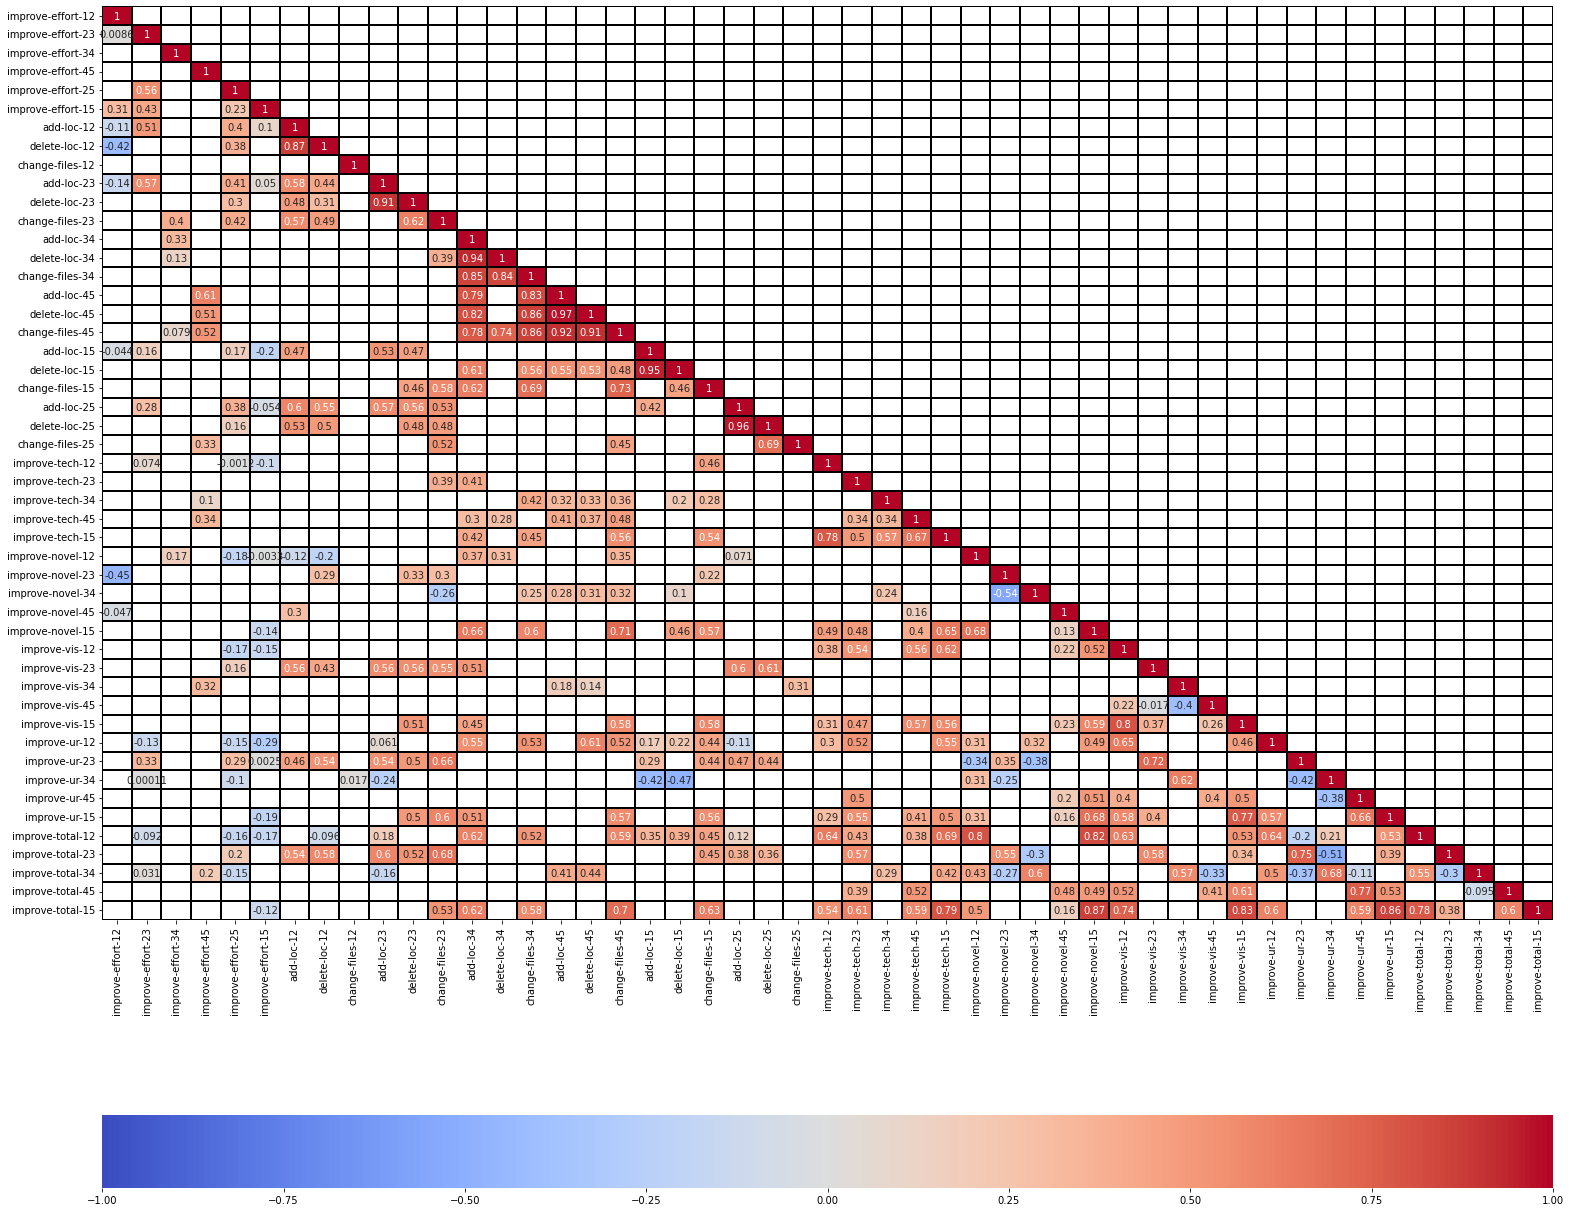

In [41]:
corr = improve_scores_bogota0.corr(method='spearman')                            # get correlation
p_values = corr_sig(improve_scores_bogota0)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)

## Interpretation Bogota 0 ( No Transparency )

>> **The goal is to see whether the different types of loc are correlated with each other in the overall sample.**

>> * add-loc-15 with delete-loc-15 - ( 0.96 ) - high correlation

>> * add-loc-15 with change-files-15 ( 0.9 ) - high correlation

>> **We see high correlations with add-loc-15 for both delete-loc-15 and change-files-15.**

>> * improve-effort-15 with add-loc-15 - not even significant 

>> * improve-effort-15 with delete-loc-15 - ( -0.43 )( negative moderate correlation )

>> * improve-effort-15 with change-files-15 = not even significant 

>> **We see correlations that are not significant and negative correlations with improve-effort-15**

## Bogota 1 Correlation between LOC and Different Score Dimensions

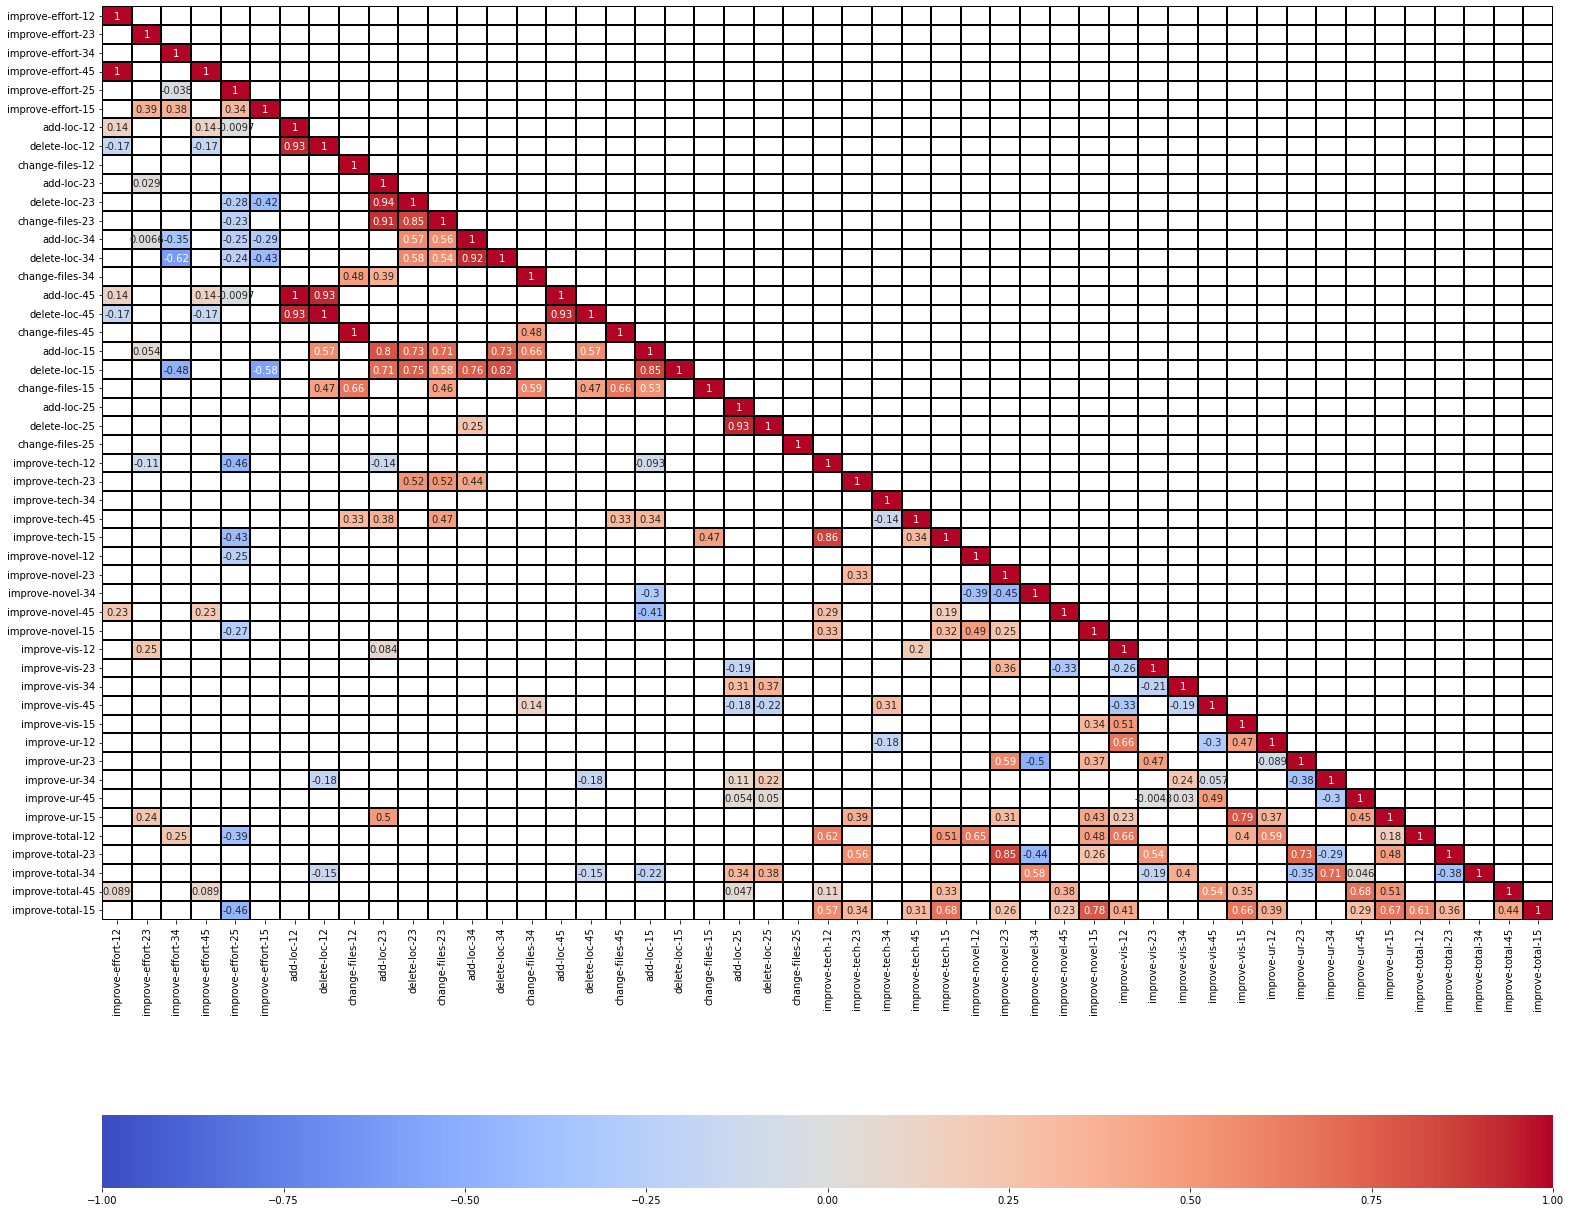

In [42]:
corr = improve_scores_bogota1.corr(method='spearman')                            # get correlation
p_values = corr_sig(improve_scores_bogota1)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)

## Interpretation Bogota 1 ( Performance Transparency )

>> **The goal is to see whether the different types of loc are correlated with each other in the overall sample.**

>> * add-loc-15 with delete-loc-15 - ( 0.85 ) - high correlation

>> * add-loc-15 with change-files-15 ( 0.53 ) - high correlation

>> **We see high correlations with add-loc-15 for both delete-loc-15 and change-files-15.** 

>> * improve-effort-15 with add-loc-15 - not even significant

>> * improve-effort-15 with delete-loc-15 - ( -0.58 ) - high negative correlation 

>> * improve-effort-15 with change-files-15 - not even significant 

>> **We see correlations that are not significant and negative correlations with improve-effort-15.**

## Bogota 2 Correlation between LOC and Different Score Dimensions

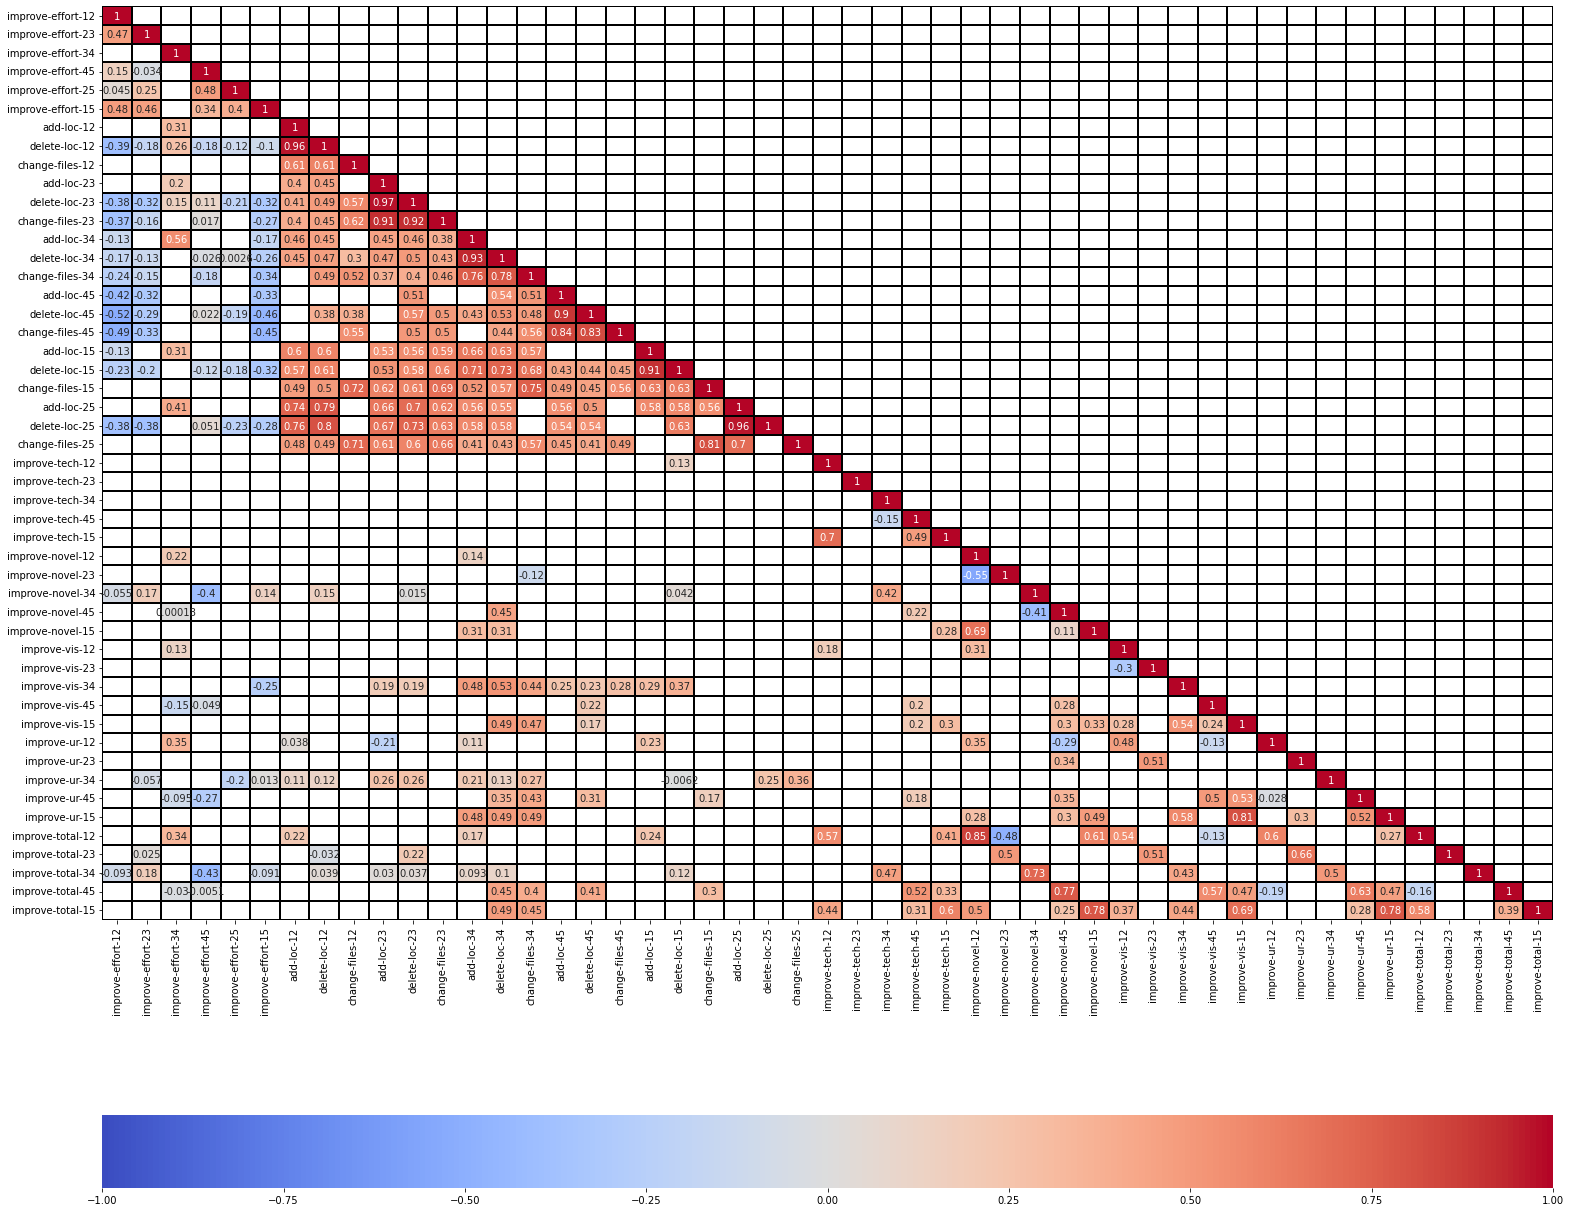

In [43]:
corr = improve_scores_bogota2.corr(method='spearman')                            # get correlation
p_values = corr_sig(improve_scores_bogota2)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)

## Interpretation Bogota 2 ( Solution Transparency )

>> **The goal is to see whether the different types of loc are correlated with each other in the overall sample.**

>> * add-loc-15 with delete-loc-15 - ( 0.94 ) - high correlation

>> * add-loc-15 with change-files-15 ( 0.64 ) - high correlation

>> **We see high correlations with add-loc-15 for both delete-loc-15 and change-files-15.**

>> * improve-effort-15 with add-loc-15 - not even significant

>> * improve-effort-15 with delete-loc-15 - (-0.32) - ( moderate negative correlation )

>> * improve-effort-15 with change-files-15 - not even significant

>> **We see correlations that are not significant and moderate negative correlation.**

## Bogota 3 Correlation between LOC and Different Score Dimensions

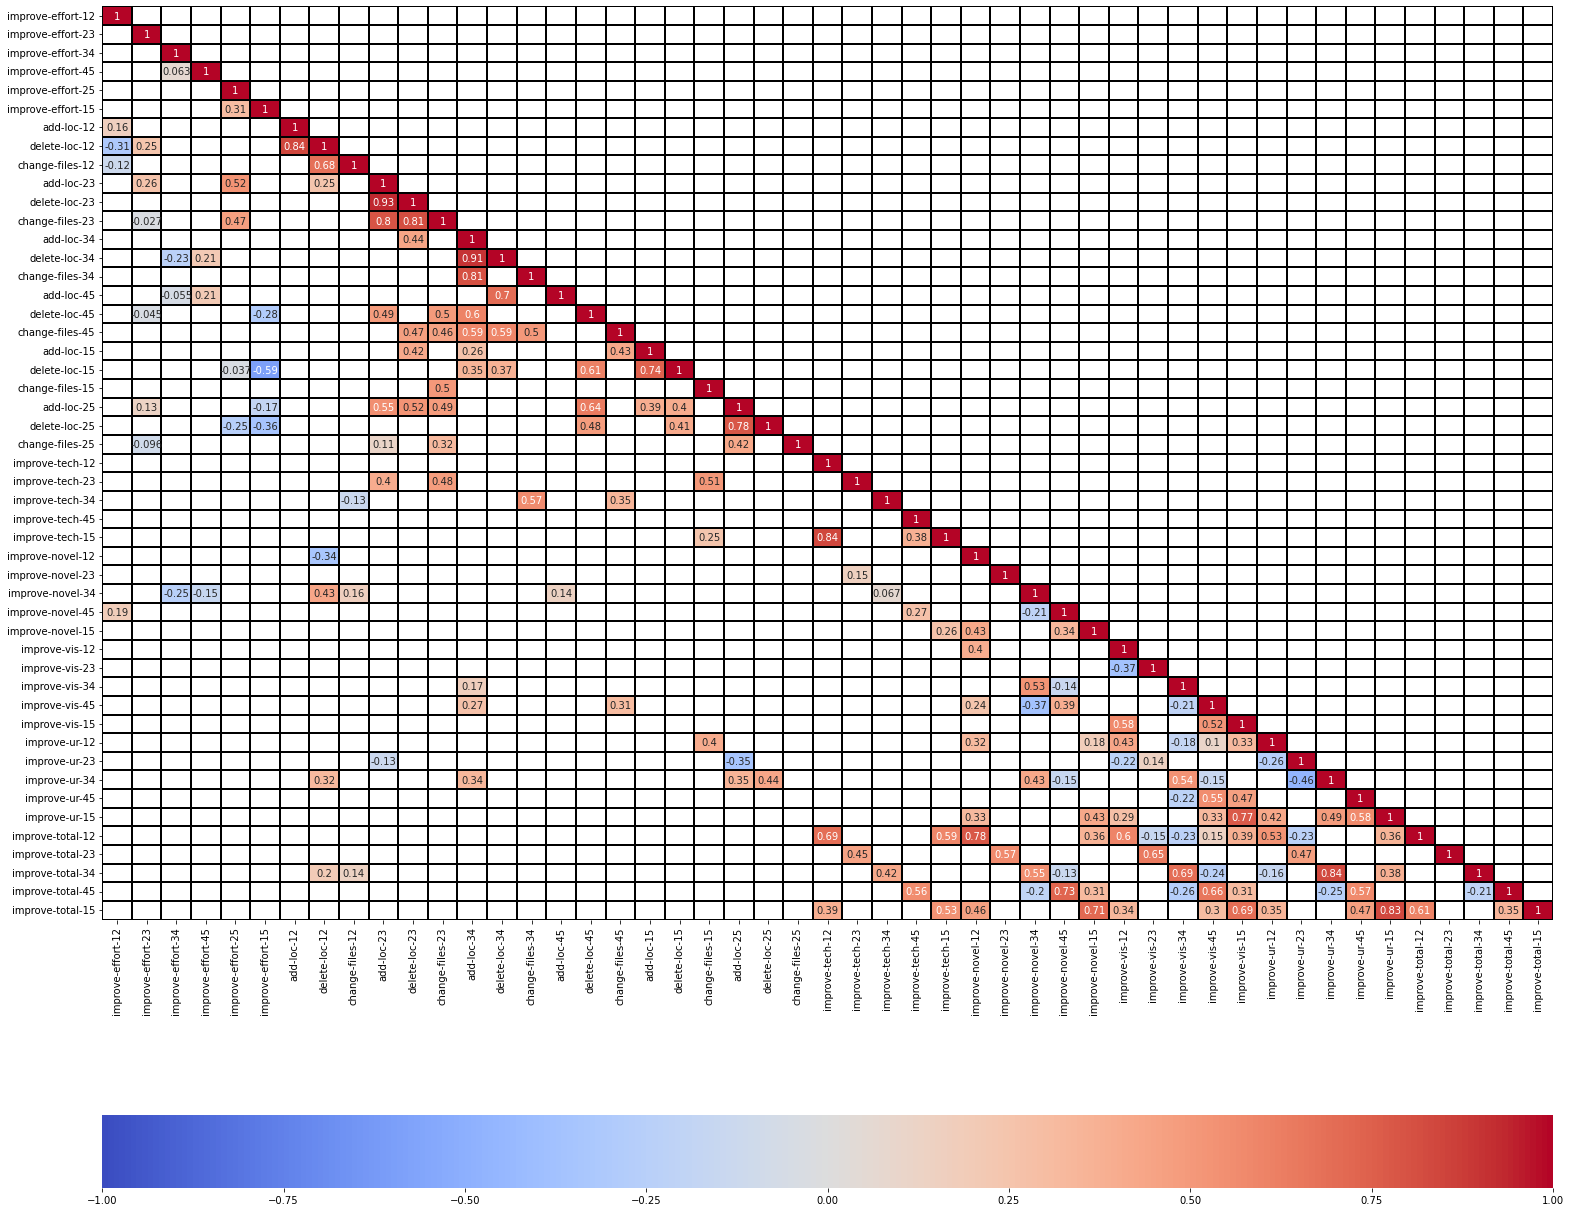

In [44]:
corr = improve_scores_bogota3.corr(method='spearman')                            # get correlation
p_values = corr_sig(improve_scores_bogota3)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)

## Interpretation Bogota 3 ( Full Transparency )

>> **The goal is to see whether the different types of loc are correlated with each other in the overall sample.**

>> * add-loc-15 with delete-loc-15 - ( 0.74 ) - high correlation

>> * add-loc-15 with change-files-15 ( 0.43 ) - moderate correlation

>> **We see high correlation and moderate correlation with add-loc-15.**

>> * improve-effort-15 with add-loc-15 - not even significant

>> * improve-effort-15 with delete-loc-15 - (-0.32) - ( moderate negative correlation )

>> * improve-effort-15 with change-files-15 - not even significant

>> **We see correlations that are not significant and moderate negative correlation.**



## improve-tech-15 Box Plot

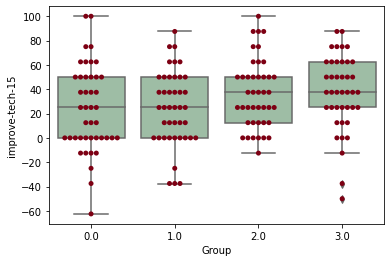

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='Group', y='improve-tech-15', data=overall_loc_scores_final, color='#99c2a2')
ax = sns.swarmplot(x="Group", y="improve-tech-15", data=overall_loc_scores_final, color='#7d0013')
plt.show()

>> Note: We want to have the linechart for each subgroups,   
   x-axis is the phases, 
   y-axis is the raw tech score, 
   legend we will have the groups   
   Interpretation: The 2 transparency conditions
   (2) and (3) seems to be improving more on tech. The median is higher. 

In [46]:
overall_loc_scores_final.groupby('Group', as_index=False)['tech-phase1'].mean()

Group  tech-phase1
0    0.0    26.162791
1    1.0    40.476190
2    2.0    33.333333
3    3.0    36.585366

In [47]:
overall_loc_scores_final.groupby('Group', as_index=False)['tech-phase2'].mean()

Group  tech-phase2
0    0.0    41.860465
1    1.0    58.333333
2    2.0    56.845238
3    3.0    60.365854

In [48]:
overall_loc_scores_final.groupby('Group', as_index=False)['tech-phase3'].mean()

Group  tech-phase3
0    0.0    39.534884
1    1.0    57.440476
2    2.0    55.285714
3    3.0    60.060976

In [49]:
overall_loc_scores_final.groupby('Group', as_index=False)['tech-phase4'].mean()

Group  tech-phase4
0    0.0    43.313953
1    1.0    61.607143
2    2.0    56.250000
3    3.0    64.634146

In [50]:
overall_loc_scores_final.groupby('Group', as_index=False)['tech-phase5'].mean()

Group  tech-phase5
0    0.0    49.709302
1    1.0    64.880952
2    2.0    69.940476
3    3.0    73.780488

## improve-tech-15 line charts


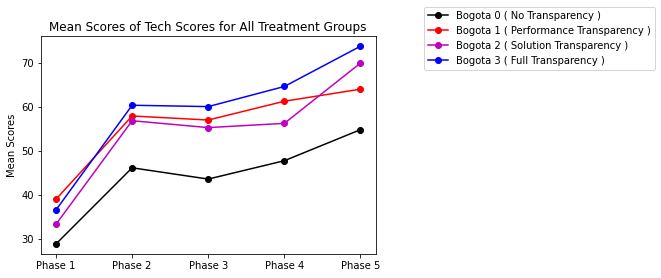

In [51]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = [28.85, 46.15, 43.59, 47.76, 54.81]
y2 = [39.02, 57.93, 57.01, 61.28, 64.02]
y3 = [33.33, 56.85, 55.29, 56.25, 69.94]
y4 = [36.59, 60.37, 60.06, 64.63, 73.78]   

x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'ko-',label='Bogota 0 ( No Transparency )')
line2 = plt.plot(x_axis, y2,'ro-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'mo-',label='Bogota 2 ( Solution Transparency )')
line3 = plt.plot(x_axis, y4,'bo-',label='Bogota 3 ( Full Transparency )')

plt.title("Mean Scores of Tech Scores for All Treatment Groups")
plt.ylabel("Mean Scores")

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

In [52]:
overall_loc_scores_tech = overall_loc_scores_final[["tech-phase1", "tech-phase2", "tech-phase3", "tech-phase4", "tech-phase5"]]

# lines = overall_loc_scores_tech.plot.line()

overall_loc_scores_tech

tech-phase1  tech-phase2  tech-phase3  tech-phase4  tech-phase5
0           50.0         75.0         75.0        100.0        100.0
1           87.5         87.5        100.0         87.5         87.5
2           50.0         62.5         62.5         62.5         75.0
3            0.0         12.5          0.0         37.5         62.5
4            0.0         62.5         37.5         37.5         50.0
..           ...          ...          ...          ...          ...
163          0.0         12.5          0.0          0.0          0.0
164          0.0          0.0          0.0          0.0          0.0
165          0.0          0.0          0.0          0.0          0.0
166          0.0          0.0          0.0          0.0          0.0
167          0.0          0.0          0.0          0.0          0.0

[168 rows x 5 columns]

## improve-vis-15 Box Plot

/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/categorical.py:1296: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


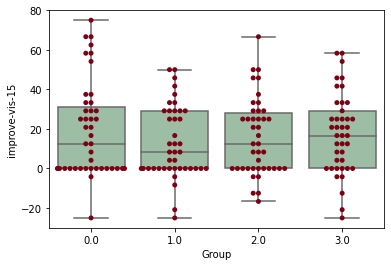

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='Group', y='improve-vis-15', data=overall_loc_scores_final, color='#99c2a2')
ax = sns.swarmplot(x="Group", y="improve-vis-15", data=overall_loc_scores_final, color='#7d0013')
plt.show()

>> Note: We want to have the linechart for each subgroups,   
   x-axis is the phases, 
   y-axis is the raw tech score, 
   legend we will have the groups   
   Interpretation: The baseline condition (1) seems to be highest in terms of improving on vis. Could be a skills.      effect. Check correlation with effort, LOC. 
   

In [54]:
overall_loc_scores_final.groupby('Group', as_index=False)['infovis-phase1'].mean()

Group  infovis-phase1
0    0.0       13.275116
1    1.0       32.043571
2    2.0       26.389524
3    3.0       29.269024

In [55]:
overall_loc_scores_final.groupby('Group', as_index=False)['infovis-phase2'].mean()

Group  infovis-phase2
0    0.0       23.642791
1    1.0       34.721667
2    2.0       29.761905
3    3.0       33.129512

In [56]:
overall_loc_scores_final.groupby('Group', as_index=False)['infovis-phase3'].mean()

Group  infovis-phase3
0    0.0       28.197674
1    1.0       38.392143
2    2.0       35.415952
3    3.0       36.584634

In [57]:
overall_loc_scores_final.groupby('Group', as_index=False)['infovis-phase4'].mean()

Group  infovis-phase4
0    0.0       29.554186
1    1.0       43.055476
2    2.0       36.606905
3    3.0       35.670000

In [58]:
overall_loc_scores_final.groupby('Group', as_index=False)['infovis-phase5'].mean()

Group  infovis-phase5
0    0.0       32.752093
1    1.0       44.940476
2    2.0       42.162381
3    3.0       47.051951

## improve-vis-15 line charts

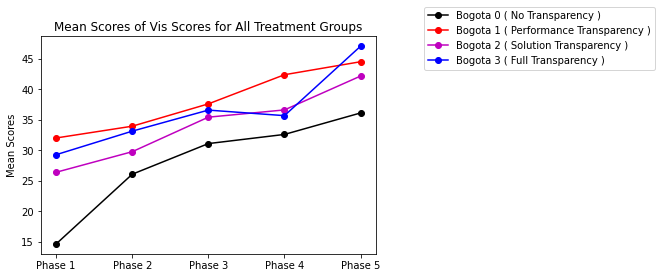

In [59]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [Vis Scores ]

y1 = [14.64, 26.07, 31.09, 32.59, 36.11]
y2 = [32.01, 33.94, 37.60, 42.38, 44.51]
y3 = [26.39, 29.76, 35.42, 36.61, 42.16]
y4 = [29.27, 33.13, 36.58, 35.67, 47.05]   

x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'ko-',label='Bogota 0 ( No Transparency )')
line2 = plt.plot(x_axis, y2,'ro-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'mo-',label='Bogota 2 ( Solution Transparency )')
line3 = plt.plot(x_axis, y4,'bo-',label='Bogota 3 ( Full Transparency )')

plt.title("Mean Scores of Vis Scores for All Treatment Groups")
plt.ylabel("Mean Scores")

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

## improve-ur-15 Box Plot

/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/categorical.py:1296: UserWarning: 16.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/categorical.py:1296: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


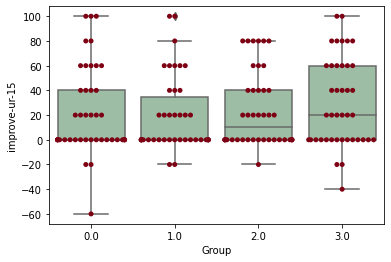

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='Group', y='improve-ur-15', data=overall_loc_scores_final, color='#99c2a2')
ax = sns.swarmplot(x="Group", y="improve-ur-15", data=overall_loc_scores_final, color='#7d0013')
plt.show()

In [61]:
overall_loc_scores_final.groupby('Group', as_index=False)['user-requirement-phase1'].mean()

Group  user-requirement-phase1
0    0.0                 7.906977
1    1.0                20.952381
2    2.0                14.285714
3    3.0                17.073171

In [62]:
overall_loc_scores_final.groupby('Group', as_index=False)['user-requirement-phase2'].mean()

Group  user-requirement-phase2
0    0.0                12.093023
1    1.0                25.238095
2    2.0                21.428571
3    3.0                27.804878

In [63]:
overall_loc_scores_final.groupby('Group', as_index=False)['user-requirement-phase3'].mean()

Group  user-requirement-phase3
0    0.0                22.325581
1    1.0                33.809524
2    2.0                29.523810
3    3.0                29.268293

In [64]:
overall_loc_scores_final.groupby('Group', as_index=False)['user-requirement-phase4'].mean()

Group  user-requirement-phase4
0    0.0                20.930233
1    1.0                37.619048
2    2.0                33.333333
3    3.0                33.170732

In [65]:
overall_loc_scores_final.groupby('Group', as_index=False)['user-requirement-phase5'].mean()

Group  user-requirement-phase5
0    0.0                29.767442
1    1.0                40.000000
2    2.0                37.619048
3    3.0                46.341463

## improve-ur-15 Line Charts

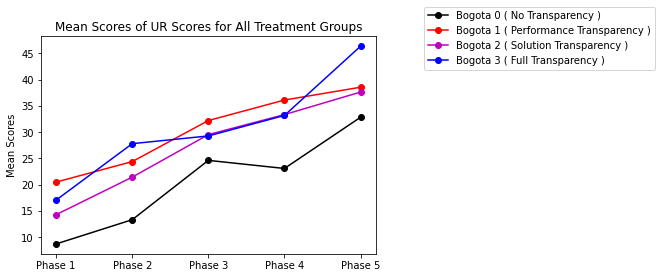

In [66]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ UR Scores ]

y1 = [8.72, 13.33, 24.62, 23.08, 32.82]
y2 = [20.49, 24.39, 32.2, 36.1, 38.54]
y3 = [14.29, 21.43, 29.52, 33.33, 37.62]
y4 = [17.07, 27.8, 29.27, 33.17, 46.34]   

x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'ko-',label='Bogota 0 ( No Transparency )')
line2 = plt.plot(x_axis, y2,'ro-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'mo-',label='Bogota 2 ( Solution Transparency )')
line3 = plt.plot(x_axis, y4,'bo-',label='Bogota 3 ( Full Transparency )')

plt.title("Mean Scores of UR Scores for All Treatment Groups")
plt.ylabel("Mean Scores")

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

## improve-novel-15 Box Plots

/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/categorical.py:1296: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


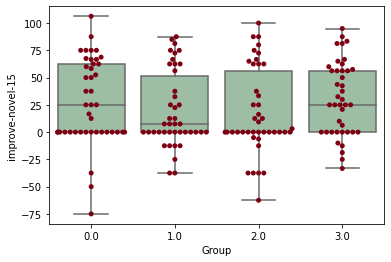

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='Group', y='improve-novel-15', data=overall_loc_scores_final, color='#99c2a2')
ax = sns.swarmplot(x="Group", y="improve-novel-15", data=overall_loc_scores_final, color='#7d0013')
plt.show()

In [68]:
overall_loc_scores_final.groupby('Group', as_index=False)['novelty-phase1'].mean()

Group  novelty-phase1
0    0.0        8.139535
1    1.0       27.956429
2    2.0       24.702381
3    3.0       19.867805

In [69]:
overall_loc_scores_final.groupby('Group', as_index=False)['novelty-phase2'].mean()

Group  novelty-phase2
0    0.0       20.058140
1    1.0       35.565476
2    2.0       32.142857
3    3.0       23.018293

In [70]:
overall_loc_scores_final.groupby('Group', as_index=False)['novelty-phase3'].mean()

Group  novelty-phase3
0    0.0       24.563953
1    1.0       42.113095
2    2.0       30.257857
3    3.0       25.304878

In [71]:
overall_loc_scores_final.groupby('Group', as_index=False)['novelty-phase4'].mean()

Group  novelty-phase4
0    0.0       26.744186
1    1.0       39.727143
2    2.0       29.042619
3    3.0       30.589512

In [72]:
overall_loc_scores_final.groupby('Group', as_index=False)['novelty-phase5'].mean()

Group  novelty-phase5
0    0.0       35.484651
1    1.0       47.817619
2    2.0       42.797857
3    3.0       50.690976

## improve-novel-15 Line Charts

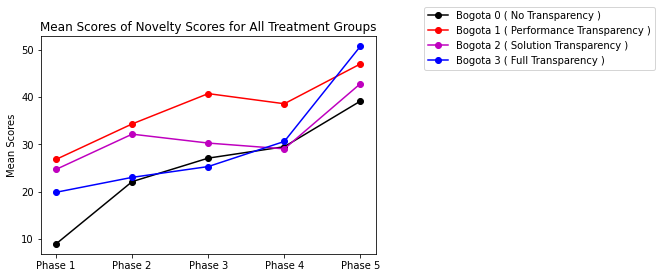

In [73]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Novelty Scores ]

y1 = [8.97, 22.12, 27.08, 29.49, 39.12]
y2 = [26.81, 34.3, 40.7, 38.56, 46.97]
y3 = [24.7, 32.14, 30.26, 29.04, 42.8]
y4 = [19.87, 23.02, 25.3, 30.6, 50.7]   

x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'ko-',label='Bogota 0 ( No Transparency )')
line2 = plt.plot(x_axis, y2,'ro-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'mo-',label='Bogota 2 ( Solution Transparency )')
line3 = plt.plot(x_axis, y4,'bo-',label='Bogota 3 ( Full Transparency )')

plt.title("Mean Scores of Novelty Scores for All Treatment Groups")
plt.ylabel("Mean Scores")

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

## add-loc-15 Box Plots

/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/categorical.py:1296: UserWarning: 32.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/categorical.py:1296: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


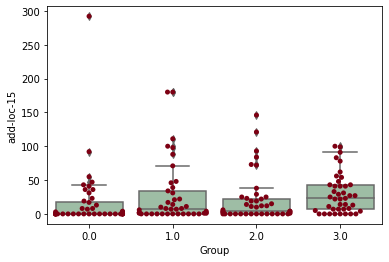

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='Group', y='add-loc-15', data=overall_loc_scores_final, color='#99c2a2')
ax = sns.swarmplot(x="Group", y="add-loc-15", data=overall_loc_scores_final, color='#7d0013')
plt.show()

In [75]:
overall_loc_scores_final.groupby('Group', as_index=False)['add-loc-15'].mean()

Group  add-loc-15
0    0.0   18.093023
1    1.0   27.857143
2    2.0   21.166667
3    3.0   29.487805

In [76]:
overall_loc_scores_final.groupby('Group', as_index=False)['add-loc-12'].mean()

Group  add-loc-12
0    0.0   13.976744
1    1.0   11.952381
2    2.0   12.023810
3    3.0   25.609756

In [77]:
overall_loc_scores_final.groupby('Group', as_index=False)['add-loc-23'].mean()

Group  add-loc-23
0    0.0   17.325581
1    1.0   26.500000
2    2.0   12.119048
3    3.0   19.707317

In [78]:
overall_loc_scores_final.groupby('Group', as_index=False)['add-loc-34'].mean()

Group  add-loc-34
0    0.0   17.325581
1    1.0   24.142857
2    2.0   19.976190
3    3.0   29.731707

In [79]:
overall_loc_scores_final.groupby('Group', as_index=False)['add-loc-45'].mean()

Group  add-loc-45
0    0.0   17.534884
1    1.0   11.952381
2    2.0    9.523810
3    3.0   37.219512

## add-loc-15 line charts

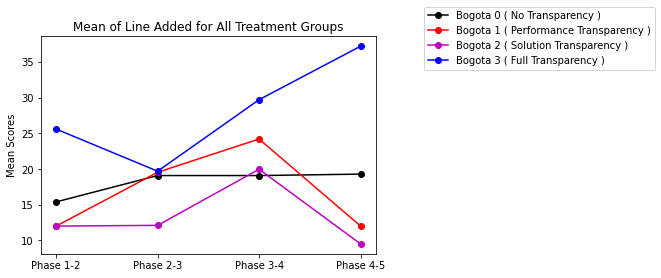

In [80]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Novelty Scores ]

y1 = [15.41, 19.1, 19.1, 19.3]
y2 = [12.02, 19.56, 24.22, 12.02]
y3 = [12.02, 12.12, 19.98, 9.52]
y4 = [25.61, 19.71, 29.73, 37.22]   

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'ko-',label='Bogota 0 ( No Transparency )')
line2 = plt.plot(x_axis, y2,'ro-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'mo-',label='Bogota 2 ( Solution Transparency )')
line3 = plt.plot(x_axis, y4,'bo-',label='Bogota 3 ( Full Transparency )')

plt.title("Mean of Line Added for All Treatment Groups")
plt.ylabel("Mean Scores")

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

## delete-loc-15 Box Plot

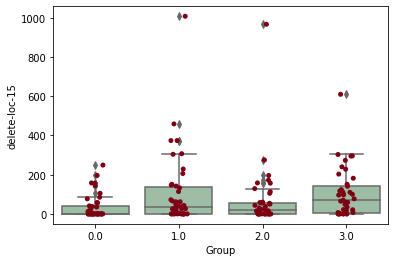

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='Group', y='delete-loc-15', data=overall_loc_scores_final, color='#99c2a2')
ax = sns.stripplot(x="Group", y="delete-loc-15", data=overall_loc_scores_final, color='#7d0013')
plt.show()

In [82]:
overall_loc_scores_final.groupby('Group', as_index=False)['delete-loc-15'].mean()

Group  delete-loc-15
0    0.0      33.883721
1    1.0     108.547619
2    2.0      67.309524
3    3.0     104.365854

In [83]:
overall_loc_scores_final.groupby('Group', as_index=False)['delete-loc-12'].mean()

Group  delete-loc-12
0    0.0      25.651163
1    1.0      23.166667
2    2.0      32.857143
3    3.0      51.975610

In [84]:
overall_loc_scores_final.groupby('Group', as_index=False)['delete-loc-23'].mean()

Group  delete-loc-23
0    0.0      13.232558
1    1.0      40.404762
2    2.0      32.166667
3    3.0      31.341463

In [85]:
overall_loc_scores_final.groupby('Group', as_index=False)['delete-loc-34'].mean()

Group  delete-loc-34
0    0.0      50.883721
1    1.0      58.023810
2    2.0      28.928571
3    3.0      81.682927

In [86]:
overall_loc_scores_final.groupby('Group', as_index=False)['delete-loc-45'].mean()

Group  delete-loc-45
0    0.0      26.651163
1    1.0      23.166667
2    2.0      22.833333
3    3.0      34.463415

## delete-loc-15 Line Charts

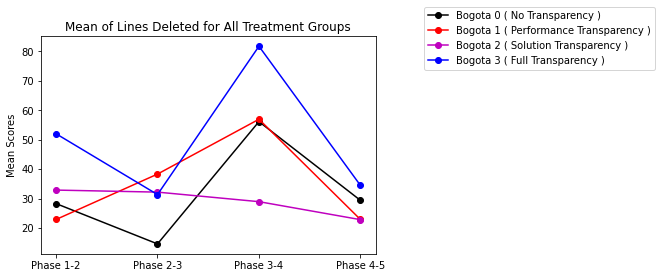

In [87]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Novelty Scores ]

y1 = [28.28, 14.59, 56.10, 29.38]
y2 = [22.88, 38.29, 56.90, 22.88]
y3 = [32.86, 32.17, 28.93, 22.83]
y4 = [51.98, 31.34, 81.68, 34.46]   

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'ko-',label='Bogota 0 ( No Transparency )')
line2 = plt.plot(x_axis, y2,'ro-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'mo-',label='Bogota 2 ( Solution Transparency )')
line3 = plt.plot(x_axis, y4,'bo-',label='Bogota 3 ( Full Transparency )')

plt.title("Mean of Lines Deleted for All Treatment Groups")
plt.ylabel("Mean Scores")

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

## improve-effort-15 Box Plots

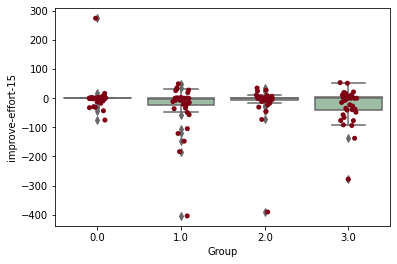

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='Group', y='improve-effort-15', data=overall_loc_scores_final, color='#99c2a2')
ax = sns.stripplot(x="Group", y='improve-effort-15', data=overall_loc_scores_final, color='#7d0013')
plt.show()

In [89]:
overall_loc_scores_final.groupby('Group', as_index=False)['improve-effort-15'].mean()

Group  improve-effort-15
0    0.0           1.151163
1    1.0         -26.416667
2    2.0         -12.488095
3    3.0         -22.695122

In [90]:
overall_loc_scores_final.groupby('Group', as_index=False)['improve-effort-12'].mean()

Group  improve-effort-12
0    0.0           1.151163
1    1.0           0.369048
2    2.0          -4.404762
3    3.0          -0.378049

In [91]:
overall_loc_scores_final.groupby('Group', as_index=False)['improve-effort-23'].mean()

Group  improve-effort-23
0    0.0          10.709302
1    1.0           6.297619
2    2.0          -3.964286
3    3.0           4.036585

In [92]:
overall_loc_scores_final.groupby('Group', as_index=False)['improve-effort-34'].mean()

Group  improve-effort-34
0    0.0          -8.116279
1    1.0          -4.869048
2    2.0           5.511905
3    3.0         -11.109756

In [93]:
overall_loc_scores_final.groupby('Group', as_index=False)['improve-effort-45'].mean()

Group  improve-effort-45
0    0.0           4.209302
1    1.0           0.369048
2    2.0          -1.892857
3    3.0          19.987805

## improve-effort-15 Line Charts

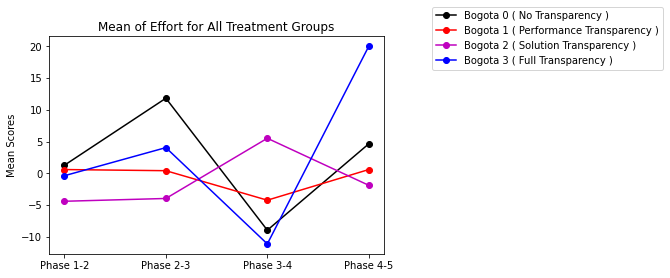

In [94]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Novelty Scores ]

y1 = [1.27, 11.81, -8.95, 4.64]
y2 = [0.59, 0.41, -4.23, 0.59]
y3 = [-4.40, -3.96, 5.51, -1.89]
y4 = [-0.38, 4.04, -11.11, 19.99]   

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'ko-',label='Bogota 0 ( No Transparency )')
line2 = plt.plot(x_axis, y2,'ro-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'mo-',label='Bogota 2 ( Solution Transparency )')
line3 = plt.plot(x_axis, y4,'bo-',label='Bogota 3 ( Full Transparency )')

plt.title("Mean of Effort for All Treatment Groups")
plt.ylabel("Mean Scores")

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

## change-files-15 Box Plots

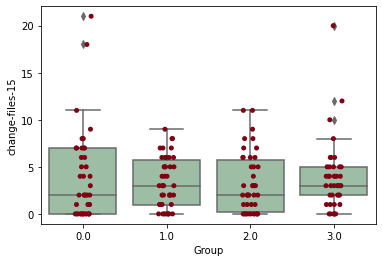

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='Group', y='change-files-15', data=overall_loc_scores_final, color='#99c2a2')
ax = sns.stripplot(x="Group", y='change-files-15', data=overall_loc_scores_final, color='#7d0013')
plt.show()

In [96]:
overall_loc_scores_final.groupby('Group', as_index=False)['change-files-15'].mean()

Group  change-files-15
0    0.0         3.976744
1    1.0         3.428571
2    2.0         3.261905
3    3.0         3.804878

In [97]:
overall_loc_scores_final.groupby('Group', as_index=False)['change-files-12'].mean()

Group  change-files-12
0    0.0         1.930233
1    1.0         1.547619
2    2.0         2.309524
3    3.0         2.512195

In [98]:
overall_loc_scores_final.groupby('Group', as_index=False)['change-files-23'].mean()

Group  change-files-23
0    0.0         1.232558
1    1.0         1.119048
2    2.0         1.285714
3    3.0         1.731707

In [99]:
overall_loc_scores_final.groupby('Group', as_index=False)['change-files-34'].mean()

Group  change-files-34
0    0.0         1.790698
1    1.0         1.880952
2    2.0         1.547619
3    3.0         1.658537

In [100]:
overall_loc_scores_final.groupby('Group', as_index=False)['change-files-45'].mean()

Group  change-files-45
0    0.0         1.023256
1    1.0         1.547619
2    2.0         1.214286
3    3.0         1.463415

## change-files-15 Line Charts

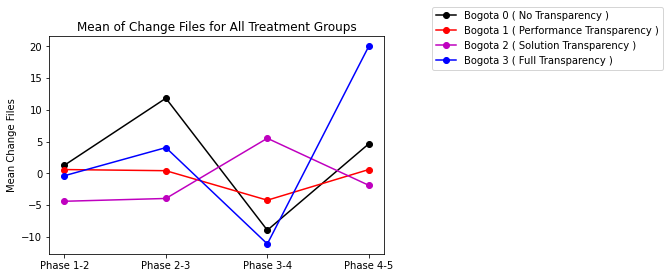

In [101]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Novelty Scores ]

y1 = [1.27, 11.81, -8.95, 4.64]
y2 = [0.59, 0.41, -4.23, 0.59]
y3 = [-4.40, -3.96, 5.51, -1.89]
y4 = [-0.38, 4.04, -11.11, 19.99]   

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'ko-',label='Bogota 0 ( No Transparency )')
line2 = plt.plot(x_axis, y2,'ro-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'mo-',label='Bogota 2 ( Solution Transparency )')
line3 = plt.plot(x_axis, y4,'bo-',label='Bogota 3 ( Full Transparency )')

plt.title("Mean of Change Files for All Treatment Groups")
plt.ylabel("Mean Change Files")

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

## Calculate one-way anove for each variable (each column) based on the "Group" column.




In [102]:
overall_loc_scores_final

Student  Group  user-requirement-phase5  infovis-phase5  \
0             fffeelipe    0.0                     20.0           29.17   
1             mnguzmanc    0.0                     60.0           75.00   
2            jmcuestasb    0.0                    100.0           54.17   
3            katherinsb    0.0                     20.0           37.50   
4          jjrodriguezn    0.0                     60.0           58.33   
..                  ...    ...                      ...             ...   
163  JhonEmmanuelTorres    3.0                      0.0            0.00   
164          janoguerab    0.0                      0.0            0.00   
165         djsanabriac    0.0                      0.0            0.00   
166          anmmunozme    0.0                      0.0            0.00   
167              li2266    0.0                      0.0            0.00   

     novelty-phase5  total-phase5  tech-phase5  tech-phase4  \
0             50.00        199.17        100.0        100.0   
1             67.50        290.00         87.5         87.5   
2             25.00        254.17         75.0         62.5   
3             16.67        136.67         62.5         37.5   
4             87.50        255.83         50.0         37.5   
..              ...           ...          ...          ...   
163            0.00          0.00          0.0          0.0   
164            0.00          0.00          0.0          0.0   
165            0.00          0.00          0.0          0.0   
166            0.00          0.00          0.0          0.0   
167            0.00          0.00          0.0          0.0   

     user-requirement-phase4  infovis-phase4  ...  improve-effort-23  \
0                       20.0           29.17  ...                0.0   
1                       20.0           37.50  ...              -16.5   
2                      100.0           58.33  ...                1.5   
3                       20.0           45.83  ...                0.0   
4                       40.0           54.17  ...                8.0   
..                       ...             ...  ...                ...   
163                      0.0            0.00  ...                0.0   
164                      0.0            0.00  ...                0.0   
165                      0.0            0.00  ...                0.0   
166                      0.0            0.00  ...                0.0   
167                      0.0            0.00  ...                0.0   

     improve-effort-34  improve-effort-45  improve-effort-15  \
0                -14.0               -6.0              -32.5   
1                 45.5               13.0              -29.0   
2                  9.0               -4.0                7.0   
3                  0.0               73.5                0.0   
4                 60.5                0.5                0.0   
..                 ...                ...                ...   
163                0.0                0.0                0.0   
164                0.0                0.0                0.0   
165                0.0                0.0                0.0   
166                0.0                0.0                0.0   
167                0.0                0.0                0.0   

     improve-effort-25  d3-effort-12  d3-effort-23  d3-effort-34  \
0                  0.0           0.0           0.0           0.0   
1                -21.0           0.0           0.0           0.0   
2                -12.0           0.0           0.0           0.0   
3                  0.0           0.0           0.0           0.0   
4                 34.5           0.0           0.0           0.0   
..                 ...           ...           ...           ...   
163                0.0           0.0           0.0           0.0   
164                0.0           0.0           0.0           0.0   
165                0.0           0.0           0.0           0.0   
166                0.0           0.0        

In [103]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

dropped_student = overall_loc_scores_final.drop('Student', axis=1)
df_long = dropped_student.melt(id_vars="Group")

df_long

Group                 variable  value
0        0.0  user-requirement-phase5   20.0
1        0.0  user-requirement-phase5   60.0
2        0.0  user-requirement-phase5  100.0
3        0.0  user-requirement-phase5   20.0
4        0.0  user-requirement-phase5   60.0
...      ...                      ...    ...
23179    3.0             d3-effort-15    0.0
23180    0.0             d3-effort-15    0.0
23181    0.0             d3-effort-15    0.0
23182    0.0             d3-effort-15    0.0
23183    0.0             d3-effort-15    0.0

[23184 rows x 3 columns]

In [104]:
df_long.to_csv('long.csv')
df_long

Group                 variable  value
0        0.0  user-requirement-phase5   20.0
1        0.0  user-requirement-phase5   60.0
2        0.0  user-requirement-phase5  100.0
3        0.0  user-requirement-phase5   20.0
4        0.0  user-requirement-phase5   60.0
...      ...                      ...    ...
23179    3.0             d3-effort-15    0.0
23180    0.0             d3-effort-15    0.0
23181    0.0             d3-effort-15    0.0
23182    0.0             d3-effort-15    0.0
23183    0.0             d3-effort-15    0.0

[23184 rows x 3 columns]

In [105]:
def aov_func(x):
    model = ols('value ~ Group', data=x).fit()
    return sm.stats.anova_lm(model)
        
output_df = df_long.groupby("variable").apply(aov_func)
output_df

df         sum_sq      mean_sq         F  \
variable                                                                        
Q10                     Group       1.0       0.000038     0.000038  0.000047   
                        Residual  166.0     133.851153     0.806332       NaN   
Q11                     Group       1.0      13.253679    13.253679  1.222116   
                        Residual  166.0    1800.246321    10.844857       NaN   
Q12                     Group       1.0       5.981604     5.981604  1.344644   
...                                 ...            ...          ...       ...   
user-requirement-phase3 Residual  166.0  154308.003742   929.566288       NaN   
user-requirement-phase4 Group       1.0    2291.257488  2291.257488  2.276574   
                        Residual  166.0  167070.647274  1006.449682       NaN   
user-requirement-phase5 Group       1.0    4715.607723  4715.607723  3.643977   
                        Residual  166.0  214817.725610  1294.082684       NaN   

                                    PR(>F)  
variable                                    
Q10                     Group     0.994533  
                        Residual       NaN  
Q11                     Group     0.270545  
                        Residual       NaN  
Q12                     Group     0.247882  
...                                    ...  
user-requirement-phase3 Residual       NaN  
user-requirement-phase4 Group     0.133243  
                        Residual       NaN  
user-requirement-phase5 Group     0.057998  
                        Residual       NaN  

[276 rows x 5 columns]

## List of Variables that are Significant [ Less than or Equal to 0.05 ]

In [106]:
output_df.loc[(output_df['PR(>F)'] <= 0.05)]

df        sum_sq       mean_sq          F  \
variable                                                                    
Q5_Q5_3                 Group  1.0     17.640652     17.640652   9.038714   
improve-effort-25       Group  1.0  15481.845953  15481.845953   5.175937   
improve-novel-45        Group  1.0   3275.408426   3275.408426   4.394043   
improve-sum-tech        Group  1.0   5933.015589   5933.015589   6.019296   
improve-tech-15         Group  1.0   5933.015589   5933.015589   6.019296   
improve-total-45        Group  1.0  19761.013862  19761.013862   5.492159   
improve-vis-45          Group  1.0   1642.197176   1642.197176   6.374250   
infovis-phase1          Group  1.0   3862.520770   3862.520770   9.988911   
infovis-phase2          Group  1.0   1186.603991   1186.603991   4.246122   
infovis-phase5          Group  1.0   3423.319344   3423.319344   6.254053   
tech-phase2             Group  1.0   6233.374504   6233.374504  10.416294   
tech-phase3             Group  1.0   7530.453847   7530.453847   8.964456   
tech-phase4             Group  1.0   7296.903146   7296.903146   8.098067   
tech-phase5             Group  1.0  12667.613861  12667.613861  12.246820   
total-phase1            Group  1.0  30334.358869  30334.358869   5.024412   
total-phase2            Group  1.0  34486.255879  34486.255879   5.116196   
total-phase5            Group  1.0  90806.190296  90806.190296   7.486340   
user-requirement-phase2 Group  1.0   3984.690579   3984.690579   6.832338   

                                 PR(>F)  
variable                                 
Q5_Q5_3                 Group  0.003054  
improve-effort-25       Group  0.024181  
improve-novel-45        Group  0.037581  
improve-sum-tech        Group  0.015184  
improve-tech-15         Group  0.015184  
improve-total-45        Group  0.020287  
improve-vis-45          Group  0.012517  
infovis-phase1          Group  0.001872  
infovis-phase2          Group  0.040900  
infovis-phase5          Group  0.013361  
tech-phase2             Group  0.001505  
tech-phase3             Group  0.003174  
tech-phase4             Group  0.004990  
tech-phase5             Group  0.000598  
total-phase1            Group  0.026318  
total-phase2            Group  0.025001  
total-phase5            Group  0.006894  
user-requirement-phase2 Group  0.009775

> Interpretation - improve-tech-15 mean score highest for Bogota 3 

In [107]:
print(overall_loc_scores_final['improve-effort-25'].loc[overall_loc_scores_final['Group'] == 0].mean())
print(overall_loc_scores_final['improve-effort-25'].loc[overall_loc_scores_final['Group'] == 1].mean())
print(overall_loc_scores_final['improve-effort-25'].loc[overall_loc_scores_final['Group'] == 2].mean())
print(overall_loc_scores_final['improve-effort-25'].loc[overall_loc_scores_final['Group'] == 3].mean())

12.732558139534884
-5.464285714285714
-14.345238095238095
-12.695121951219512


In [108]:
print(overall_loc_scores_final['improve-tech-15'].loc[overall_loc_scores_final['Group'] == 0].mean())
print(overall_loc_scores_final['improve-tech-15'].loc[overall_loc_scores_final['Group'] == 1].mean())
print(overall_loc_scores_final['improve-tech-15'].loc[overall_loc_scores_final['Group'] == 2].mean())
print(overall_loc_scores_final['improve-tech-15'].loc[overall_loc_scores_final['Group'] == 3].mean())

23.546511627906977
24.404761904761905
36.607142857142854
37.19512195121951


> Interpretation - improve-novel-45 mean score highest for Bogota 3

In [109]:
print(overall_loc_scores_final['improve-novel-45'].loc[overall_loc_scores_final['Group'] == 0].mean())
print(overall_loc_scores_final['improve-novel-45'].loc[overall_loc_scores_final['Group'] == 1].mean())
print(overall_loc_scores_final['improve-novel-45'].loc[overall_loc_scores_final['Group'] == 2].mean())
print(overall_loc_scores_final['improve-novel-45'].loc[overall_loc_scores_final['Group'] == 3].mean())

8.74046511627907
8.09047619047619
13.755238095238095
20.101463414634146


> Interpretation - improve-vis-45 mean score highest for Bogota 3

In [110]:
print(overall_loc_scores_final['improve-vis-45'].loc[overall_loc_scores_final['Group'] == 0].mean())
print(overall_loc_scores_final['improve-vis-45'].loc[overall_loc_scores_final['Group'] == 1].mean())
print(overall_loc_scores_final['improve-vis-45'].loc[overall_loc_scores_final['Group'] == 2].mean())
print(overall_loc_scores_final['improve-vis-45'].loc[overall_loc_scores_final['Group'] == 3].mean())

3.1979069767441857
1.8849999999999998
5.55547619047619
11.381951219512194


> Interpretation - improve-total-45 mean score highest for Bogota 3

In [111]:
print(overall_loc_scores_final['improve-total-45'].loc[overall_loc_scores_final['Group'] == 0].mean())
print(overall_loc_scores_final['improve-total-45'].loc[overall_loc_scores_final['Group'] == 1].mean())
print(overall_loc_scores_final['improve-total-45'].loc[overall_loc_scores_final['Group'] == 2].mean())
print(overall_loc_scores_final['improve-total-45'].loc[overall_loc_scores_final['Group'] == 3].mean())

28.333720930232555
15.630476190476191
37.28666666666667
53.8009756097561


## Post-Hoc Test [ Section to be Ignored ]

In [112]:
import pingouin as pg
from pingouin import pairwise_ttests

posthocs = pairwise_ttests(dv='improve-effort-25', between='Group', padjust='bonf', data=overall_loc_scores_final, correction=True)
posthocs

ModuleNotFoundError: No module named 'pingouin'

In [ ]:
pg.pairwise_gameshowell(data=overall_loc_scores_final, dv='improve-effort-25', between='Group')

In [ ]:
import statsmodels.stats.multicomp as mc
import scipy.stats as stats

comp = mc.MultiComparison(overall_loc_scores_final['improve-effort-25'], overall_loc_scores_final['Group'])

tb1, a1, a2 = comp.allpairtest(stats.ttest_ind, method='bonferroni')
tb1

In [ ]:
import statsmodels.stats.multicomp as mc
import scipy.stats as stats

comp = mc.MultiComparison(overall_loc_scores_final['improve-tech-15'], overall_loc_scores_final['Group'])

tb1, a1, a2 = comp.allpairtest(stats.ttest_ind, method='bonferroni')
tb1

In [ ]:
import statsmodels.stats.multicomp as mc
import scipy.stats as stats

comp = mc.MultiComparison(overall_loc_scores_final['improve-novel-45'], overall_loc_scores_final['Group'])

tb1, a1, a2 = comp.allpairtest(stats.ttest_ind, method='bonferroni')
tb1

In [ ]:
import statsmodels.stats.multicomp as mc
import scipy.stats as stats

comp = mc.MultiComparison(overall_loc_scores_final['improve-vis-45'], overall_loc_scores_final['Group'])

tb1, a1, a2 = comp.allpairtest(stats.ttest_ind, method='bonferroni')
tb1

In [ ]:
import statsmodels.stats.multicomp as mc
import scipy.stats as stats

comp = mc.MultiComparison(overall_loc_scores_final['improve-total-15'], overall_loc_scores_final['Group'])

tb1, a1, a2 = comp.allpairtest(stats.ttest_ind, method='bonferroni')
tb1

In [ ]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=overall_loc_scores_final['improve-effort-25'],
                          groups=overall_loc_scores_final['Group'],
                          alpha=0.05)

#display results
print(tukey)

In [ ]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=overall_loc_scores_final['improve-novel-45'],
                          groups=overall_loc_scores_final['Group'],
                          alpha=0.05)

#display results
print(tukey)

In [ ]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=overall_loc_scores_final['Q5_Q5_3'],
                          groups=overall_loc_scores_final['Group'],
                          alpha=0.05)

#display results
print(tukey)

In [ ]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=overall_loc_scores_final['improve-tech-15'],
                          groups=overall_loc_scores_final['Group'],
                          alpha=0.05)

#display results
print(tukey)

In [ ]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=overall_loc_scores_final['improve-vis-45'],
                          groups=overall_loc_scores_final['Group'],
                          alpha=0.05)

#display results
print(tukey)

In [ ]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=overall_loc_scores_final['improve-total-45'],
                          groups=overall_loc_scores_final['Group'],
                          alpha=0.05)

#display results
print(tukey)

In [ ]:
output_df.to_csv('output.csv')

### Cronbach’s Alpha ( Internal Consistency )

0.9 ≤ α	Excellent

0.8 ≤ α < 0.9	Good

0.7 ≤ α < 0.8	Acceptable

0.6 ≤ α < 0.7	Questionable

0.5 ≤ α < 0.6	Poor

α < 0.5	Unacceptable

In [ ]:
# 95% confidence interval for Cronbach's alpha

import pingouin as pg

dropped_student_group = overall_loc_scores_final.drop(['Student', 'Group'], axis=1)

pg.cronbach_alpha(data=dropped_student_group)



## Adequacy Test

Before you perform factor analysis, you need to evaluate the “factorability” of our dataset. Factorability means "can we found the factors in the dataset?". There are two methods to check the factorability or sampling adequacy:


* Bartlett’s Test
* Kaiser-Meyer-Olkin Test

Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis.

In [ ]:
# In this Bartlett ’s test, the p-value is 0. The test was statistically significant, 
# indicating that the observed correlation matrix is not an identity matrix.

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(dropped_student_group)
p_value

In [ ]:
# Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. 
# It determines the adequacy for each observed variable and for the complete model. 
# KMO estimates the proportion of variance among all the observed variable. 
# Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. 
# Value of KMO less than 0.6 is considered inadequate.

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(dropped_student_group)
kmo_model

## Factor Analysis Phase 1 - 5 [ All Groups ] 

In [ ]:
df_phase15 = dropped_student_group[['improve-novel-15', 'improve-vis-15', 'improve-ur-15', 'improve-tech-15', 'improve-total-15',
                                   ]]
df_phase15

> Variance differs a lot between the score variables, so we standardize them to values between 0 and 1 before performing PCA.

In [ ]:
print(df_phase15.var()['improve-novel-15'])
print(df_phase15.var()['improve-vis-15'])
print(df_phase15.var()['improve-ur-15'])
print(df_phase15.var()['improve-tech-15'])
print(df_phase15.var()['improve-total-15'])


In [ ]:
df_new = (df_phase15-df_phase15.mean())/df_phase15.std()
df_new.describe()

In [ ]:
# Here, we can see only for 1 eigenvalues are greater than one. 
# It means we need to choose only 1 factors (or unobserved variables).

from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer()
fa.fit(df_new)
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

In [ ]:
from factor_analyzer import FactorAnalyzer 
import matplotlib.pyplot as plt

In [ ]:
# create a factor analyzer variable and perform factor analysis 

fa = FactorAnalyzer(n_factors=1, rotation="varimax")
fa.fit(dropped_student_group)

In [ ]:
# Get the loadings

loadings = fa.loadings_

In [ ]:
# Get the Eigenvector and Eigenvalues

ev, v = fa.get_eigenvalues()

In [ ]:
# Do a scree plot 

xvals = range(1, dropped_student_group.shape[1] + 1)

In [ ]:
plt.scatter(xvals, ev)
plt.plot(xvals, ev)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
df_pca = pd.DataFrame.from_records(loadings)
df_pca

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1, svd_solver='full')
pca.fit(df_new)

In [ ]:
T = pca.transform(df_new)

In [ ]:
df_new.shape

In [ ]:
T.shape

In [ ]:
df_new.head()

In [ ]:
T

In [ ]:
pca.explained_variance_ratio_

# So just 1 principle component can explain almost 67% of the variance from these 5 features.

In [ ]:
components = pd.DataFrame(pca.components_, columns = df_new.columns, index=[0])
components

In [ ]:
import math

def get_important_features(transformed_features, components_, columns):
    """
    This function will return the most "important" 
    features so we can determine which have the most
    effect on multi-dimensional scaling
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print("Features by importance:\n", important_features)

get_important_features(T, pca.components_, df_new.columns.values)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def draw_vectors(transformed_features, components_, columns):
    """
    This funtion will project your *original* features
    onto your principal component feature-space, so that you can
    visualize how "important" each one was in the
    multi-dimensional scaling
    """

    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    ax = plt.axes()

    for i in range(num_columns):
    # Use an arrow to project each original feature as a
    # labeled vector on your principal component axes
        plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75)
        plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75)

    return ax

>> We can see from the plot that all components are positive in the first principle component. 

>> improve-ur-15, improve-novel-15, improve-total-15, improve-vis-15 are negative in the second principle component. Their lengths portray their magnitudes.

>> The participants in green have high values for the first principle component – They have high improve-ur-15, improve-novel-15, improve-total-15, improve-vis-15 and change-files-15

>> The participants in red have high values for the second principle component – They have high delete-loc-15 and add-loc-15

In [ ]:
# Get variance of each factors

# 1. Sum of squared loadings (variance)
# 2. Proportional variance
# 3. Cumulative variance

## 
fa.get_factor_variance()



## Factor Analysis - Group 0 

In [ ]:
dropped_student = overall_loc_scores_final.drop(['Student'], axis=1)

bogota_0 = dropped_student[dropped_student['Group'].isin([0])]

df_phase15_bogota0 = bogota_0[['improve-novel-15', 'improve-vis-15', 'improve-ur-15', 'improve-tech-15', 'improve-total-15']]
df_phase15_bogota0.head(5)

In [ ]:
print(df_phase15_bogota0.var()['improve-novel-15'])
print(df_phase15_bogota0.var()['improve-vis-15'])
print(df_phase15_bogota0.var()['improve-ur-15'])
print(df_phase15_bogota0.var()['improve-tech-15'])
print(df_phase15_bogota0.var()['improve-total-15'])


In [ ]:
df_new_bogota0 = (df_phase15_bogota0-df_phase15_bogota0.mean())/df_phase15_bogota0.std()
df_new_bogota0.describe()

In [ ]:
# Here, we can see only for 18-factors eigenvalues are greater than one. 
# It means we need to choose only 18 factors (or unobserved variables).

from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer()
fa.fit(df_new_bogota0)
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

In [ ]:
from factor_analyzer import FactorAnalyzer 
import matplotlib.pyplot as plt

In [ ]:
# create a factor analyzer variable and perform factor analysis 

fa = FactorAnalyzer(n_factors=1, rotation="varimax")
fa.fit(df_new_bogota0)

In [ ]:
# Get the loadings

loadings = fa.loadings_


In [ ]:
# Get the Eigenvector and Eigenvalues

ev, v = fa.get_eigenvalues()

In [ ]:
# Do a scree plot 

xvals_bogota0 = range(1, df_new_bogota0.shape[1] + 1)

In [ ]:
plt.scatter(xvals_bogota0, ev)
plt.plot(xvals_bogota0, ev)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
df_pca = pd.DataFrame.from_records(loadings)
df_pca

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1, svd_solver='full')
pca.fit(df_new_bogota0)

In [ ]:
T = pca.transform(df_new_bogota0)

In [ ]:
df_new_bogota0.shape

In [ ]:
T.shape

In [ ]:
df_new_bogota0.head()

In [ ]:
T

In [ ]:
pca.explained_variance_ratio_

# So just 1 principle components can explain almost 75% of the variance from these 9 features.

In [ ]:
components = pd.DataFrame(pca.components_, columns = df_new_bogota0.columns, index=[0])
components

In [ ]:
import math

def get_important_features(transformed_features, components_, columns):
    """
    This function will return the most "important" 
    features so we can determine which have the most
    effect on multi-dimensional scaling
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
   

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print("Features by importance:\n", important_features)

get_important_features(T, pca.components_, df_new_bogota0.columns.values)

## Factor Analysis - Group 1

In [ ]:
dropped_student = overall_loc_scores_final.drop(['Student'], axis=1)

bogota_1 = dropped_student[dropped_student['Group'].isin([1])]

df_phase15_bogota1 = bogota_1[['improve-novel-15', 'improve-vis-15', 'improve-ur-15', 'improve-tech-15', 'improve-total-15',]]
df_phase15_bogota1.head(5)

In [ ]:
print(df_phase15_bogota1.var()['improve-novel-15'])
print(df_phase15_bogota1.var()['improve-vis-15'])
print(df_phase15_bogota1.var()['improve-ur-15'])
print(df_phase15_bogota1.var()['improve-tech-15'])
print(df_phase15_bogota1.var()['improve-total-15'])


In [ ]:
df_new_bogota1 = (df_phase15_bogota1-df_phase15_bogota1.mean())/df_phase15_bogota1.std()
df_new_bogota1.describe()

In [ ]:
# Here, we can see only for 18-factors eigenvalues are greater than one. 
# It means we need to choose only 18 factors (or unobserved variables).

from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer()
fa.fit(df_new_bogota1)
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

In [ ]:
from factor_analyzer import FactorAnalyzer 
import matplotlib.pyplot as plt

fa = FactorAnalyzer(n_factors=1, rotation="varimax")
fa.fit(df_new_bogota1)

In [ ]:
# Get the loadings

loadings = fa.loadings_

In [ ]:
# Get the Eigenvector and Eigenvalues

ev, v = fa.get_eigenvalues()

In [ ]:
# Do a scree plot 

xvals_bogota1 = range(1, df_new_bogota1.shape[1] + 1)

In [ ]:
plt.scatter(xvals_bogota1, ev)
plt.plot(xvals_bogota1, ev)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
df_pca = pd.DataFrame.from_records(loadings)
df_pca

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1, svd_solver='full')
pca.fit(df_new_bogota0)

In [ ]:
T = pca.transform(df_new_bogota0)

In [ ]:
df_new_bogota1.shape

In [ ]:
T.shape

In [ ]:
df_new_bogota1.head()

In [ ]:
T

In [ ]:
pca.explained_variance_ratio_

In [ ]:
components = pd.DataFrame(pca.components_, columns = df_new_bogota1.columns, index=[0])
components

In [ ]:
import math

def get_important_features(transformed_features, components_, columns):
    """
    This function will return the most "important" 
    features so we can determine which have the most
    effect on multi-dimensional scaling
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])


    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print("Features by importance:\n", important_features)

get_important_features(T, pca.components_, df_new_bogota1.columns.values)

## Factor Analysis - Group 2

In [ ]:
dropped_student = overall_loc_scores_final.drop(['Student'], axis=1)

bogota_2 = dropped_student[dropped_student['Group'].isin([2])]

df_phase15_bogota2 = bogota_2[['improve-novel-15', 'improve-vis-15', 'improve-ur-15', 'improve-tech-15', 'improve-total-15']]
df_phase15_bogota2.head(5)

In [ ]:
print(df_phase15_bogota2.var()['improve-novel-15'])
print(df_phase15_bogota2.var()['improve-vis-15'])
print(df_phase15_bogota2.var()['improve-ur-15'])
print(df_phase15_bogota2.var()['improve-tech-15'])
print(df_phase15_bogota2.var()['improve-total-15'])


In [ ]:
df_new_bogota2 = (df_phase15_bogota2-df_phase15_bogota2.mean())/df_phase15_bogota2.std()
df_new_bogota2.describe()

In [ ]:
# Here, we can see only for 18-factors eigenvalues are greater than one. 
# It means we need to choose only 18 factors (or unobserved variables).

from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer()
fa.fit(df_new_bogota2)
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

In [ ]:
from factor_analyzer import FactorAnalyzer 
import matplotlib.pyplot as plt

# create a factor analyzer variable and perform factor analysis 

fa = FactorAnalyzer(n_factors=1, rotation="varimax")
fa.fit(df_new_bogota2)

In [ ]:
# Get the loadings

loadings = fa.loadings_


In [ ]:
# Get the Eigenvector and Eigenvalues

ev, v = fa.get_eigenvalues()

In [ ]:
# Do a scree plot 

xvals_bogota2 = range(1, df_new_bogota2.shape[1] + 1)

In [ ]:
plt.scatter(xvals_bogota2, ev)
plt.plot(xvals_bogota2, ev)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
df_pca = pd.DataFrame.from_records(loadings)
df_pca

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1, svd_solver='full')
pca.fit(df_new_bogota2)

In [ ]:
T = pca.transform(df_new_bogota2)

In [ ]:
df_new_bogota2.shape

In [ ]:
T.shape

In [ ]:
df_new_bogota2.head()

In [ ]:
T

In [ ]:
pca.explained_variance_ratio_

# So just 3 principle components can explain almost 73% of the variance from these 9 features.

In [ ]:
components = pd.DataFrame(pca.components_, columns = df_new_bogota2.columns, index=[0])
components

In [ ]:
import math

def get_important_features(transformed_features, components_, columns):
    """
    This function will return the most "important" 
    features so we can determine which have the most
    effect on multi-dimensional scaling
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])


    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print("Features by importance:\n", important_features)

get_important_features(T, pca.components_, df_new_bogota0.columns.values)

## Factor Analysis - Group 3

In [ ]:
dropped_student = overall_loc_scores_final.drop(['Student'], axis=1)

bogota_3 = dropped_student[dropped_student['Group'].isin([3])]

df_phase15_bogota3 = bogota_3[['improve-novel-15', 'improve-vis-15', 'improve-ur-15', 'improve-tech-15', 'improve-total-15']]
df_phase15_bogota3.head(5)

In [ ]:
print(df_phase15_bogota3.var()['improve-novel-15'])
print(df_phase15_bogota3.var()['improve-vis-15'])
print(df_phase15_bogota3.var()['improve-ur-15'])
print(df_phase15_bogota3.var()['improve-tech-15'])
print(df_phase15_bogota3.var()['improve-total-15'])

In [ ]:
df_new_bogota3 = (df_phase15_bogota3-df_phase15_bogota3.mean())/df_phase15_bogota3.std()
df_new_bogota3.describe()

In [ ]:
# Here, we can see only for 18-factors eigenvalues are greater than one. 
# It means we need to choose only 18 factors (or unobserved variables).

from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer()
fa.fit(df_new_bogota3)
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

In [ ]:
from factor_analyzer import FactorAnalyzer 
import matplotlib.pyplot as plt

fa = FactorAnalyzer(n_factors=2, rotation="varimax")
fa.fit(df_new_bogota3)

In [ ]:
# Get the loadings

loadings = fa.loadings_

In [ ]:
# Get the Eigenvector and Eigenvalues

ev, v = fa.get_eigenvalues()

In [ ]:
# Do a scree plot 

xvals_bogota3 = range(1, df_new_bogota3.shape[1] + 1)

In [ ]:
plt.scatter(xvals_bogota3, ev)
plt.plot(xvals_bogota3, ev)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
df_pca = pd.DataFrame.from_records(loadings)
df_pca

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')
pca.fit(df_new_bogota3)

In [ ]:
T = pca.transform(df_new_bogota3)

In [ ]:
df_new_bogota3.shape

In [ ]:
T.shape

In [ ]:
df_new_bogota3.head()

In [ ]:
T

In [ ]:
pca.explained_variance_ratio_

In [ ]:
components = pd.DataFrame(pca.components_, columns = df_new_bogota3.columns, index=[0, 1])
components

In [ ]:
import math

def get_important_features(transformed_features, components_, columns):
    """
    This function will return the most "important" 
    features so we can determine which have the most
    effect on multi-dimensional scaling
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print("Features by importance:\n", important_features)

get_important_features(T, pca.components_, df_new_bogota3.columns.values)

In [ ]:
ax = draw_vectors(T, pca.components_, df_new_bogota3.columns.values)
T_df = pd.DataFrame(T)
T_df.columns = ['component1', 'component2']

T_df['color'] = 'y'
T_df.loc[T_df['component1'] > 2 , 'color'] = 'g'
T_df.loc[T_df['component2'] > 2, 'color'] = 'r'

plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.scatter(T_df['component1'], T_df['component2'], color=T_df['color'], alpha=0.5)
plt.show()

## ANOVA with Pingouin Package [ Section to be Ignored ]

In [ ]:
import pandas as pd
import pingouin as pg


aov = pg.anova(dv='improve-novel-15', between=['Group', 'add-loc-15'], data=overall_loc_scores_final,
             detailed=True)

print(aov)

In [ ]:
import pandas as pd
import pingouin as pg


aov = pg.anova(dv='improve-tech-15', between=['Group', 'improve-effort-15'], data=overall_loc_scores_final,
             detailed=True)

print(aov)

In [ ]:
import pandas as pd
import pingouin as pg


aov = pg.anova(dv='improve-novel-15', between=['Group', 'improve-effort-15'], data=overall_loc_scores_final,
             detailed=True)

print(aov)

In [ ]:
import pandas as pd
import pingouin as pg


aov = pg.anova(dv='improve-vis-15', between=['Group', 'improve-effort-15'], data=overall_loc_scores_final,
             detailed=True)

print(aov)

In [ ]:
from pingouin import ancova, read_dataset
ancova(data=overall_loc_scores_final, dv='improve-novel-15', covar=['add-loc-15', 'improve-effort-15', 'delete-loc-15'], between='Group')


In [ ]:
import pandas as pd
import pingouin as pg


aov = pg.anova(dv='improve-ur-15', between=['Group', 'improve-effort-15'], data=overall_loc_scores_final,
             detailed=True)

print(aov)

## EDA Survey Questions [ Programming Skills ] 


### Q7 - 1

- Strongly Disagree - 0
- Disagree - 1
- Somewhat Disagree - 2
- Neither Agree nor Disagree - 3
- Somewhat Agree - 4
- Agree - 5
- Strongly Agree - 6

>> I am extremely skilled at programming in Javascript

>> Interpretation - Majority of the participants in all groups don't think that they are extremely skilled at Javascript. 

In [ ]:
survey0['Q7_Q7_1'].value_counts().plot(kind='bar', figsize=(15, 7))

In [ ]:
survey1['Q7_Q7_1'].value_counts().plot(kind='bar', figsize=(15, 7))

In [ ]:
survey2['Q7_Q7_1'].value_counts().plot(kind='bar', figsize=(15, 7))

In [ ]:
survey3['Q7_Q7_1'].value_counts().plot(kind='bar', figsize=(15, 7))

### Q7-2

>> I consider myself knowledgeable about good coding techniques on mashup design (combining data in an interactive web application)

>> Interpretation - Majority of the participants are undecided whether they know what a mashup is except for the full transparency group where majority of the participants have no idea what a mashup is. 

In [ ]:
survey0['Q7_Q7_2'].value_counts().plot(kind='bar', figsize=(15, 7))

In [ ]:
survey1['Q7_Q7_2'].value_counts().plot(kind='bar', figsize=(15, 7))


In [ ]:
survey2['Q7_Q7_2'].value_counts().plot(kind='bar', figsize=(15, 7))

In [ ]:
survey3['Q7_Q7_2'].value_counts().plot(kind='bar', figsize=(15, 7))

### Q7-3

>> I know somewhat more than most programmers about programming in Javascript

>> Interpretation - Majority of the participants in all groups. don't think that they know a lot about Javascript. 

In [ ]:
survey0['Q7_Q7_3'].value_counts().plot(kind='bar', figsize=(15, 7))

In [ ]:
survey1['Q7_Q7_3'].value_counts().plot(kind='bar', figsize=(15, 7))

In [ ]:
survey2['Q7_Q7_3'].value_counts().plot(kind='bar', figsize=(15, 7))

In [ ]:
survey3['Q7_Q7_3'].value_counts().plot(kind='bar', figsize=(15, 7))

### Q7 - 4

>> I know how to find what I am looking for when designing a mashup

>> Interpretation - Majority of the participants are undecided about designing mashup.  

In [ ]:
survey0['Q7_Q7_4'].value_counts().plot(kind='bar', figsize=(15, 7))

In [ ]:
survey1['Q7_Q7_4'].value_counts().plot(kind='bar', figsize=(15, 7))

In [ ]:
survey2['Q7_Q7_3'].value_counts().plot(kind='bar', figsize=(15, 7))

In [ ]:
survey3['Q7_Q7_4'].value_counts().plot(kind='bar', figsize=(15, 7))

### Q8 - 1

- Very Bad - 0
- Bad - 1
- Poor - 2
- Neither Good nor Bad - 3
- Fair - 4
- Good - 5
- Very Good - 6

>> How would you rate your skill at programming, compared to other things you do on the computer?

In [ ]:
survey0['Q8_Q8_1'].value_counts().plot(kind='bar', figsize=(15, 7))

In [ ]:
survey1['Q8_Q8_1'].value_counts().plot(kind='bar', figsize=(15, 7))

In [ ]:
survey2['Q8_Q8_1'].value_counts().plot(kind='bar', figsize=(15, 7))

In [ ]:
survey3['Q8_Q8_1'].value_counts().plot(kind='bar', figsize=(15, 7))

### Q8 - 2

>> How would you rate your skill at programming, compared to the sport or game you are best at?

In [ ]:
survey0['Q8_Q8_2'].value_counts().plot(kind='bar', figsize=(15, 7))

In [ ]:
survey1['Q8_Q8_2'].value_counts().plot(kind='bar', figsize=(15, 7))

In [ ]:
survey2['Q8_Q8_2'].value_counts().plot(kind='bar', figsize=(15, 7))

In [ ]:
survey3['Q8_Q8_2'].value_counts().plot(kind='bar', figsize=(15, 7))

### Q10 

- Bottom of the contest - 0
- Below Average - 1
- Average - 2
- Top 10 - 3
- Top 3 - 4

>> Based on your past experience,  what place do you think you will receive in this IronHacks?

>> Inference - Majority of the participants in all groups think that they are going to perform average. 
 

In [ ]:
survey0['Q10'].value_counts().plot(kind='bar', figsize=(15, 7))

In [ ]:
survey1['Q10'].value_counts().plot(kind='bar', figsize=(15, 7))

In [ ]:
survey2['Q10'].value_counts().plot(kind='bar', figsize=(15, 7))

In [ ]:
survey3['Q10'].value_counts().plot(kind='bar', figsize=(15, 7))

## Cronbach's Alpha

## PCA Survey Question 2

> High Cronbach's alpha between survey items for Question 2. High Internal Consistency. 

In [ ]:
survey_only = pd.read_csv('data/survey_final_read.csv', encoding= 'unicode_escape')

Q2 = survey_only[['Q2_Q2_1', 'Q2_Q2_2', 'Q2_Q2_3', 'Q2_Q2_4', 'Q2_Q2_5', 'Q2_Q2_6', 'Q2_Q2_7', 'Q2_Q2_8',
                    'Q2_Q2_9', 'Q2_Q2_10', 'Q2_Q2_11', 'Q2_Q2_12', 'Q2_Q2_13']]


# 95% confidence interval for Cronbach's alpha

import pingouin as pg

pg.cronbach_alpha(data=Q2)


survey_only

In [ ]:
Q2

In [ ]:
fa = FactorAnalyzer(n_factors=2, method='principal', rotation="varimax")
fa.fit(Q2)
print(fa.loadings_.round(2))

In [ ]:
fa = FactorAnalyzer(n_factors=2, rotation=None)
fa.fit(Q2)
print(fa.loadings_.round(2))

In [ ]:
# 1. Sum of squared loadings (variance)
# 2. Proportional variance
# 3. Cumulative variance

fa.get_factor_variance()

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(Q2)
p_value

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(Q2)
kmo_model

In [ ]:
Q2

In [ ]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer()
fa.fit(Q2)
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

In [ ]:
from factor_analyzer import FactorAnalyzer 
import matplotlib.pyplot as plt

fa = FactorAnalyzer(n_factors=2, rotation="varimax")
fa.fit(Q2)

In [ ]:
# Get the loadings

loadings = fa.loadings_

In [ ]:
# Get the Eigenvector and Eigenvalues

ev, v = fa.get_eigenvalues()

In [ ]:
xvals_bogota3 = range(1, Q2.shape[1] + 1)

In [ ]:
plt.scatter(xvals_bogota3, ev)
plt.plot(xvals_bogota3, ev)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
df_pca = pd.DataFrame.from_records(loadings)
df_pca

In [ ]:
Q2_raw = pd.read_csv("data/survey-motivation-WQ13-WQ1-WQ3-W12.csv")
Q2 = Q2_raw.drop(['hack_id'], axis = 1)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, svd_solver='full')
pca.fit(Q2)

In [ ]:
T = pca.transform(Q2)

In [ ]:
Q2.shape

In [ ]:
T.shape

In [ ]:
Q2.head()

In [ ]:
T

In [ ]:
pca.explained_variance_ratio_

In [ ]:
components = pd.DataFrame(pca.components_, columns = Q2.columns, index=[0, 1, 2])
components

## Interpretation: 

None loaded on factor 0

Loaded on factor 1 - "introduce_ideas", "improve_skills", "dissaatisfaction". ( intrinsic motivation are generally in the opposite direction compare to extrinsic ) 

Loaded on factor 2 - "excellent programmer", "known creativity", "dissatisfaction" ( all extrinsic factor here )

In [ ]:
import math

def get_important_features(transformed_features, components_, columns):
    """
    This function will return the most "important" 
    features so we can determine which have the most
    effect on multi-dimensional scaling
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print("Features by importance:\n", important_features)

get_important_features(T, pca.components_, Q2.columns.values)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(Q2)

In [ ]:
#95% of variance
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.6)
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)

In [ ]:
pca.explained_variance_ratio_

In [ ]:
components = pd.DataFrame(pca.components_, columns = Q2.columns, index=[0, 1])
components

> ## Interpretation: 

- Q2_Q2_5 is 'Because I want to get in touch with the experts in IronHacks'. 
- Q2_Q2_13 is 'To pass the class'

ax = draw_vectors(T, pca.components_, Q2.columns.values)
T_df = pd.DataFrame(T)
T_df.columns = ['component1', 'component2']

T_df['color'] = 'y'
T_df.loc[T_df['component1'] > 2 , 'color'] = 'g'
T_df.loc[T_df['component2'] > 2, 'color'] = 'r'

plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.scatter(T_df['component1'], T_df['component2'], color=T_df['color'], alpha=0.5)
plt.show()

In [ ]:
import numpy as np
from sklearn.datasets import load_iris


# Load pca
from pca import pca



# Reduce the data towards 3 PCs
model = pca(n_components=2)

# Fit transform
results = model.fit_transform(Q2)

results

In [ ]:
fig, ax = model.scatter()

In [ ]:
fig, ax = model.biplot(n_feat=4)

## PCA for Survey Question 3

> High Internal Consistency between Survey Items in Question 3

In [ ]:
survey_only = pd.read_csv('data/survey_final_read.csv', encoding= 'unicode_escape')

Q3 = survey_only[['Q3_Q3_1', 'Q3_Q3_2', 'Q3_Q3_3', 'Q3_Q3_4', 'Q3_Q3_5']]


# 95% confidence interval for Cronbach's alpha

import pingouin as pg

pg.cronbach_alpha(data=Q3)

In [ ]:
Q3

In [ ]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer()
fa.fit(Q3)
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

# only 1 eigenvalues greater than 1, so we use 1 factor - No rotation will be performed when the number of factors equals 1.


In [ ]:
from factor_analyzer import FactorAnalyzer 
import matplotlib.pyplot as plt

fa = FactorAnalyzer(n_factors=1, rotation="varimax")
fa.fit(Q3)

In [ ]:
# Get the loadings

loadings = fa.loadings_

In [ ]:
# Get the Eigenvector and Eigenvalues

ev, v = fa.get_eigenvalues()

In [ ]:
xvals_bogota3 = range(1, Q3.shape[1] + 1)

In [ ]:
plt.scatter(xvals_bogota3, ev)
plt.plot(xvals_bogota3, ev)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
df_pca = pd.DataFrame.from_records(loadings)
df_pca

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')
pca.fit(Q3)

In [ ]:
T = pca.transform(Q3)

In [ ]:
Q3.shape

In [ ]:
T.shape

In [ ]:
Q3.head()

In [ ]:
T

In [ ]:
pca.explained_variance_ratio_

In [ ]:
components = pd.DataFrame(pca.components_, columns = Q3.columns, index=[0, 1])
components

In [ ]:
import math

def get_important_features(transformed_features, components_, columns):
    """
    This function will return the most "important" 
    features so we can determine which have the most
    effect on multi-dimensional scaling
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print("Features by importance:\n", important_features)

get_important_features(T, pca.components_, Q3.columns.values)

> ## Interpretation: 

- Q3_Q3_1 - I am able to communicate ideas in many different ways

## PCA for Survey Question 4

In [ ]:
import pandas as pd

survey_only = pd.read_csv('data/survey_final_read.csv', encoding= 'unicode_escape')

Q4 = survey_only[['Q4_Q4_1', 'Q4_Q4_2', 'Q4_Q4_3', 'Q4_Q4_4', 'Q4_Q4_5']]


# 95% confidence interval for Cronbach's alpha

import pingouin as pg

pg.cronbach_alpha(data=Q4)

In [ ]:
fa = FactorAnalyzer(n_factors=2, method='principal', rotation="varimax")
fa.fit(Q4)
print(fa.loadings_.round(2))

In [ ]:
# 1. Sum of squared loadings (variance)
# 2. Proportional variance
# 3. Cumulative variance

fa.get_factor_variance()

In [ ]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer()
fa.fit(Q4)
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

# only 1 eigenvalues greater than 1, so we use 1 factor - No rotation will be performed when the number of factors equals 1.


In [ ]:
from factor_analyzer import FactorAnalyzer 
import matplotlib.pyplot as plt

# create a factor analyzer variable and perform factor analysis 

fa = FactorAnalyzer(n_factors=1, rotation="varimax")
fa.fit(Q4)

# Get the loadings
loadings = fa.loadings_

# Get the Eigenvector and Eigenvalues
ev, v = fa.get_eigenvalues()

# Do a scree plot 

xvals = range(1, Q4.shape[1] + 1)

plt.scatter(xvals, ev)
plt.plot(xvals, ev)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
df_pca = pd.DataFrame.from_records(loadings)
df_pca

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')
pca.fit(Q4)

In [ ]:
T = pca.transform(Q4)

In [ ]:
Q4.shape

In [ ]:
T.shape

In [ ]:
Q4.head()

In [ ]:
T

In [ ]:
pca.explained_variance_ratio_

In [ ]:
components = pd.DataFrame(pca.components_, columns = Q4.columns, index=[0, 1])
components

In [ ]:
import math

def get_important_features(transformed_features, components_, columns):
    """
    This function will return the most "important" 
    features so we can determine which have the most
    effect on multi-dimensional scaling
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])


    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print("Features by importance:\n", important_features)

get_important_features(T, pca.components_, Q4.columns.values)

> ## Interpretation: 

- Q4_Q4_1 - I create diagrams that map concepts, facts, and relationships between components

## PCA for Survey Question 5

> High Internal Consistency between Survey Items in Q5

In [ ]:
survey_only = pd.read_csv('data/survey_final_read.csv', encoding= 'unicode_escape')

Q5 = survey_only[['Q5_Q5_1', 'Q5_Q5_2', 'Q5_Q5_3', 'Q5_Q5_4', 'Q5_Q5_5']]

# 95% confidence interval for Cronbach's alpha

import pingouin as pg

pg.cronbach_alpha(data=Q5)

In [ ]:
fa = FactorAnalyzer(n_factors=2, method='principal', rotation="varimax")
fa.fit(Q5)
print(fa.loadings_.round(2))

In [ ]:
Q5.to_csv('Q5-final.csv')

In [ ]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer()
fa.fit(Q5)
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

# 2 eigenvalues greater than 1, so we use 2 factors



In [ ]:
from factor_analyzer import FactorAnalyzer 
import matplotlib.pyplot as plt

# create a factor analyzer variable and perform factor analysis 

fa = FactorAnalyzer(n_factors=2, rotation="varimax")
fa.fit(Q5)

# Get the loadings
loadings = fa.loadings_

# Get the Eigenvector and Eigenvalues
ev, v = fa.get_eigenvalues()

# Do a scree plot 

xvals = range(1, Q5.shape[1] + 1)

plt.scatter(xvals, ev)
plt.plot(xvals, ev)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
df_pca = pd.DataFrame.from_records(loadings)
df_pca

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')
pca.fit(Q5)

In [ ]:
T = pca.transform(Q5)

In [ ]:
Q5.shape

In [ ]:
T.shape

In [ ]:
Q5.head()

In [ ]:
T

In [ ]:
pca.explained_variance_ratio_

In [ ]:
components = pd.DataFrame(pca.components_, columns = Q5.columns, index=[0, 1])
components

In [ ]:
import math

def get_important_features(transformed_features, components_, columns):
    """
    This function will return the most "important" 
    features so we can determine which have the most
    effect on multi-dimensional scaling
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print("Features by importance:\n", important_features)

get_important_features(T, pca.components_, Q5.columns.values)

> ## Interpretation: 

- Q5_Q5_Q4 - I have the necessary skills to complete a web programming task in Javascript
- Q5_Q5_Q2 - I have a clear vision of what needs to be achieved when developing a mashup (combining data in an interactive web application) in Javascript

In [ ]:
ax = draw_vectors(T, pca.components_, Q5.columns.values)
T_df = pd.DataFrame(T)
T_df.columns = ['component1', 'component2']

T_df['color'] = 'y'
T_df.loc[T_df['component1'] > 0 , 'color'] = 'g'
T_df.loc[T_df['component2'] > 0, 'color'] = 'r'

plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.scatter(T_df['component1'], T_df['component2'], color=T_df['color'], alpha=0.5)
plt.show()

## PCA for Survey Question 7

> High Internal Consistency between Survey Items in Q7 

In [ ]:
survey_only = pd.read_csv('data/survey_final_read.csv', encoding= 'unicode_escape')

Q7 = survey_only[['Q7_Q7_1', 'Q7_Q7_2', 'Q7_Q7_3', 'Q7_Q7_4']]


# 95% confidence interval for Cronbach's alpha

import pingouin as pg

pg.cronbach_alpha(data=Q7)

In [ ]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(rotation=None)
fa.fit(Q7)
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

# only 1 eigenvalues greater than 1, so we use 1 factor - No rotation will be performed when the number of factors equals 1.



In [ ]:
from factor_analyzer import FactorAnalyzer 
import matplotlib.pyplot as plt

fa = FactorAnalyzer(n_factors=1, rotation="varimax")
fa.fit(Q7)
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

In [ ]:
 # Get the loadings

loadings = fa.loadings_

In [ ]:
# Get the Eigenvector and Eigenvalues

ev, v = fa.get_eigenvalues()

In [ ]:
xvals_bogota3 = range(1, Q7.shape[1] + 1)

In [ ]:
plt.scatter(xvals_bogota3, ev)
plt.plot(xvals_bogota3, ev)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
df_pca = pd.DataFrame.from_records(loadings)
df_pca

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1, svd_solver='full')
pca.fit(Q7)

In [ ]:
T = pca.transform(Q7)

In [ ]:
Q7.shape

In [ ]:
T.shape

In [ ]:
Q7.head()

In [ ]:
T

In [ ]:
pca.explained_variance_ratio_

In [ ]:
components = pd.DataFrame(pca.components_, columns = Q7.columns, index=[0])
components

In [ ]:
import math

def get_important_features(transformed_features, components_, columns):
    """
    This function will return the most "important" 
    features so we can determine which have the most
    effect on multi-dimensional scaling
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])


    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print("Features by importance:\n", important_features)

get_important_features(T, pca.components_, Q7.columns.values)

> ## Interpretation: 
    
- Q7_Q7_3 - I know somewhat more than most programmers about programming in Javascript

- Factor Analysis with Varimax Rotation, Factor Analysis with no rotation and PCA give same results. 

## PCA for Survey Question 8

> High Internal Consistency between Survey Items in Q8 

In [ ]:
Q8 = survey[['Q8_Q8_1', 'Q8_Q8_2']]

# 95% confidence interval for Cronbach's alpha

import pingouin as pg

pg.cronbach_alpha(data=Q8)

In [ ]:
Q8.to_csv('data/Q8-final.csv')

In [ ]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer()
fa.fit(Q8)
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

# only 1 eigenvalues greater than 1, so we use 1 factor - No rotation will be performed when the number of factors equals 1.



In [ ]:
from factor_analyzer import FactorAnalyzer 
import matplotlib.pyplot as plt

fa = FactorAnalyzer(n_factors=1, rotation="varimax")
fa.fit(Q8)

In [ ]:
# Get the loadings

loadings = fa.loadings_

In [ ]:
# Get the Eigenvector and Eigenvalues

ev, v = fa.get_eigenvalues()

In [ ]:
xvals_bogota3 = range(1, Q8.shape[1] + 1)

In [ ]:
plt.scatter(xvals_bogota3, ev)
plt.plot(xvals_bogota3, ev)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
df_pca = pd.DataFrame.from_records(loadings)
df_pca

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1, svd_solver='full')
pca.fit(Q8)

In [ ]:
T = pca.transform(Q8)

In [ ]:
Q8.shape

In [ ]:
T.shape

In [ ]:
Q8.head()

In [ ]:
T

In [ ]:
pca.explained_variance_ratio_

In [ ]:
components = pd.DataFrame(pca.components_, columns = Q8.columns, index=[0])
components

In [ ]:
import math

def get_important_features(transformed_features, components_, columns):
    """
    This function will return the most "important" 
    features so we can determine which have the most
    effect on multi-dimensional scaling
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])


    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print("Features by importance:\n", important_features)

get_important_features(T, pca.components_, Q8.columns.values)

> ## Interpretation: 
    
- How would you rate your skill at programming, compared to the sport or game you are best at?

## Adequacy Test
> Before you perform factor analysis, you need to evaluate the “factorability” of our dataset. Factorability means "can we found the factors in the dataset?". There are two methods to check the factorability or sampling adequacy:

- Bartlett’s Test
- Kaiser-Meyer-Olkin Test

> Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(Q2)
p_value

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(Q3)
p_value

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(Q4)
p_value

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(Q5)
p_value

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(Q7)
p_value

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(Q8)
p_value

## KMO Test 

>  Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. 
It determines the adequacy for each observed variable and for the complete model. 
KMO estimates the proportion of variance among all the observed variable. 
Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. 
Value of KMO less than 0.6 is considered inadequate.

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(Q2)
kmo_model

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(Q3)
kmo_model

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(Q4)
kmo_model

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(Q5)
kmo_model

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(Q7)
kmo_model

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(Q8)
kmo_model

## Exploratory Factor Analysis of Q2 

> The first step of any factor analysis is to look at a correlation plot of all the variables to see if any variables are useless or too correlated with others.

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,10))
c= Q2.corr()
sns.heatmap(c)

In [ ]:
fa = FactorAnalyzer()
fa.fit(Q2)
#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
ev

In [ ]:
plt.plot(range(1,Q2.shape[1]+1),ev)

## Interpretation -

> We will only use 2 factors here, given the big dropoff in eigenvalue after the 2nd factor. The factors have eigenvalues of 8.15 , meaning that they describe the variance of about 8.15 variables.

> The FactorAnalyzer function is where we specify the number of factors we want as well as the type of rotation. Simply put, the idea of rotation is to rotate the factors in order to achieve a simpler and more interpretable structure. Many types of rotations exist. Below, I will use varimax rotation, which maximizes the sum of the variance of squared loadings while ensuring that the factors created are not correlated (orthogonality). Let’s see what factors are created.

In [ ]:
fa = FactorAnalyzer(2, rotation='varimax')
fa.fit(Q2)
loads = fa.loadings_
print(loads)

> The higher a factor loading, the more important a variable is for said factor. A loading cutoff of 0.5 will be used here. This cutoff determines which variables belong to which factor. For instance, we see that the first factor contains variables 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12 (loadings of 0.71, 0.65, 0.9, 0.76, 0.5, 0.63, 0.7, 0.64, 0.62, 0.64 respectively).

> For the second factor, it contains variables 7, 8, 10 ( loadings of 0.72,0.58, 0.52  respectively ). 


> Here are the 2 factors created, the variables they contain and their possible “interpretability”:

- Motivation: "Because I have ideas I want to introduce to the experts in IronHacks", "Because I want to get in touch with the experts in IronHacks", "To become known as a creative person", "To improve my skills", "To test my capabilities", "I enjoy dealing with new problems", "To keep up with new ideas and innovations", "I am dissatisfied with existing applications and I think I can do better", "Just because I am curious"

- **Intrinsic Motivation ( in line with Fuller paper )**: "To improve my skills", "To test my capabilities", "To keep up with new ideas and innovations"




Now, that's great, but how do we know if our factors are any good? Well, the Cronbach alpha can be used to measure whether or not the variables of a factor form a “coherent” and reliable factor. A value above 0.6 for the alpha is in practice deemed acceptable. Here is the code to get the Cronbach alpha using the pingouin package.


> The alphas are evaluated at 0.93 and 0.89, which indicates that they are useful and coherent. We could use these new factors as variable for other analysis or for prediction. Here is the code to apply the factors to the entire dataframe and create the 2 new variables, that could be used as replacement for the 13 variables.

In [ ]:
new_variables = fa.fit_transform(Q2)
new_variables

## Exploratory Factor Analysis of Q3 

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,10))
c= Q3.corr()
sns.heatmap(c)

In [ ]:
#Subset of the data, the 14 columns containing the survey answers
fa = FactorAnalyzer()
fa.fit(Q3)
#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
ev
plt.plot(range(1,Q3.shape[1]+1),ev)

In [ ]:
fa = FactorAnalyzer(2, rotation='varimax')
fa.fit(Q3)
loads = fa.loadings_
print(loads)

> Here are the 2 factors created, the variables they contain and their possible “interpretability”:
    
- Flexibility with others: “I am able to communicate ideas in many different ways.”， “I am willing to consider solutions offered by others.”， “I am willing to be flexible in any given situation.”

- Flexibility with oneself: “I am willing to consider alternative solutions to problems.“， ”I am willing to try different ways of solving problems.“


In [ ]:
#Create the factors
factor1 = Q3[['Q3_Q3_1', 'Q3_Q3_3', 'Q3_Q3_5']]
factor2 = Q3[['Q3_Q3_2', 'Q3_Q3_4']]

#Get cronbach alpha
factor1_alpha = pg.cronbach_alpha(factor1)
factor2_alpha = pg.cronbach_alpha(factor2)

print(factor1_alpha, factor2_alpha)

## Exploratory Factor Analysis of Q4

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,10))
c= Q4.corr()
sns.heatmap(c)

In [ ]:
#Subset of the data, the 14 columns containing the survey answers
fa = FactorAnalyzer()
fa.fit(Q4)
#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
ev
plt.plot(range(1,Q4.shape[1]+1),ev)

In [ ]:
fa = FactorAnalyzer(2, rotation='varimax')
fa.fit(Q4)
loads = fa.loadings_
print(loads)

> Here are the 2 factors created, the variables they contain and their possible “interpretability”:
    
- Normal Diagrams: "I create diagrams that map concepts, facts, and relationships between components", "I arrange information into charts and tables", "I draw diagrams that show relationships between concepts", "I create diagrams to understand complexity"

- Programming Diagrams: "I map out components and their attributes"

In [ ]:
#Create the factors
factor1 = Q3[['Q3_Q3_1', 'Q3_Q3_2', 'Q3_Q3_3', 'Q3_Q3_5']]


#Get cronbach alpha
factor1_alpha = pg.cronbach_alpha(factor1)


print(factor1_alpha)

## Exploratory Factor Analysis of Q5

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,10))
c= Q5.corr()
sns.heatmap(c)

In [ ]:
#Subset of the data, the 14 columns containing the survey answers
fa = FactorAnalyzer()
fa.fit(Q5)
#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
ev
plt.plot(range(1,Q5.shape[1]+1),ev)

In [ ]:
fa = FactorAnalyzer(2, rotation='varimax')
fa.fit(Q5)
loads = fa.loadings_
print(loads)

> Here are the 2 factors created, the variables they contain and their possible “interpretability”:
    
- Javascript Skills: "I have sufficient access to information about best practices in JavaScript coding", "I have a clear vision of what needs to be achieved when developing a mashup (combining data in an interactive web application) in Javascript", "I have the necessary skills to complete a web programming task in Javascript"

- Misc Skills ( Communication skills and learn new knowledge ) : "I am able to communicate programming issues with others well", "I have the technical competence to absorb new programming knowledge"

In [ ]:
#Create the factors
factor1 = Q5[['Q5_Q5_1', 'Q5_Q5_2', 'Q5_Q5_4']]
factor2 = Q5[['Q5_Q5_3', 'Q5_Q5_5']]


#Get cronbach alpha
factor1_alpha = pg.cronbach_alpha(factor1)
factor2_alpha = pg.cronbach_alpha(factor2)

print(factor1_alpha, factor2_alpha)

## Exploratory Factor Analysis of Q7

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,10))
c= Q7.corr()
sns.heatmap(c)

In [ ]:
#Subset of the data, the 14 columns containing the survey answers
fa = FactorAnalyzer()
fa.fit(Q7)
#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
ev
plt.plot(range(1,Q7.shape[1]+1),ev)

In [ ]:
fa = FactorAnalyzer(2, rotation='varimax')
fa.fit(Q7)
loads = fa.loadings_
print(loads)

> Here are the 2 factors created, the variables they contain and their possible “interpretability”:
    
- Javascript Skills: "I am extremely skilled at programming in Javascript", "I know somewhat more than most programmers about programming in Javascript"

- Mashup Design Skills : "I consider myself knowledgeable about good coding techniques on mashup design (combining data in an interactive web application)", "I know how to find what I am looking for when designing a mashup"

In [ ]:
#Create the factors
factor1 = Q7[['Q7_Q7_1', 'Q7_Q7_3']]
factor2 = Q7[['Q7_Q7_2', 'Q7_Q7_4']]


#Get cronbach alpha
factor1_alpha = pg.cronbach_alpha(factor1)
factor2_alpha = pg.cronbach_alpha(factor2)

print(factor1_alpha, factor2_alpha)

## Exploratory Factor Analysis of Q8

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,10))
c= Q8.corr()
sns.heatmap(c)

In [ ]:
#Subset of the data, the 14 columns containing the survey answers
fa = FactorAnalyzer()
fa.fit(Q8)
#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
ev
plt.plot(range(1,Q8.shape[1]+1),ev)

In [ ]:
fa = FactorAnalyzer(2, rotation='varimax')
fa.fit(Q8)
loads = fa.loadings_
print(loads)

## PCA on Q2 to Check for Clusters

## Step 1: Reduce Dimensionality
In this step, we will find the optimal number of components which capture the greatest amount of variance in the data. In my case, as seen in Fig. 1 below, that number is one.

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'

# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(Q2)
# Create a PCA instance: pca
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

> Fig. 1 shows that the first three components explain the majority of the variance in our data. For this visualization use case, we will quickly plot just the first two. We do this to notice if there are any clear clusters.

In [ ]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

> Fig. 2 shows no distinguishable clusters. This factoid tells us that the observations in the dataset cannot be grouped. Because each observation in the data is for one person, we could say that the clusters represent same group of people.

> In this step, we will use k-means clustering to view the top 2 PCA components. To do this, we will first fit these principal components to the k-means algorithm and determine the best number of clusters. Determining the ideal number of clusters for our k-means model can be done by measuring the sum of the squared distances to the nearest cluster center aka inertia. Much like the scree plot in fig. 1 for PCA, the k-means scree plot below indicates the percentage of variance explained, but in slightly different terms, as a function of the number of clusters.

In [ ]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:2])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

> Fig. 3 shows that after 1 clusters (at the elbow), the change in the value of inertia is no longer significant, and most likely, neither is the variance of the rest of the data after the elbow point. Therefore we can discard everything after k=1 and proceed to the last step in the process.

## PCA on Q3 to Check for Clusters

> In this step, we will find the optimal number of components which capture the greatest amount of variance in the data. In my case, as seen in Fig. 1 below, that number is one.

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'

# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(Q3)
# Create a PCA instance: pca
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

In [ ]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [ ]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:2])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## PCA on Q4 to Check for Clusters

> In this step, we will find the optimal number of components which capture the greatest amount of variance in the data. In my case, as seen in Fig. 1 below, that number is one.

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'

# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(Q4)
# Create a PCA instance: pca
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

In [ ]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [ ]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:2])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## PCA on Q5 to Check for Clusters

> In this step, we will find the optimal number of components which capture the greatest amount of variance in the data. In my case, as seen in Fig. 1 below, that number is one.

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'

# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(Q5)
# Create a PCA instance: pca
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

In [ ]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [ ]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:2])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## PCA on Q7 to Check for Clusters

> In this step, we will find the optimal number of components which capture the greatest amount of variance in the data. In my case, as seen in Fig. 1 below, that number is one.

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'

# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(Q7)
# Create a PCA instance: pca
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

In [ ]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [ ]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:2])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## PCA on Q8 to Check for Clusters

> In this step, we will find the optimal number of components which capture the greatest amount of variance in the data. In my case, as seen in Fig. 1 below, that number is one.

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'

# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(Q8)
# Create a PCA instance: pca
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

In [ ]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In this step, we will use k-means clustering to view the top three PCA components. To do this, we will first fit these principal components to the k-means algorithm and determine the best number of clusters. Determining the ideal number of clusters for our k-means model can be done by measuring the sum of the squared distances to the nearest cluster center aka inertia. Much like the scree plot in fig. 1 for PCA, the k-means scree plot below indicates the percentage of variance explained, but in slightly different terms, as a function of the number of clusters.

In [ ]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:2])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
question_means = Q2.mean(axis = 0)
grand_mean = question_means.mean()
grand_mean

In [ ]:
std_by_questions = question_means.std()
std_by_questions

In [ ]:
pca = PCA(n_components = 2, random_state=1)
X_pca = pca.fit_transform(Q2)

In [ ]:
pca.explained_variance_ratio_.cumsum()[1]

> We managed to save around 63% of the variance, which is not very good but not bad either (people tend to prefer explained variance ≥ 90%). We don’t have to worry to much about this because we will not apply PCA for the final clustering result (and we will compare their result).
Another disadvantage of PCA is it transforms the features into abstract features. This mean we will lose data interpretability, hence making us unable to answer many critical questions.

In [ ]:
distortions = []
K_to_try = range(1, 10)

for i in K_to_try:
    model = KMeans(
            n_clusters=i,
            init='k-means++',
            n_jobs=-1,
            random_state=1)
    model.fit(X_pca)
    distortions.append(model.inertia_)
plt.plot(K_to_try, distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# use the best K from elbow method
model = KMeans(
    n_clusters=2,
    init='k-means++',
    n_jobs=-1,
    random_state=1)

model = model.fit(X_pca)

y = model.predict(X_pca)

plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], s = 50, c = 'yellow', label = 'Cluster 1')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], s = 50, c = 'green', label = 'Cluster 2')
#plt.scatter(X_pca[y == 2, 0], X_pca[y == 2, 1], s = 50, c = 'red', label = 'Cluster 3')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 100, c = 'blue', label = 'Centroids')
plt.title('Clusters of Students')
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.legend()
plt.grid()
plt.show()



In [ ]:
import collections

print(collections.Counter(y))

In [ ]:
model = model.fit(Q2)

y_final = model.predict(Q2)

In [ ]:
print(collections.Counter(y_final))

> Only one observation has different cluster compared to the result with PCA (an observation moved from the 1st cluster to the 3rd). This mean reducing the data to 2 dimensions by PCA don’t decrease the clustering performance significantly.
Let’s compute the average answer of each cluster to see the difference between them :

In [ ]:
from scipy.cluster import hierarchy as hier

dendrogram = hier.dendrogram(hier.linkage(X_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('questions')
plt.ylabel('Euclidean distances')
plt.show()


> Notice that there are two colours : green and red (exclude blue, which is the root). This mean the best k number of clusters according to Ward’s linkage (method = ‘ward’) is two.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters = 2, 
                          affinity ='euclidean', 
                          linkage ='ward')
y = model.fit_predict(X_pca)



In [ ]:
print(collections.Counter(y))

In [ ]:
import pandas as pd

survey = pd.read_csv('data/survey_final_read.csv', encoding='iso-8859-1')
survey_Q24 = survey.replace({"Q24": {"NaN": 0, "Ingeniera de software II, Group 2, Camilo Delgado, Tuesdays and Thursdays": 1, "Ingeniera de software I, Group 2, Jairo Aponte, Tuesdays (454-403) and Thursdays (401-103)": 2, "Ingeniera de software II, Group 1, Camilo Delgado, Mondays and Wednesdays": 3, "Ingeniera de software I, Group 1, Yury Nio, Mondays and Wednesdays": 4}})
#survey_Q18 = survey_Q24.replace({"Q18": {"African American/Black": 1, "Asian/Pacific Islander": 2, "Hispanic/Latino": 3, "Multiracial": 4, "Native American/American Indian": 5, "White": 6, "Not Listed (please specify)": 7, "Prefer not to respond": 8}})
survey_Q9 = survey_Q24.replace({"Have you participated in any programming competition before (e.g. Topcoder.com, local hacking events etc.)?": "No", "0": "Yes"})
survey_Q9

In [ ]:
bogota_0_survey = survey_Q9[survey_Q9['hack_id'].isin([0])]
bogota_0_survey

In [ ]:
bogota_0_survey['Q17'].value_counts().plot(kind='bar', figsize=(15, 7), color='blue')

In [ ]:
bogota_0_survey['Q18'].value_counts().plot(kind='bar', figsize=(15, 7), color='green')

In [ ]:
bogota_0_survey['Q9'].value_counts().plot(kind='bar', figsize=(15, 7), color='purple')

In [ ]:
bogota_0_survey['Q24'].value_counts().plot(kind='bar', figsize=(15, 7), color='orange')

In [ ]:
bogota_1_survey = survey_Q9[survey_Q9['hack_id'].isin([1])]
bogota_1_survey

In [ ]:
bogota_1_survey['Q17'].value_counts().plot(kind='bar', figsize=(15, 7), color='blue')

In [ ]:
bogota_1_survey['Q18'].value_counts().plot(kind='bar', figsize=(15, 7), color='green')

In [ ]:
bogota_1_survey['Q9'].value_counts().plot(kind='bar', figsize=(15, 7), color='purple')

In [ ]:
bogota_1_survey['Q24'].value_counts().plot(kind='bar', figsize=(15, 7), color='orange')

In [ ]:
bogota_2_survey = survey_Q9[survey_Q9['hack_id'].isin([2])]
bogota_2_survey

In [ ]:
bogota_2_survey['Q17'].value_counts().plot(kind='bar', figsize=(15, 7), color='blue')

In [ ]:
bogota_2_survey['Q18'].value_counts().plot(kind='bar', figsize=(15, 7), color='green')

In [ ]:
bogota_2_survey['Q9'].value_counts().plot(kind='bar', figsize=(15, 7), color='purple')

In [ ]:
bogota_2_survey['Q24'].value_counts().plot(kind='bar', figsize=(15, 7), color='orange')

In [ ]:
bogota_3_survey = survey_Q9[survey_Q9['hack_id'].isin([3])]
bogota_3_survey

In [ ]:
bogota_3_survey['Q17'].value_counts().plot(kind='bar', figsize=(15, 7), color='blue')

In [ ]:
bogota_3_survey['Q18'].value_counts().plot(kind='bar', figsize=(15, 7), color='green')

In [ ]:
bogota_3_survey['Q9'].value_counts().plot(kind='bar', figsize=(15, 7), color='purple')

In [ ]:
bogota_3_survey['Q24'].value_counts().plot(kind='bar', figsize=(15, 7), color='orange')

In [ ]:
survey_only = pd.read_csv('data/survey-motivation-WQ13-WQ1-WQ3-W12.csv')
survey_only

In [ ]:
bogota_0_motivation = survey_only[survey_only['hack_id'].isin([0])]
bogota_0_motivation.to_csv('bogota_0_motivation.csv')

In [ ]:
bogota_1_motivation = survey_only[survey_only['hack_id'].isin([1])]
bogota_1_motivation.to_csv('bogota_1_motivation.csv')

In [ ]:
bogota_2_motivation = survey_only[survey_only['hack_id'].isin([2])]
bogota_2_motivation.to_csv('bogota_2_motivation.csv')

In [ ]:
bogota_3_motivation = survey_only[survey_only['hack_id'].isin([3])]
bogota_3_motivation.to_csv('bogota_3_motivation.csv')

In [ ]:
bogota_0_motivation.mean(axis=0)

In [ ]:
bogota_1_motivation.mean(axis=0)

In [ ]:
bogota_2_motivation.mean(axis=0)

In [ ]:
bogota_3_motivation.mean(axis=0)

In [ ]:
df_long = survey_only.melt(id_vars="hack_id")
df_long

In [ ]:
def aov_func(x): 
    model = ols('value ~ hack_id', data=x).fit()
    return sm.stats.anova_lm(model)

output_df = df_long.groupby('variable').apply(aov_func)
output_df

In [ ]:
output_df.loc[(output_df['PR(>F)'] <= 0.05)]

## Phase 1 Clicks

In [ ]:
click = pd.read_csv('data/clicks-spring-2017.csv')
click

In [ ]:
click = click[click.clicker_username != 'RCODI']

In [ ]:
phase1 = click.loc[click['phase'] == 'phase1']
phase1

In [ ]:
scores = pd.read_csv("overall_loc_scores_rev.csv")
scores.head(5)

In [ ]:
phase1_match = phase1.loc[phase1.clicker_username.isin(scores['Student'])]
phase1_match

In [ ]:
matching = phase1_match['clicker_username'].tolist()
count = 0

wordfreq = {}
for raw_word in matching:
    if raw_word not in wordfreq:
        wordfreq[raw_word] = 0 
    wordfreq[raw_word] += 1

phase1_result = pd.DataFrame.from_dict(wordfreq, orient='index')
phase1_result = phase1_result.reset_index()
phase1_result.rename(columns={'index':'Student'})
phase1_result.columns = ['Student', 'phase1-clicks-count']
phase1_result

In [ ]:
overall_loc_scores

In [ ]:
overall_phase1 = overall_loc_scores.merge(phase1_result[['Student','phase1-clicks-count']], on='Student', how='left')
overall_phase1

## Phase 2 Clicks

In [ ]:
phase2 = click.loc[click['phase'] == 'phase2']
phase2

In [ ]:
phase2_match = phase2.loc[phase2.clicker_username.isin(scores['Student'])]
phase2_match

In [ ]:
matching = phase2_match['clicker_username'].tolist()
count = 0

wordfreq = {}
for raw_word in matching:
    if raw_word not in wordfreq:
        wordfreq[raw_word] = 0 
    wordfreq[raw_word] += 1

phase2_result = pd.DataFrame.from_dict(wordfreq, orient='index')
phase2_result = phase2_result.reset_index()
phase2_result.rename(columns={'index':'Student'})
phase2_result.columns = ['Student', 'phase2-clicks-count']
phase2_result


In [ ]:
overall_phase2 = overall_phase1.merge(phase2_result[['Student','phase2-clicks-count']], on='Student', how='left')
overall_phase2

## Phase 3 Clicks

In [ ]:
phase3 = click.loc[click['phase'] == 'phase3']
phase3

In [ ]:
phase3_match = phase3.loc[phase3.clicker_username.isin(scores['Student'])]
phase3_match

In [ ]:
matching = phase3_match['clicker_username'].tolist()
count = 0

wordfreq = {}
for raw_word in matching:
    if raw_word not in wordfreq:
        wordfreq[raw_word] = 0 
    wordfreq[raw_word] += 1

phase3_result = pd.DataFrame.from_dict(wordfreq, orient='index')
phase3_result = phase3_result.reset_index()
phase3_result.rename(columns={'index':'Student'})
phase3_result.columns = ['Student', 'phase3-clicks-count']
phase3_result

In [ ]:
overall_phase3 = overall_phase2.merge(phase3_result[['Student','phase3-clicks-count']], on='Student', how='left')
overall_phase3

## Phase 4 Clicks

In [ ]:
phase4 = click.loc[click['phase'] == 'phase4']
phase4

In [ ]:
phase4_match = phase4.loc[phase4.clicker_username.isin(scores['Student'])]
phase4_match

In [ ]:
matching = phase4_match['clicker_username'].tolist()
count = 0

wordfreq = {}
for raw_word in matching:
    if raw_word not in wordfreq:
        wordfreq[raw_word] = 0 
    wordfreq[raw_word] += 1

phase4_result = pd.DataFrame.from_dict(wordfreq, orient='index')
phase4_result = phase4_result.reset_index()
phase4_result.rename(columns={'index':'Student'})
phase4_result.columns = ['Student', 'phase4-clicks-count']
phase4_result

In [ ]:
overall_phase4 = overall_phase3.merge(phase4_result[['Student','phase4-clicks-count']], on='Student', how='left')
overall_phase4

In [ ]:
overall_phase4_revised = overall_phase4.fillna(0)
overall_phase4_revised

In [ ]:
overall_phase4_revised['sum-clicks-count'] = overall_phase4_revised['phase1-clicks-count'] + overall_phase4_revised['phase2-clicks-count'] + overall_phase4_revised['phase3-clicks-count'] + overall_phase4_revised['phase4-clicks-count']
overall_phase4_revised

In [ ]:
overall_phase4_revised.to_csv('overall_phase4.csv')

In [ ]:
project_click = click.loc[click['event_type'] == 'click-project-url']
project_click

In [ ]:
score_click = click.loc[click['event_type'] == 'score-click']
score_click

In [ ]:
project_click_student = project_click.loc[project_click['hacker_username'].isin(scores['Student'])]
project_click_student

In [ ]:
score_click_student = score_click.loc[score_click.clicker_username.isin(scores['Student'])]
score_click_student

In [ ]:
matching = project_click_student['clicker_username'].tolist()
count = 0

wordfreq = {}
for raw_word in matching:
    if raw_word not in wordfreq:
        wordfreq[raw_word] = 0 
    wordfreq[raw_word] += 1

project_click_result = pd.DataFrame.from_dict(wordfreq, orient='index')
project_click_result = project_click_result.reset_index()
project_click_result.rename(columns={'index':'Student'})
project_click_result.columns = ['Student', 'project-clicks-count']
project_click_result

In [ ]:
matching = score_click_student['clicker_username'].tolist()
count = 0

wordfreq = {}
for raw_word in matching:
    if raw_word not in wordfreq:
        wordfreq[raw_word] = 0 
    wordfreq[raw_word] += 1

score_click_result = pd.DataFrame.from_dict(wordfreq, orient='index')
score_click_result = score_click_result.reset_index()
score_click_result.rename(columns={'index':'Student'})
score_click_result.columns = ['Student', 'score-clicks-count']
score_click_result

In [ ]:
overall_project_click_result = overall_phase4_revised.merge(project_click_result[['Student','project-clicks-count']], on='Student', how='left')
overall_project_click_result

In [ ]:
overall_score_click_result = overall_project_click_result.merge(score_click_result[['Student','score-clicks-count']], on='Student', how='left')
overall_score_click_result.fillna(0)

In [ ]:
overall_score_click_result['sum-clicks-count'] = overall_phase4_revised['phase1-clicks-count'] + overall_phase4_revised['phase2-clicks-count'] + overall_phase4_revised['phase3-clicks-count'] + overall_phase4_revised['phase4-clicks-count']
overall_score_click_result['sum-add-loc'] = overall_score_click_result['add-loc-12'] + overall_score_click_result['add-loc-23'] + overall_score_click_result['add-loc-34'] + overall_score_click_result['add-loc-45']
overall_score_click_result

In [ ]:
overall_score_click_result.to_csv("overall_score_click_result.csv")

In [ ]:
project_click_hacker = project_click_student.loc[project_click_student.hacker_username.isin(scores['Student'])]
project_click_hacker

In [ ]:
matching = project_click_hacker['hacker_username'].tolist()
count = 0

wordfreq = {}
for raw_word in matching:
    if raw_word not in wordfreq:
        wordfreq[raw_word] = 0 
    wordfreq[raw_word] += 1

project_click_hacker = pd.DataFrame.from_dict(wordfreq, orient='index')
project_click_hacker = project_click_hacker.reset_index()
project_click_hacker.rename(columns={'index':'Student'})
project_click_hacker.columns = ['Student', 'project-clicks-hacker']
project_click_hacker

In [ ]:
overall_project_click_hacker = overall_score_click_result.merge(project_click_hacker[['Student','project-clicks-hacker']], on='Student', how='left')
overall_project_click_hacker.fillna(0)

In [ ]:
bogota_3_hacker = overall_project_click_hacker.loc[overall_project_click_hacker['Group'] == 3]
bogota_3_hacker.head(5)

In [ ]:
bogota_3_hacker["project-clicks-hacker"].describe()

In [ ]:
bogota_2_hacker = overall_project_click_hacker.loc[overall_project_click_hacker['Group'] == 2]
bogota_2_hacker.head(5)

In [ ]:
bogota_2_hacker["project-clicks-hacker"].describe()

In [ ]:
overall_project_click_hacker.to_csv('overall_score_click_result.csv')

In [ ]:
project_click_frame = project_click_student.groupby(by='clicker_username', as_index=False).agg({'hacker_username': pd.Series.nunique})
print(project_click_frame)

In [ ]:
project_click_rename = project_click_frame.rename(columns={'clicker_username': 'Student', 'hacker_username': 'unique_apps'})
project_click_rename

In [ ]:
overall_unique_apps = overall_project_click_hacker.merge(project_click_rename[['Student','unique_apps']], on='Student', how='left')
overall_unique_apps.fillna(0)

In [ ]:
overall_unique_apps.to_csv('overall_score_click_result.csv')

In [ ]:
bogota_3_hacker = overall_unique_apps.loc[overall_unique_apps['Group'] == 3]
bogota_3_hacker

In [ ]:
bogota_3_hacker["unique_apps"].describe()

In [ ]:
bogota_2_hacker = overall_unique_apps.loc[overall_unique_apps['Group'] == 2]
bogota_2_hacker

In [ ]:
bogota_2_hacker["unique_apps"].describe()

In [ ]:
last_hacker_clicked = project_click_student.groupby('clicker_username')['hacker_username'].last().reset_index()
last_hacker_clicked.rename(columns={'index':'Student'})
last_hacker_clicked.columns = ['Student', 'hacker_username']
last_hacker_clicked

In [ ]:
overall_unique_apps = overall_unique_apps.merge(last_hacker_clicked[['Student','hacker_username']], on='Student', how='left')
overall_unique_apps.fillna(0)

In [ ]:
bogota_3_hacker = overall_unique_apps.loc[overall_unique_apps['Group'] == 3]
bogota_3_hacker

In [ ]:
bogota_3_hacker['hacker_username'].value_counts()

In [ ]:
bogota_3_hacker['Rank'] = bogota_3_hacker['total-phase4'].rank(method='dense', ascending=False)
bogota_3_hacker[['Student','Rank']]

In [ ]:
bogota_2_hacker = overall_unique_apps.loc[overall_unique_apps['Group'] == 2]
bogota_2_hacker

In [ ]:
bogota_2_hacker['hacker_username'].value_counts()

In [ ]:
bogota_2_hacker['Rank'] = bogota_2_hacker['total-phase4'].rank(method='dense', ascending=False)
bogota_2_hacker[['Student','Rank']]

In [ ]:
project_click_student = project_click_student[project_click_student.clicker_username != 'ironhacktech2']
project_click_student = project_click_student[project_click_student.clicker_username != 'uxjudges1']

In [ ]:
project_click_student_phase1 = project_click_student.loc[project_click_student['phase'] == 'phase1']
project_click_student_phase1

In [ ]:
project_click_student_phase2 = project_click_student.loc[project_click_student['phase'] == 'phase2']
project_click_student_phase2

In [ ]:
project_click_student_phase3 = project_click_student.loc[project_click_student['phase'] == 'phase3']
project_click_student_phase3

In [ ]:
project_click_student_phase4 = project_click_student.loc[project_click_student['phase'] == 'phase4']
project_click_student_phase4

In [ ]:
click_count_phase1 = project_click_student_phase1.groupby(['clicker_username', 'hacker_username']).size().reset_index(name='counts')
click_count_rename_phase1 = click_count_phase1.rename(columns = {'hacker_username': 'Student', 'counts': 'Number of Clicks'}, inplace = False)
click_count_rename_phase1 = click_count_rename_phase1[click_count_rename_phase1['clicker_username'] != click_count_rename_phase1['Student']]
click_count_rename_phase1

In [ ]:
merge_count_phase1 = pd.merge(click_count_rename_phase1, scores, on=['Student'], how='left')
merge_count_phase1

In [ ]:
merge_count_phase1.to_csv("merge_count_phase1.csv")

In [ ]:
merge_count_bogota3_phase1 = merge_count_phase1.loc[merge_count_phase1['Group'] == 3]
merge_count_bogota3_phase1

In [ ]:
merge_count_bogota2_phase1 = merge_count_phase1.loc[merge_count_phase1['Group'] == 2]
merge_count_bogota2_phase1

In [ ]:
fig,ax = plt.subplots()
sns.scatterplot(data=merge_count_bogota3_phase1, hue='clicker_username', x='Number of Clicks', y='total-phase1')
sns.set(rc = {'figure.figsize':(10,9)})
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
fig,ax = plt.subplots()
sns.scatterplot(data=merge_count_bogota2_phase1, hue='clicker_username', x='Number of Clicks', y='total-phase1')
sns.set(rc = {'figure.figsize':(10,9)})
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
click_count_phase2 = project_click_student_phase2.groupby(['clicker_username', 'hacker_username']).size().reset_index(name='counts')
click_count_rename_phase2 = click_count_phase2.rename(columns = {'hacker_username': 'Student', 'counts': 'Number of Clicks'}, inplace = False)
click_count_rename_phase2 = click_count_rename_phase2[click_count_rename_phase2['clicker_username'] != click_count_rename_phase2['Student']]
click_count_rename_phase2

In [ ]:
merge_count_phase2 = pd.merge(click_count_rename_phase2, scores, on=['Student'], how='left')
merge_count_phase2

In [ ]:
merge_count_phase2.to_csv("merge_count_phase2.csv")

In [ ]:
merge_count_bogota3_phase2 = merge_count_phase2.loc[merge_count_phase2['Group'] == 3]
merge_count_bogota3_phase2

In [ ]:
merge_count_bogota2_phase2 = merge_count_phase2.loc[merge_count_phase2['Group'] == 2]
merge_count_bogota2_phase2

In [ ]:
fig,ax = plt.subplots()
sns.scatterplot(data=merge_count_bogota3_phase2, hue='clicker_username', x='Number of Clicks', y='total-phase2')
sns.set(rc = {'figure.figsize':(10,9)})
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
fig,ax = plt.subplots()
sns.scatterplot(data=merge_count_bogota2_phase2, hue='clicker_username', x='Number of Clicks', y='total-phase2')
sns.set(rc = {'figure.figsize':(10,9)})
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
click_count_phase3 = project_click_student_phase3.groupby(['clicker_username', 'hacker_username']).size().reset_index(name='counts')
click_count_rename_phase3 = click_count_phase3.rename(columns = {'hacker_username': 'Student', 'counts': 'Number of Clicks'}, inplace = False)
click_count_rename_phase3 = click_count_rename_phase3[click_count_rename_phase3['clicker_username'] != click_count_rename_phase3['Student']]
click_count_rename_phase3

In [ ]:
merge_count_phase3 = pd.merge(click_count_rename_phase3, scores, on=['Student'], how='left')
merge_count_phase3

In [ ]:
merge_count_bogota3_phase3 = merge_count_phase3.loc[merge_count_phase3['Group'] == 3]
merge_count_bogota3_phase3

In [ ]:
merge_count_bogota2_phase3 = merge_count_phase3.loc[merge_count_phase3['Group'] == 2]
merge_count_bogota2_phase3

In [ ]:
fig,ax = plt.subplots()
sns.scatterplot(data=merge_count_bogota3_phase3, hue='clicker_username', x='Number of Clicks', y='total-phase3')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
fig,ax = plt.subplots()
sns.scatterplot(data=merge_count_bogota2_phase3, hue='clicker_username', x='Number of Clicks', y='total-phase3')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
click_count_phase4 = project_click_student_phase4.groupby(['clicker_username', 'hacker_username']).size().reset_index(name='counts')
click_count_rename_phase4 = click_count_phase4.rename(columns = {'hacker_username': 'Student', 'counts': 'Number of Clicks'}, inplace = False)
click_count_rename_phase4 = click_count_rename_phase4[click_count_rename_phase4['clicker_username'] != click_count_rename_phase4['Student']]
click_count_rename_phase4

In [ ]:
merge_count_phase4 = pd.merge(click_count_rename_phase4, scores, on=['Student'], how='left')
merge_count_phase4

In [ ]:
merge_count_bogota3_phase4 = merge_count_phase4.loc[merge_count_phase4['Group'] == 3]
merge_count_bogota3_phase4

In [ ]:
merge_count_bogota2_phase4 = merge_count_phase4.loc[merge_count_phase4['Group'] == 2]
merge_count_bogota2_phase4

In [ ]:
fig,ax = plt.subplots()
sns.scatterplot(data=merge_count_bogota3_phase4, hue='clicker_username', x='Number of Clicks', y='total-phase4')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
fig,ax = plt.subplots()
sns.scatterplot(data=merge_count_bogota2_phase4, hue='clicker_username', x='Number of Clicks', y='total-phase4')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
click_count = project_click_student.groupby(['clicker_username', 'hacker_username']).size().reset_index(name='counts')
click_count_rename = click_count.rename(columns = {'hacker_username': 'Student', 'counts': 'Number of Clicks'}, inplace = False)
click_count_rename = click_count_rename[click_count_rename['clicker_username'] != click_count_rename['Student']]
click_count_rename

In [ ]:
merge_count = pd.merge(click_count_rename, scores, on=['Student'], how='left')
merge_count

In [ ]:
merge_count_bogota3 = merge_count.loc[merge_count['Group'] == 3]
merge_count_bogota3

In [ ]:
merge_count_bogota2 = merge_count.loc[merge_count['Group'] == 2]
merge_count_bogota2

In [ ]:
fig,ax = plt.subplots()
sns.scatterplot(data=merge_count_bogota3, hue='clicker_username', x='Number of Clicks', y='total-phase5')
sns.set(rc = {'figure.figsize':(10,9)})
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
fig,ax = plt.subplots()
sns.scatterplot(data=merge_count_bogota2, hue='clicker_username', x='Number of Clicks', y='total-phase5')
sns.set(rc = {'figure.figsize':(10,9)})
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
scores

In [ ]:
project_click_student_rename = project_click_student.rename(columns={'hacker_username':'Student'}, inplace=False)
project_click_student_rename

In [ ]:
merge_project_score = pd.merge(project_click_student_rename, scores, on=['Student'], how='left')
merge_project_score_bogota3 = merge_project_score.loc[merge_project_score['Group'] == 3]
merge_project_score_bogota3_phase4 = merge_project_score_bogota3.loc[merge_project_score_bogota3['phase'] == 'phase4']
merge_project_score_bogota3_phase4

In [ ]:
merge_project_score_bogota3_phase4["Clicks in Phase 4"] = merge_project_score_bogota3_phase4.groupby("clicker_username").cumcount()+1
merge_project_score_bogota3_phase4

In [ ]:
fig,ax = plt.subplots()
sns.set_theme(style="whitegrid")
sns.lineplot(data=merge_project_score_bogota3_phase4, hue='clicker_username', x='Clicks in Phase 4', y='total-phase4')
sns.set(rc = {'figure.figsize':(20,9)})
#fig.set_figheight(10)
ax.set(ylim=(0, 390))
ax.set(xlim=(0, 210))
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
merge_project_score = pd.merge(project_click_student_rename, scores, on=['Student'], how='left')
merge_project_score_bogota2 = merge_project_score.loc[merge_project_score['Group'] == 2]
merge_project_score_bogota2_phase4 = merge_project_score_bogota2.loc[merge_project_score_bogota2['phase'] == 'phase4']
merge_project_score_bogota2_phase4

In [ ]:
merge_project_score_bogota2_phase4["Clicks in Phase 4"] = merge_project_score_bogota2_phase4.groupby("clicker_username").cumcount()+1
merge_project_score_bogota2_phase4

In [ ]:
fig,ax = plt.subplots()
sns.set_theme(style="whitegrid")
sns.lineplot(data=merge_project_score_bogota2_phase4, hue='clicker_username', x='Clicks in Phase 4', y='total-phase4')
sns.set(rc = {'figure.figsize':(20,9)})
#fig.set_figheight(10)
ax.set(ylim=(0, 390))
ax.set(xlim=(0, 210))
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
merge_project_score = pd.merge(project_click_student_rename, scores, on=['Student'], how='left')
merge_project_score_bogota3 = merge_project_score.loc[merge_project_score['Group'] == 3]
merge_project_score_bogota3_phase3 = merge_project_score_bogota3.loc[merge_project_score_bogota3['phase'] == 'phase3']
merge_project_score_bogota3_phase3

In [ ]:
merge_project_score_bogota3_phase3["Clicks in Phase 3"] = merge_project_score_bogota3_phase3.groupby("clicker_username").cumcount()+1
merge_project_score_bogota3_phase3

In [ ]:
fig,ax = plt.subplots()
sns.set_theme(style="whitegrid")
sns.lineplot(data=merge_project_score_bogota3_phase3, hue='clicker_username', x='Clicks in Phase 3', y='total-phase3')
sns.set(rc = {'figure.figsize':(20,9)})
#fig.set_figheight(10)
ax.set(ylim=(0, 390))
ax.set(xlim=(0, 210))
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
merge_project_score = pd.merge(project_click_student_rename, scores, on=['Student'], how='left')
merge_project_score_bogota2 = merge_project_score.loc[merge_project_score['Group'] == 2]
merge_project_score_bogota2_phase3 = merge_project_score_bogota2.loc[merge_project_score_bogota2['phase'] == 'phase3']
merge_project_score_bogota2_phase3

In [ ]:
merge_project_score_bogota2_phase3["Clicks in Phase 3"] = merge_project_score_bogota2_phase3.groupby("clicker_username").cumcount()+1
merge_project_score_bogota2_phase3

In [ ]:
fig,ax = plt.subplots()
sns.set_theme(style="whitegrid")
sns.lineplot(data=merge_project_score_bogota2_phase3, hue='clicker_username', x='Clicks in Phase 3', y='total-phase3')
sns.set(rc = {'figure.figsize':(20,9)})
#fig.set_figheight(10)
ax.set(ylim=(0, 390))
ax.set(xlim=(0, 210))
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
merge_project_score = pd.merge(project_click_student_rename, scores, on=['Student'], how='left')
merge_project_score_bogota3 = merge_project_score.loc[merge_project_score['Group'] == 3]
merge_project_score_bogota3_phase2 = merge_project_score_bogota3.loc[merge_project_score_bogota3['phase'] == 'phase2']
merge_project_score_bogota3_phase2

In [ ]:
merge_project_score_bogota3_phase2["Clicks in Phase 2"] = merge_project_score_bogota3_phase2.groupby("clicker_username").cumcount()+1
merge_project_score_bogota3_phase2

In [ ]:
fig,ax = plt.subplots()
sns.set_theme(style="whitegrid")
sns.lineplot(data=merge_project_score_bogota3_phase2, hue='clicker_username', x='Clicks in Phase 2', y='total-phase2')
sns.set(rc = {'figure.figsize':(20,9)})
#fig.set_figheight(10)
ax.set(ylim=(0, 390))
ax.set(xlim=(0, 210))
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
merge_project_score = pd.merge(project_click_student_rename, scores, on=['Student'], how='left')
merge_project_score_bogota2 = merge_project_score.loc[merge_project_score['Group'] == 2]
merge_project_score_bogota2_phase2 = merge_project_score_bogota2.loc[merge_project_score_bogota2['phase'] == 'phase2']
merge_project_score_bogota2_phase2

In [ ]:
merge_project_score_bogota2_phase2["Clicks in Phase 2"] = merge_project_score_bogota2_phase2.groupby("clicker_username").cumcount()+1
merge_project_score_bogota2_phase2

In [ ]:
fig,ax = plt.subplots()
sns.set_theme(style="whitegrid")
sns.lineplot(data=merge_project_score_bogota2_phase2, hue='clicker_username', x='Clicks in Phase 2', y='total-phase2')
sns.set(rc = {'figure.figsize':(20,9)})
#fig.set_figheight(10)
ax.set(ylim=(0, 390))
ax.set(xlim=(0, 210))
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
merge_project_score = pd.merge(project_click_student_rename, scores, on=['Student'], how='left')
merge_project_score_bogota3 = merge_project_score.loc[merge_project_score['Group'] == 3]
merge_project_score_bogota3_phase1 = merge_project_score_bogota3.loc[merge_project_score_bogota3['phase'] == 'phase1']
merge_project_score_bogota3_phase1

In [ ]:
merge_project_score_bogota3_phase1["Clicks in Phase 1"] = merge_project_score_bogota3_phase1.groupby("clicker_username").cumcount()+1
merge_project_score_bogota3_phase1

In [ ]:
fig,ax = plt.subplots()
sns.lineplot(data=merge_project_score_bogota3_phase1, hue='clicker_username', x='Clicks in Phase 1', y='total-phase1')
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(20,9)})
#fig.set_figheight(10)
ax.set(ylim=(0, 390))
ax.set(xlim=(0, 210))
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
merge_project_score = pd.merge(project_click_student_rename, scores, on=['Student'], how='left')
merge_project_score_bogota2 = merge_project_score.loc[merge_project_score['Group'] == 2]
merge_project_score_bogota2_phase1 = merge_project_score_bogota2.loc[merge_project_score_bogota2['phase'] == 'phase1']
merge_project_score_bogota2_phase1

In [ ]:
merge_project_score_bogota2_phase1["Clicks in Phase 1"] = merge_project_score_bogota2_phase1.groupby("clicker_username").cumcount()+1
merge_project_score_bogota2_phase1

In [ ]:
fig,ax = plt.subplots()
sns.set_theme(style="whitegrid")
sns.lineplot(data=merge_project_score_bogota2_phase1, hue='clicker_username', x='Clicks in Phase 1', y='total-phase1')
sns.set(rc = {'figure.figsize':(20,9)})
#fig.set_figheight(10)
ax.set(ylim=(0, 390))
ax.set(xlim=(0, 210))
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
cum_bogota2_phase1 = merge_project_score_bogota2_phase1[['clicker_username', 'total-phase1']]
cum_bogota2_phase1['cum_bogota2_phase1'] = cum_bogota2_phase1.groupby('clicker_username').cumsum()
cum_bogota2_phase1

In [ ]:
max_bogota2_phase1 = cum_bogota2_phase1.groupby(['clicker_username'], sort=False)['cum_bogota2_phase1'].max().reset_index()
max_bogota2_phase1['cum_bogota2_phase1'].describe()

In [ ]:
cum_bogota3_phase1 = merge_project_score_bogota3_phase1[['clicker_username', 'total-phase1']]
cum_bogota3_phase1['cum_bogota3_phase1'] = cum_bogota3_phase1.groupby('clicker_username').cumsum()
cum_bogota3_phase1

In [ ]:
max_bogota3_phase1 = cum_bogota3_phase1.groupby(['clicker_username'], sort=False)['cum_bogota3_phase1'].max().reset_index()
max_bogota3_phase1['cum_bogota3_phase1'].describe()

In [ ]:
# To conduct a Welch’s t-test, one needs to use the stats.ttest_ind() method while passing “False” in the “equal_var=” argument.

stats.ttest_ind(max_bogota3_phase1['cum_bogota3_phase1'], max_bogota2_phase1['cum_bogota2_phase1'], equal_var = False)

In [ ]:
cum_bogota2_phase2 = merge_project_score_bogota2_phase2[['clicker_username', 'total-phase2']]
cum_bogota2_phase2['cum_bogota2_phase2'] = cum_bogota2_phase2.groupby('clicker_username').cumsum()
cum_bogota2_phase2

In [ ]:
max_bogota2_phase2 = cum_bogota2_phase2.groupby(['clicker_username'], sort=False)['cum_bogota2_phase2'].max().reset_index()
max_bogota2_phase2['cum_bogota2_phase2'].describe()

In [ ]:
cum_bogota3_phase2 = merge_project_score_bogota3_phase2[['clicker_username', 'total-phase2']]
cum_bogota3_phase2['cum_bogota3_phase2'] = cum_bogota3_phase2.groupby('clicker_username').cumsum()
cum_bogota3_phase2

In [ ]:
max_bogota3_phase2 = cum_bogota3_phase2.groupby(['clicker_username'], sort=False)['cum_bogota3_phase2'].max().reset_index()
max_bogota3_phase2['cum_bogota3_phase2'].describe()

In [ ]:
# To conduct a Welch’s t-test, one needs to use the stats.ttest_ind() method while passing “False” in the “equal_var=” argument.

stats.ttest_ind(max_bogota3_phase2['cum_bogota3_phase2'], max_bogota2_phase2['cum_bogota2_phase2'], equal_var = False)

In [ ]:
cum_bogota2_phase3 = merge_project_score_bogota2_phase3[['clicker_username', 'total-phase3']]
cum_bogota2_phase3['cum_bogota2_phase3'] = cum_bogota2_phase3.groupby('clicker_username').cumsum()
cum_bogota2_phase3

In [ ]:
max_bogota2_phase3 = cum_bogota2_phase3.groupby(['clicker_username'], sort=False)['cum_bogota2_phase3'].max().reset_index()
max_bogota2_phase3['cum_bogota2_phase3'].describe()

In [ ]:
cum_bogota3_phase3 = merge_project_score_bogota3_phase3[['clicker_username', 'total-phase3']]
cum_bogota3_phase3['cum_bogota3_phase3'] = cum_bogota3_phase3.groupby('clicker_username').cumsum()
cum_bogota3_phase3

In [ ]:
max_bogota3_phase3 = cum_bogota3_phase3.groupby(['clicker_username'], sort=False)['cum_bogota3_phase3'].max().reset_index()
max_bogota3_phase3['cum_bogota3_phase3'].describe()

In [ ]:
# To conduct a Welch’s t-test, one needs to use the stats.ttest_ind() method while passing “False” in the “equal_var=” argument.

stats.ttest_ind(max_bogota3_phase3['cum_bogota3_phase3'], max_bogota2_phase3['cum_bogota2_phase3'], equal_var = False)

In [ ]:
cum_bogota2_phase4 = merge_project_score_bogota2_phase4[['clicker_username', 'total-phase4']]
cum_bogota2_phase4['cum_bogota2_phase4'] = cum_bogota2_phase4.groupby('clicker_username').cumsum()
cum_bogota2_phase4

In [ ]:
max_bogota2_phase4 = cum_bogota2_phase4.groupby(['clicker_username'], sort=False)['cum_bogota2_phase4'].max().reset_index()
max_bogota2_phase4['cum_bogota2_phase4'].describe()

In [ ]:
cum_bogota3_phase4 = merge_project_score_bogota3_phase4[['clicker_username', 'total-phase4']]
cum_bogota3_phase4['cum_bogota3_phase4'] = cum_bogota3_phase4.groupby('clicker_username').cumsum()
cum_bogota3_phase4

In [ ]:
max_bogota3_phase4 = cum_bogota3_phase4.groupby(['clicker_username'], sort=False)['cum_bogota3_phase4'].max().reset_index()
max_bogota3_phase4['cum_bogota3_phase4'].describe()

In [ ]:
# To conduct a Welch’s t-test, one needs to use the stats.ttest_ind() method while passing “False” in the “equal_var=” argument.

stats.ttest_ind(max_bogota3_phase4['cum_bogota3_phase4'], max_bogota2_phase4['cum_bogota2_phase4'], equal_var = False)

In [ ]:
max_bogota2_phase1['phase'] = 'phase1'
max_bogota2_phase1['type'] = 'solution'
max_bogota3_phase1['phase'] = 'phase1'
max_bogota3_phase1['type'] = 'full'
max_bogota2_phase1_rename = max_bogota2_phase1.rename(columns={'cum_bogota2_phase1':'cum'})
max_bogota3_phase1_rename = max_bogota3_phase1.rename(columns={'cum_bogota3_phase1':'cum'})

max_bogota2_phase2['phase'] = 'phase2'
max_bogota2_phase2['type'] = 'solution'
max_bogota3_phase2['phase'] = 'phase2'
max_bogota3_phase2['type'] = 'full'
max_bogota2_phase2_rename = max_bogota2_phase2.rename(columns={'cum_bogota2_phase2':'cum'})
max_bogota3_phase2_rename = max_bogota3_phase2.rename(columns={'cum_bogota3_phase2':'cum'})

max_bogota2_phase3['phase'] = 'phase3'
max_bogota2_phase3['type'] = 'solution'
max_bogota3_phase3['phase'] = 'phase3'
max_bogota3_phase3['type'] = 'full'
max_bogota2_phase3_rename = max_bogota2_phase3.rename(columns={'cum_bogota2_phase3':'cum'})
max_bogota3_phase3_rename = max_bogota3_phase3.rename(columns={'cum_bogota3_phase3':'cum'})


max_bogota2_phase4['phase'] = 'phase4'
max_bogota2_phase4['type'] = 'solution'
max_bogota3_phase4['phase'] = 'phase4'
max_bogota3_phase4['type'] = 'full'
max_bogota2_phase4_rename = max_bogota2_phase4.rename(columns={'cum_bogota2_phase4':'cum'})
max_bogota3_phase4_rename = max_bogota3_phase4.rename(columns={'cum_bogota3_phase4':'cum'})


In [ ]:
concata = pd.concat([max_bogota2_phase1_rename,max_bogota3_phase1_rename, max_bogota2_phase2_rename, 
                    max_bogota3_phase2_rename, max_bogota2_phase3_rename, max_bogota3_phase3_rename, 
                    max_bogota2_phase4_rename, max_bogota3_phase4_rename])
concata

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="phase", y="cum", hue="type",
                 data=concata, palette="Set3")

In [ ]:
solution= concata.loc[concata['type'] == 'solution']
solution['cum'].describe()

In [ ]:
full = concata.loc[concata['type'] == 'full']
full['cum'].describe()

In [ ]:
# To conduct a Welch’s t-test, one needs to use the stats.ttest_ind() method while passing “False” in the “equal_var=” argument.

stats.ttest_ind(solution['cum'], full['cum'], equal_var = False)

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="type", y="cum",
                 data=concata, palette="Set3", showfliers = False)

In [ ]:
click_bogota23 = overall_score_click_result.loc[overall_score_click_result['Group'].isin([2, 3])]
click_bogota23

In [ ]:
sns.boxplot(x="Group", y="sum-add-loc", data=click_bogota23, palette="Set3", showfliers = False)

In [ ]:
import plotly.express as px 
import pandas as pd 
import numpy as np 


fig = px.line(click_bogota23, x='Group', y=df.columns[1:-6])

# Show plot 
fig.show()